In [1]:
#libraries:

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import pandas as pd
from scipy.stats import kruskal
import scikit_posthocs as sp
from cliffs_delta import cliffs_delta
from statannotations.Annotator import Annotator
%matplotlib inline

#for folder processing:

import os
import glob

print("all imported")

all imported


## Read me:
Scripts for statistical processing of patient and simulated datas for the article Transition to seizure in focal epilepsy: from SEEG phenomenology to underlying mechanisms" for publication in Epilepsia

Execute in order of cells.

For all questions, contact me on github, or by mail at mehmet-alihan dot kayabas at inserm dot fr or the corresponding author "Fabrice Wendling"

Inputs for patients: 
- for each patient, three lists of h² values for each comparisons of the three selected channels (i.e. channel 1 vs 2, channel 1 vs 3 and channel 2 vs 3) => 'patients/','*.dat' files
- timestamps of start and end of preictal, fast-onset and ictal periods => 'patients/timestamps_patient.csv'
- power values at each subbands (theta, alpha, beta and gamma) => 'patients/psd_subbands_data_out.csv'
- Names of the three SEEG electrode channels selected  => 'patients/montage_data/'
Simulations are performed on Coalia software. 
h² values and power values are calculated on Amadeus software.


Inputs for simulations:
- for each of the ten simulations, two lists of h² values (channel 1 vs 2 and channel 2 vs 1). In the script we take the average of the $h^2_{1,2}$ and $h^2_{2,1}$ as the focus of the study was not directionality. => 'simulations/h2_simus/'
- power values at each subbands (thet,a alpha, beta and gamma) => 'simulations/power_simu_data.csv'
- firing rates of the pyramidal cells and PV interneurons => 'simulations/PSPout_EXC.txt' 
    - (for figure 5) corresponding simulated timeseries for the firing rates => 'simulations/phase_value.dat'
    
NB1: In the scripts, FOA (fast-onset activity) period is interchangeably written as LVF (low-voltage fast).

NB2: Some simulation results might vary due to stochasticity (external input, the seed of RNG). The general h² synchronization pattern remains valid: Correlation during preictal phase, followed by a decorrelation at FOA followed by a correlation during the ictal phase.

### FIGURE 7 ANNEX: PATIENTS

p-value annotation legend:
      ns: 1.00e-02 < p <= 1.00e+00
       *: 1.00e-03 < p <= 1.00e-02
      **: 1.00e-04 < p <= 1.00e-03
     ***: 1.00e-05 < p <= 1.00e-04
    ****: p <= 1.00e-05

PreICT vs. FOA: Custom statistical test, P_val:1.903e-24
FOA vs. ICT: Custom statistical test, P_val:8.124e-09
PreICT vs. ICT: Custom statistical test, P_val:3.618e-01
THIS IS PATIENT patients\sub-0501eeaa4d68_ses-postimp_task-seizure_acq-type1_run-01_ieeg.dat !!!! 




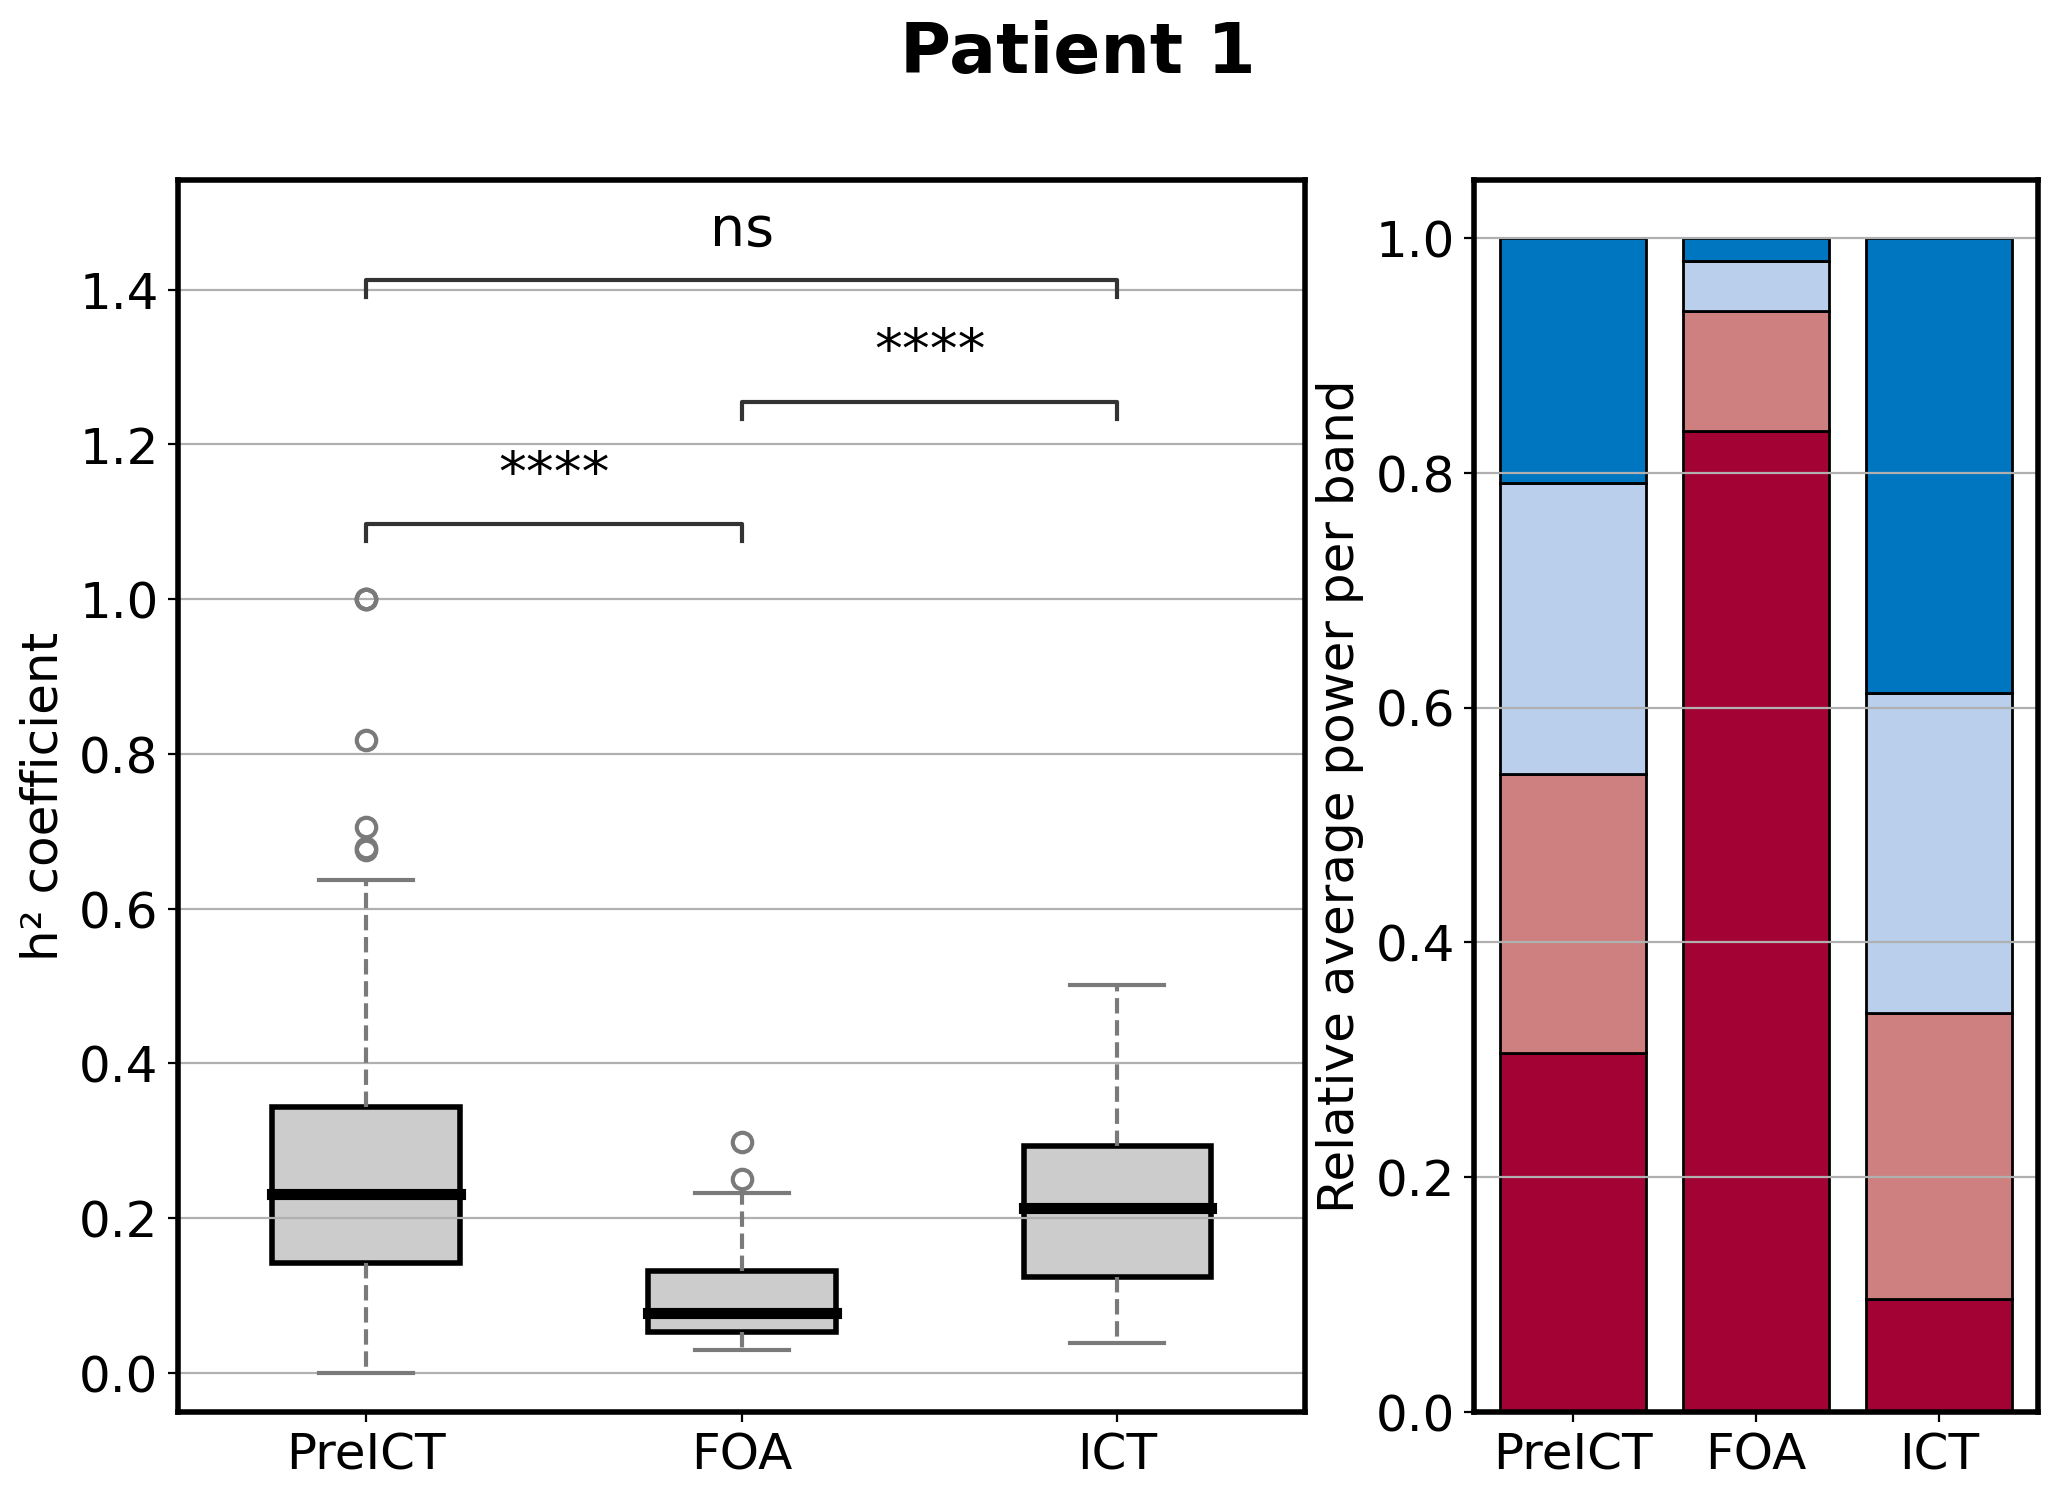

p-value annotation legend:
      ns: 1.00e-02 < p <= 1.00e+00
       *: 1.00e-03 < p <= 1.00e-02
      **: 1.00e-04 < p <= 1.00e-03
     ***: 1.00e-05 < p <= 1.00e-04
    ****: p <= 1.00e-05

PreICT vs. FOA: Custom statistical test, P_val:5.498e-29
FOA vs. ICT: Custom statistical test, P_val:3.420e-06
PreICT vs. ICT: Custom statistical test, P_val:1.821e-06
THIS IS PATIENT patients\sub-163c3f566e5a_ses-postimp_task-seizure_acq-type1_run-06_ieeg.dat !!!! 




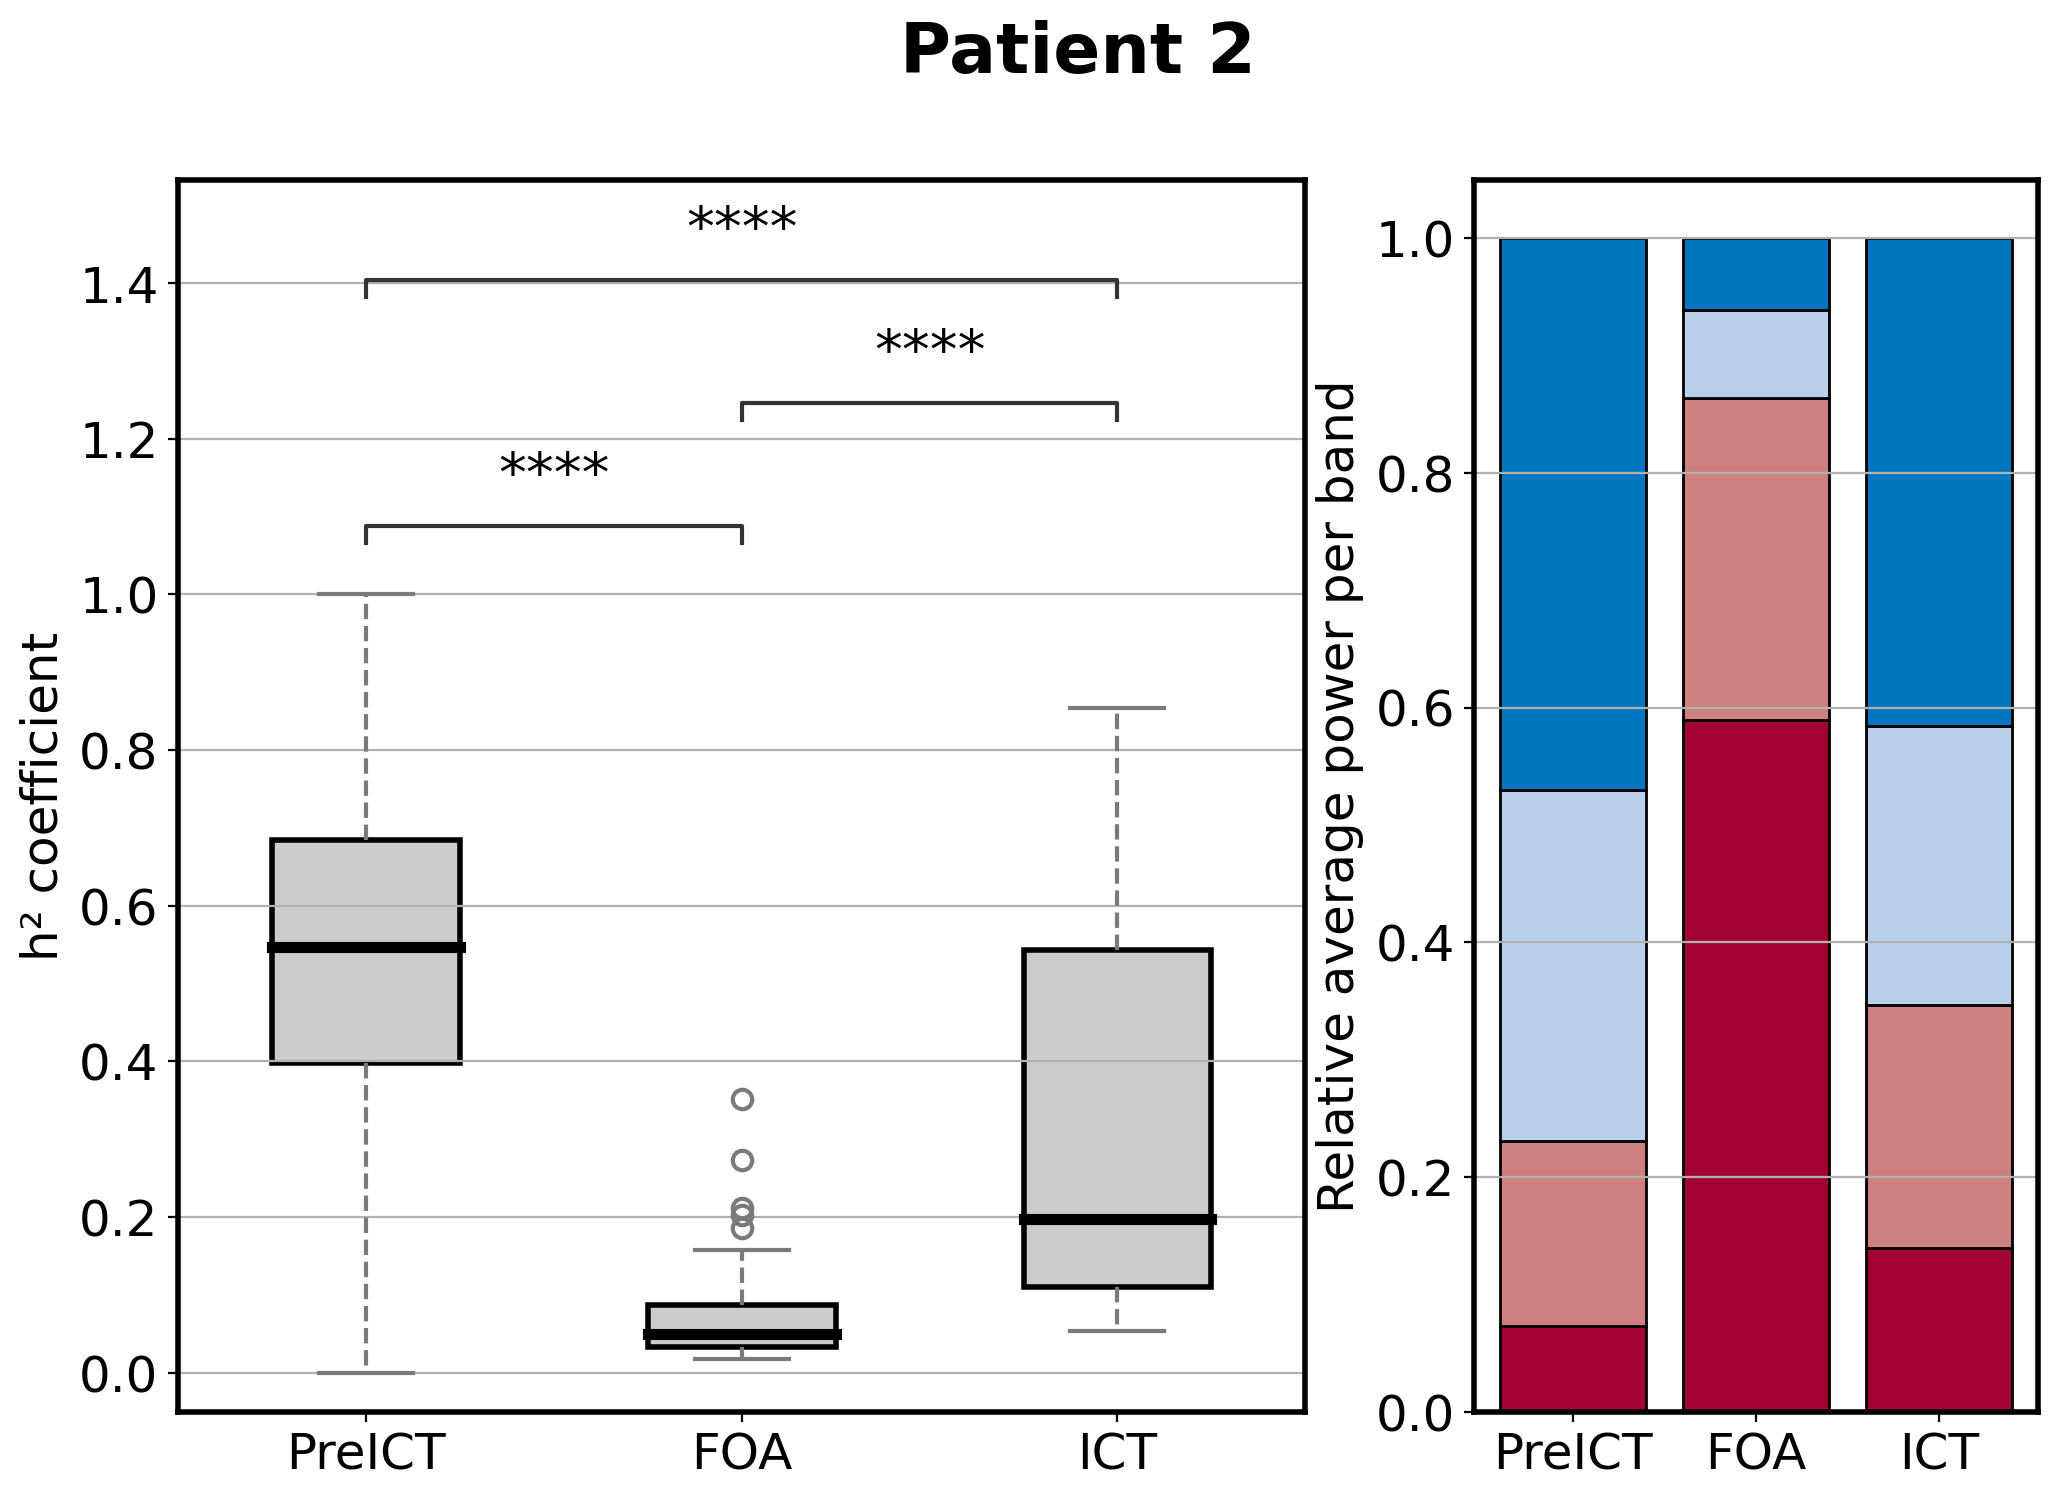

p-value annotation legend:
      ns: 1.00e-02 < p <= 1.00e+00
       *: 1.00e-03 < p <= 1.00e-02
      **: 1.00e-04 < p <= 1.00e-03
     ***: 1.00e-05 < p <= 1.00e-04
    ****: p <= 1.00e-05

PreICT vs. FOA: Custom statistical test, P_val:4.183e-35
FOA vs. ICT: Custom statistical test, P_val:3.250e-07
PreICT vs. ICT: Custom statistical test, P_val:3.851e-51
THIS IS PATIENT patients\sub-20f37cdcd226_ses-postimp_task-seizure_acq-type1_run-02_ieeg.dat !!!! 




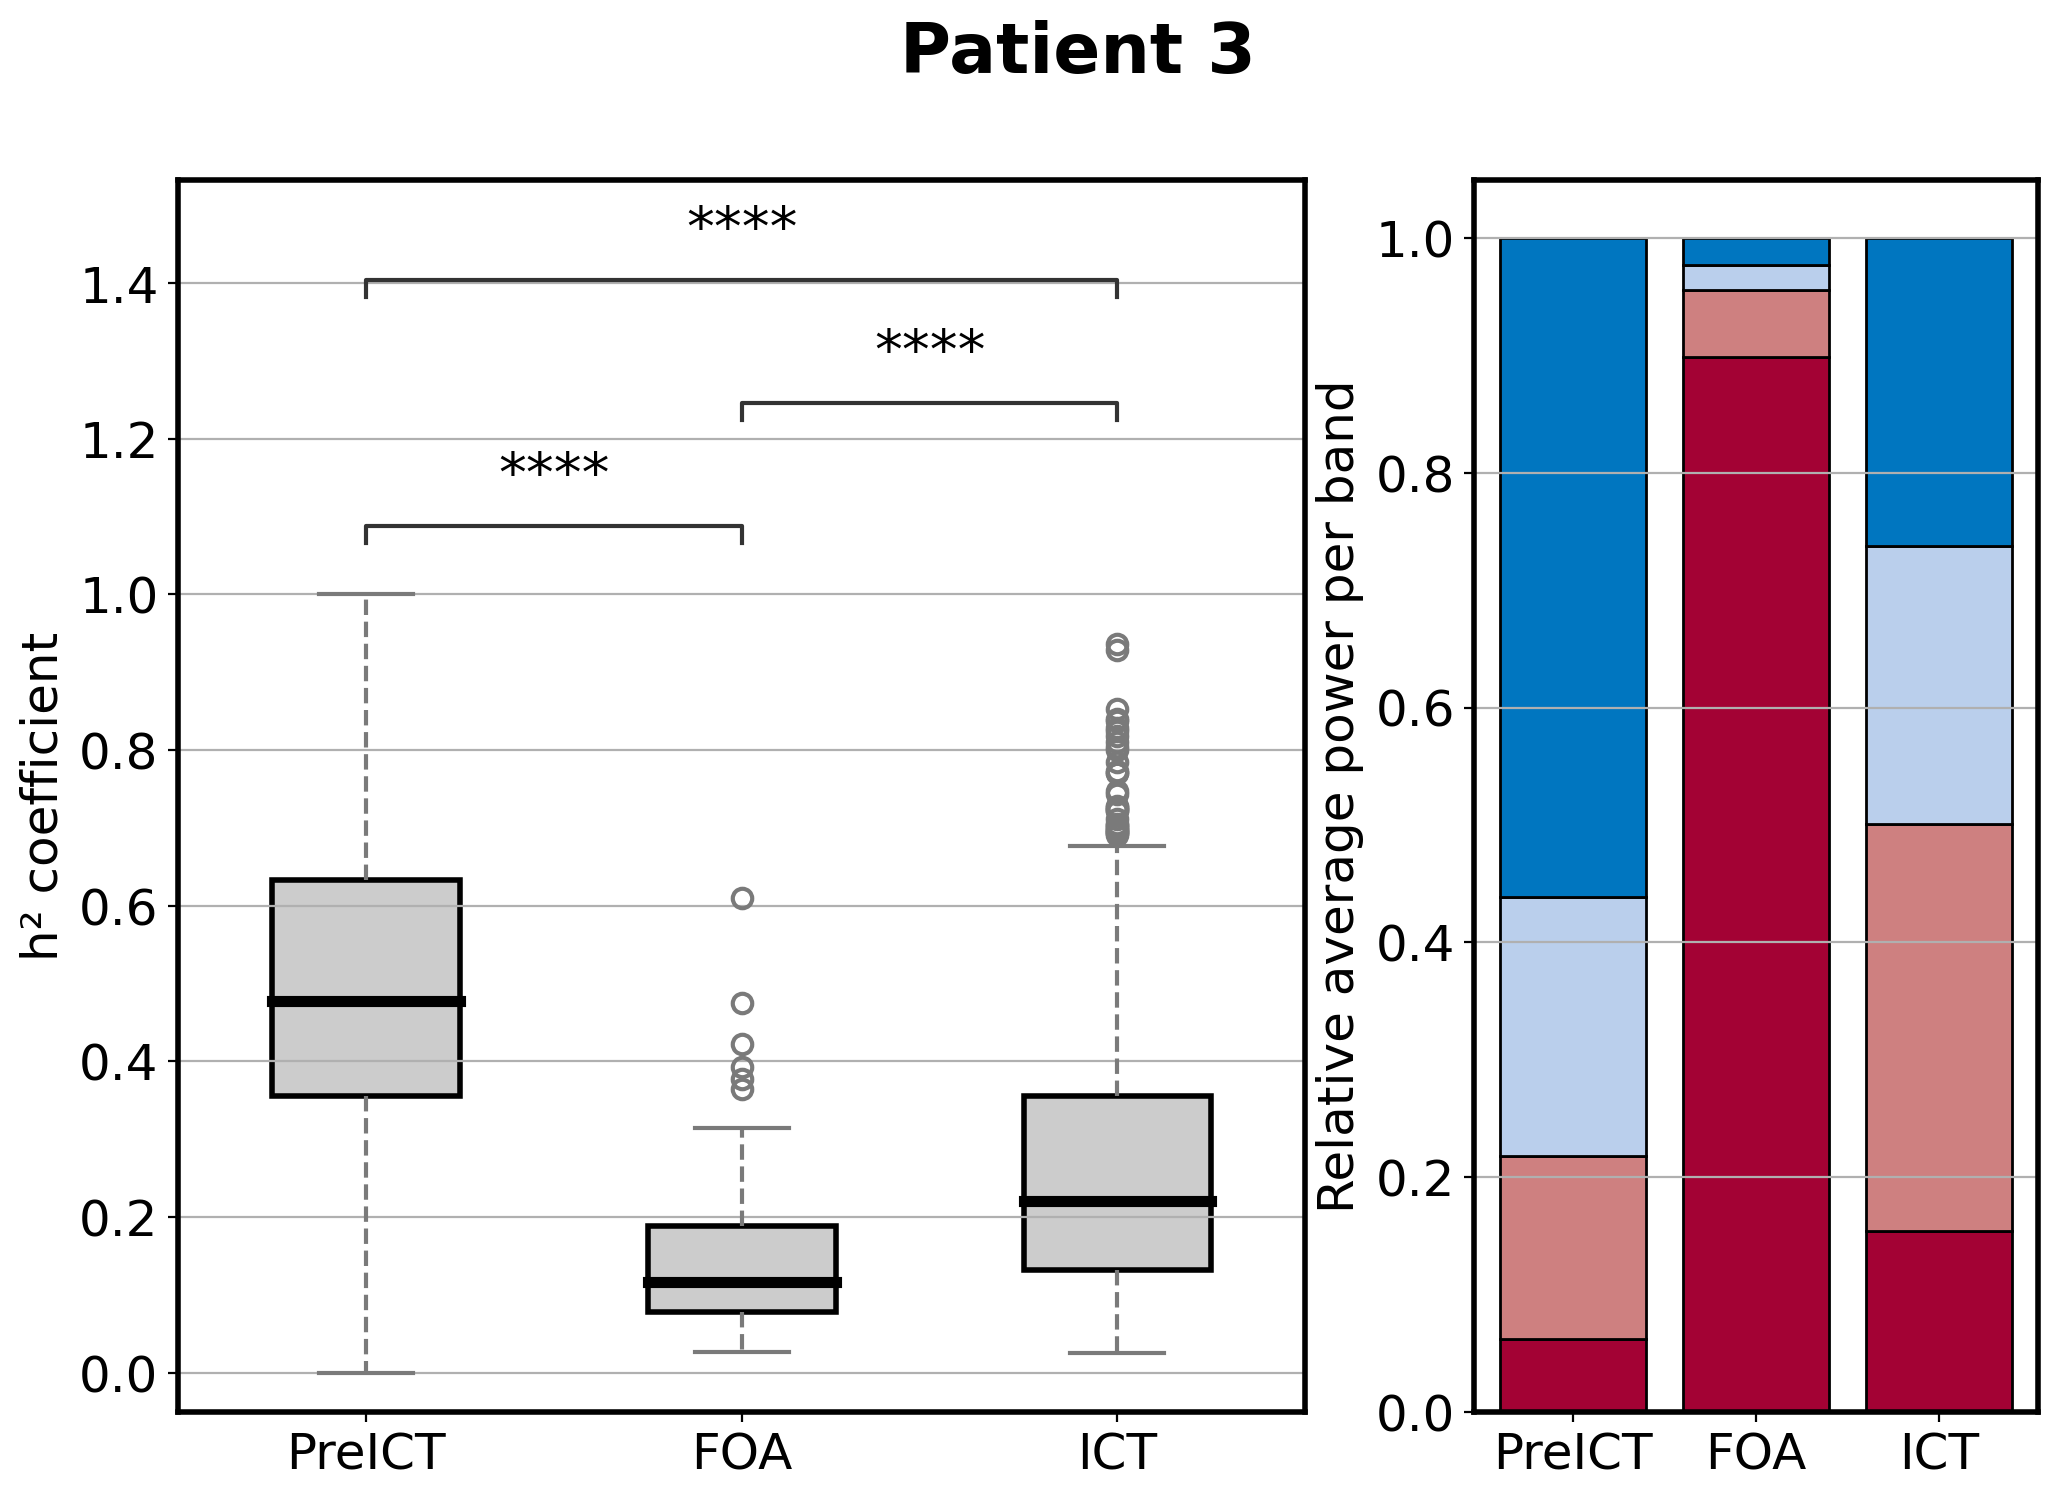

p-value annotation legend:
      ns: 1.00e-02 < p <= 1.00e+00
       *: 1.00e-03 < p <= 1.00e-02
      **: 1.00e-04 < p <= 1.00e-03
     ***: 1.00e-05 < p <= 1.00e-04
    ****: p <= 1.00e-05

PreICT vs. FOA: Custom statistical test, P_val:2.805e-05
FOA vs. ICT: Custom statistical test, P_val:1.185e-09
PreICT vs. ICT: Custom statistical test, P_val:1.302e-02
THIS IS PATIENT patients\sub-2a25ded630e8_ses-postimp_task-seizure_acq-type4_run-01_ieeg.dat !!!! 




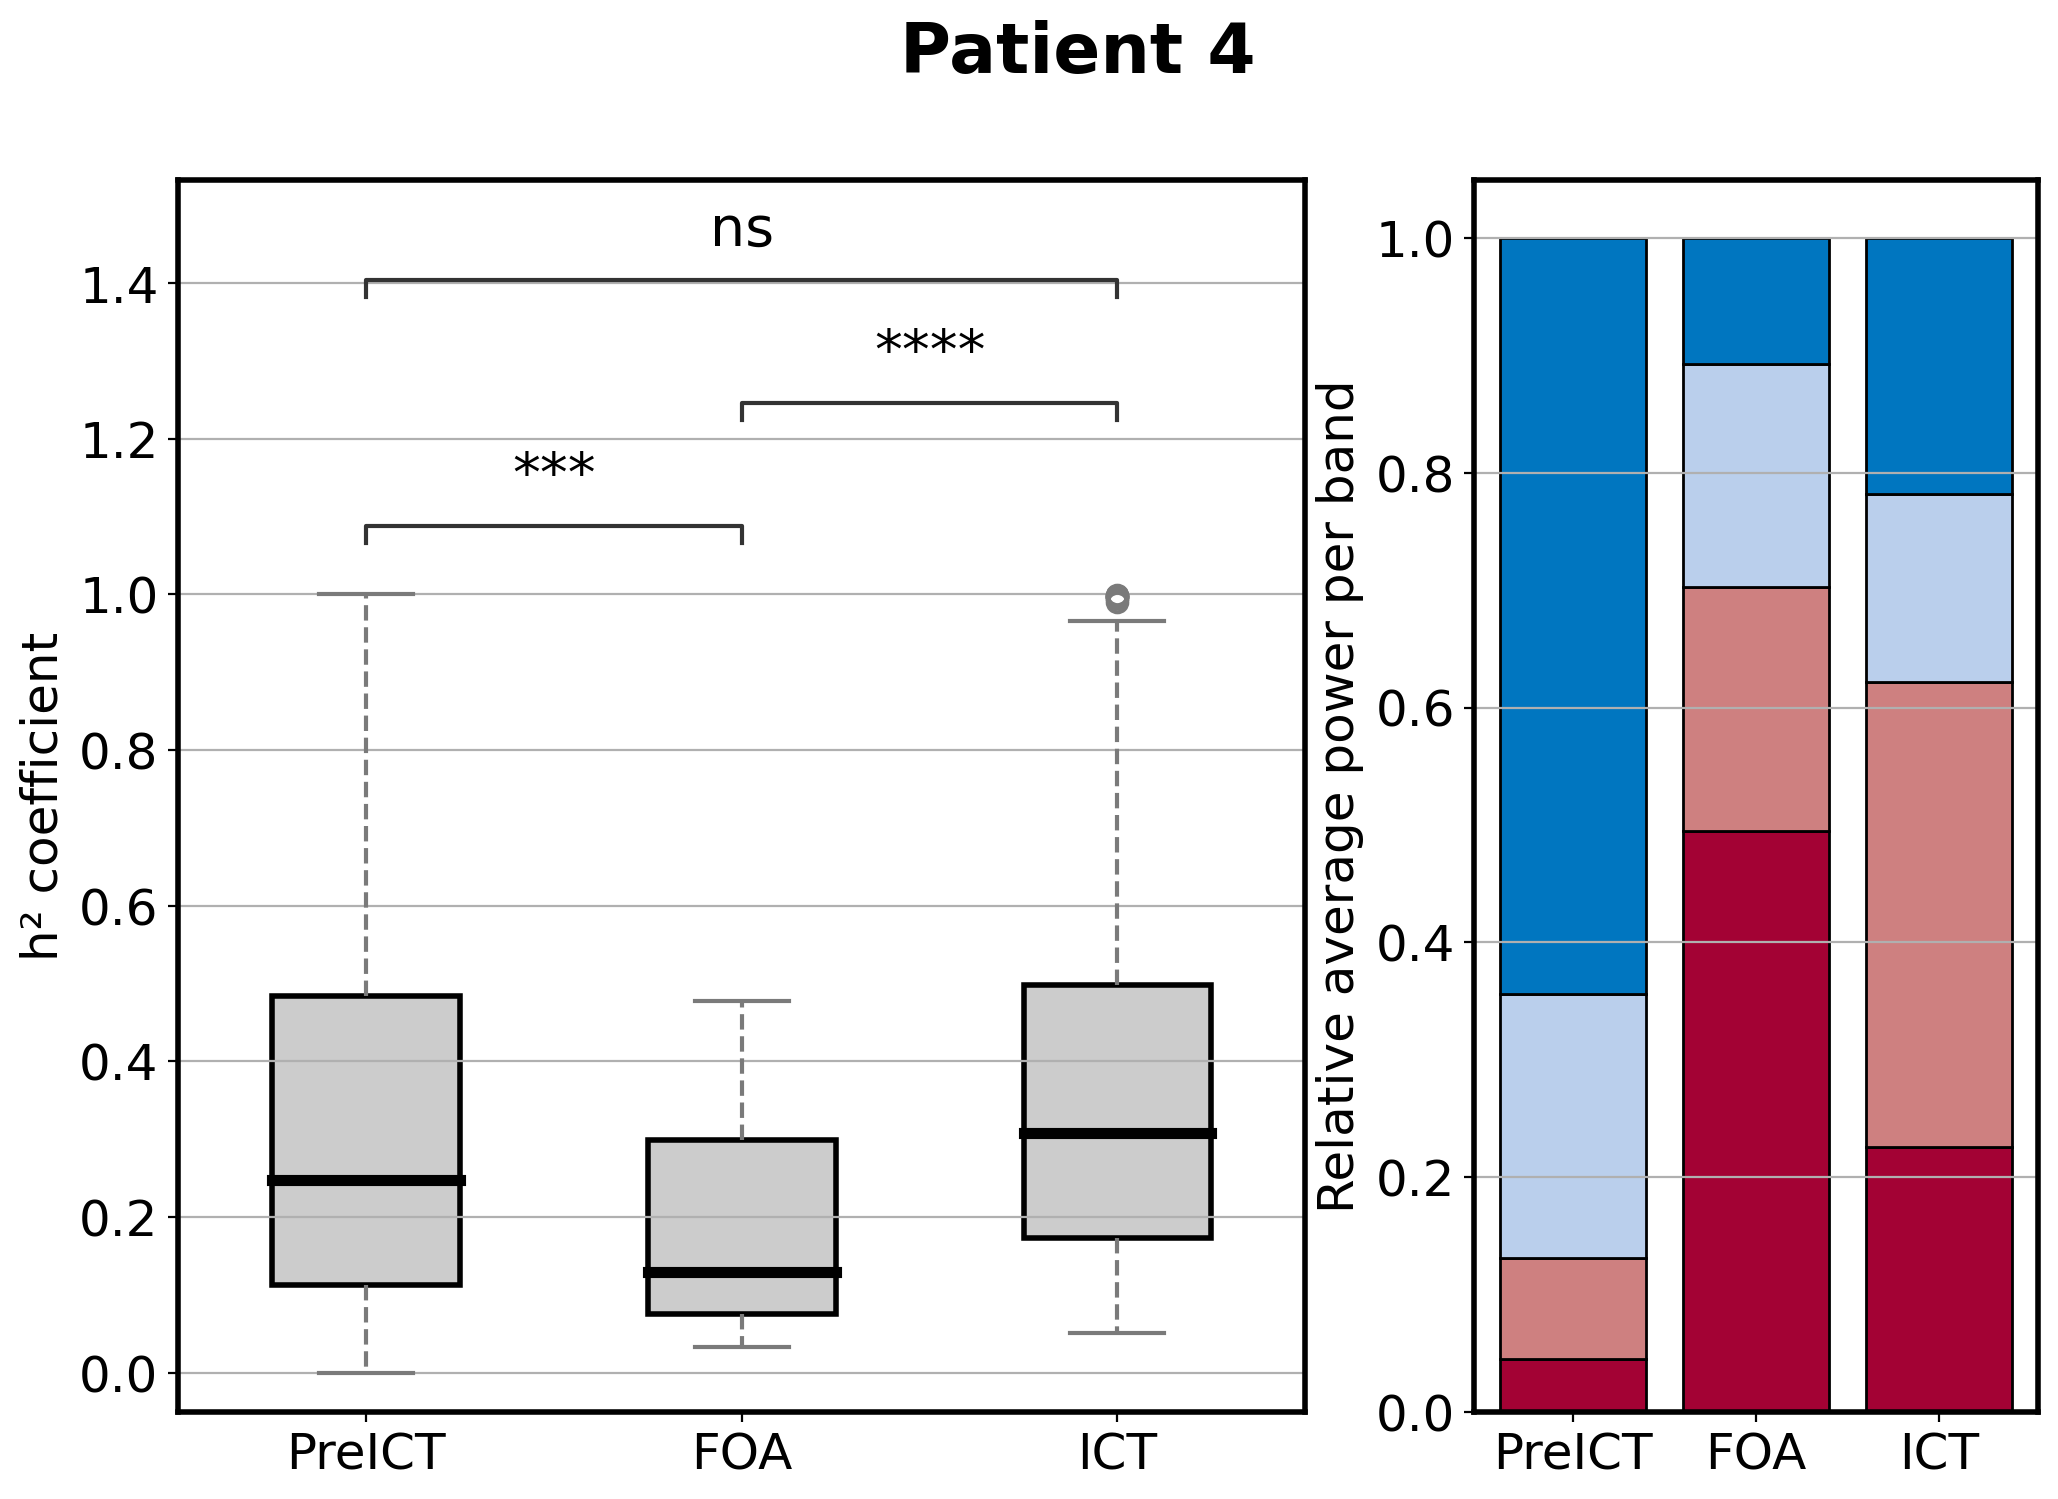

p-value annotation legend:
      ns: 1.00e-02 < p <= 1.00e+00
       *: 1.00e-03 < p <= 1.00e-02
      **: 1.00e-04 < p <= 1.00e-03
     ***: 1.00e-05 < p <= 1.00e-04
    ****: p <= 1.00e-05

PreICT vs. FOA: Custom statistical test, P_val:1.291e-24
FOA vs. ICT: Custom statistical test, P_val:1.199e-21
PreICT vs. ICT: Custom statistical test, P_val:1.386e-03
THIS IS PATIENT patients\sub-31e23b953a45_ses-postimp_task-seizure_acq-type1_run-03_ieeg.dat !!!! 




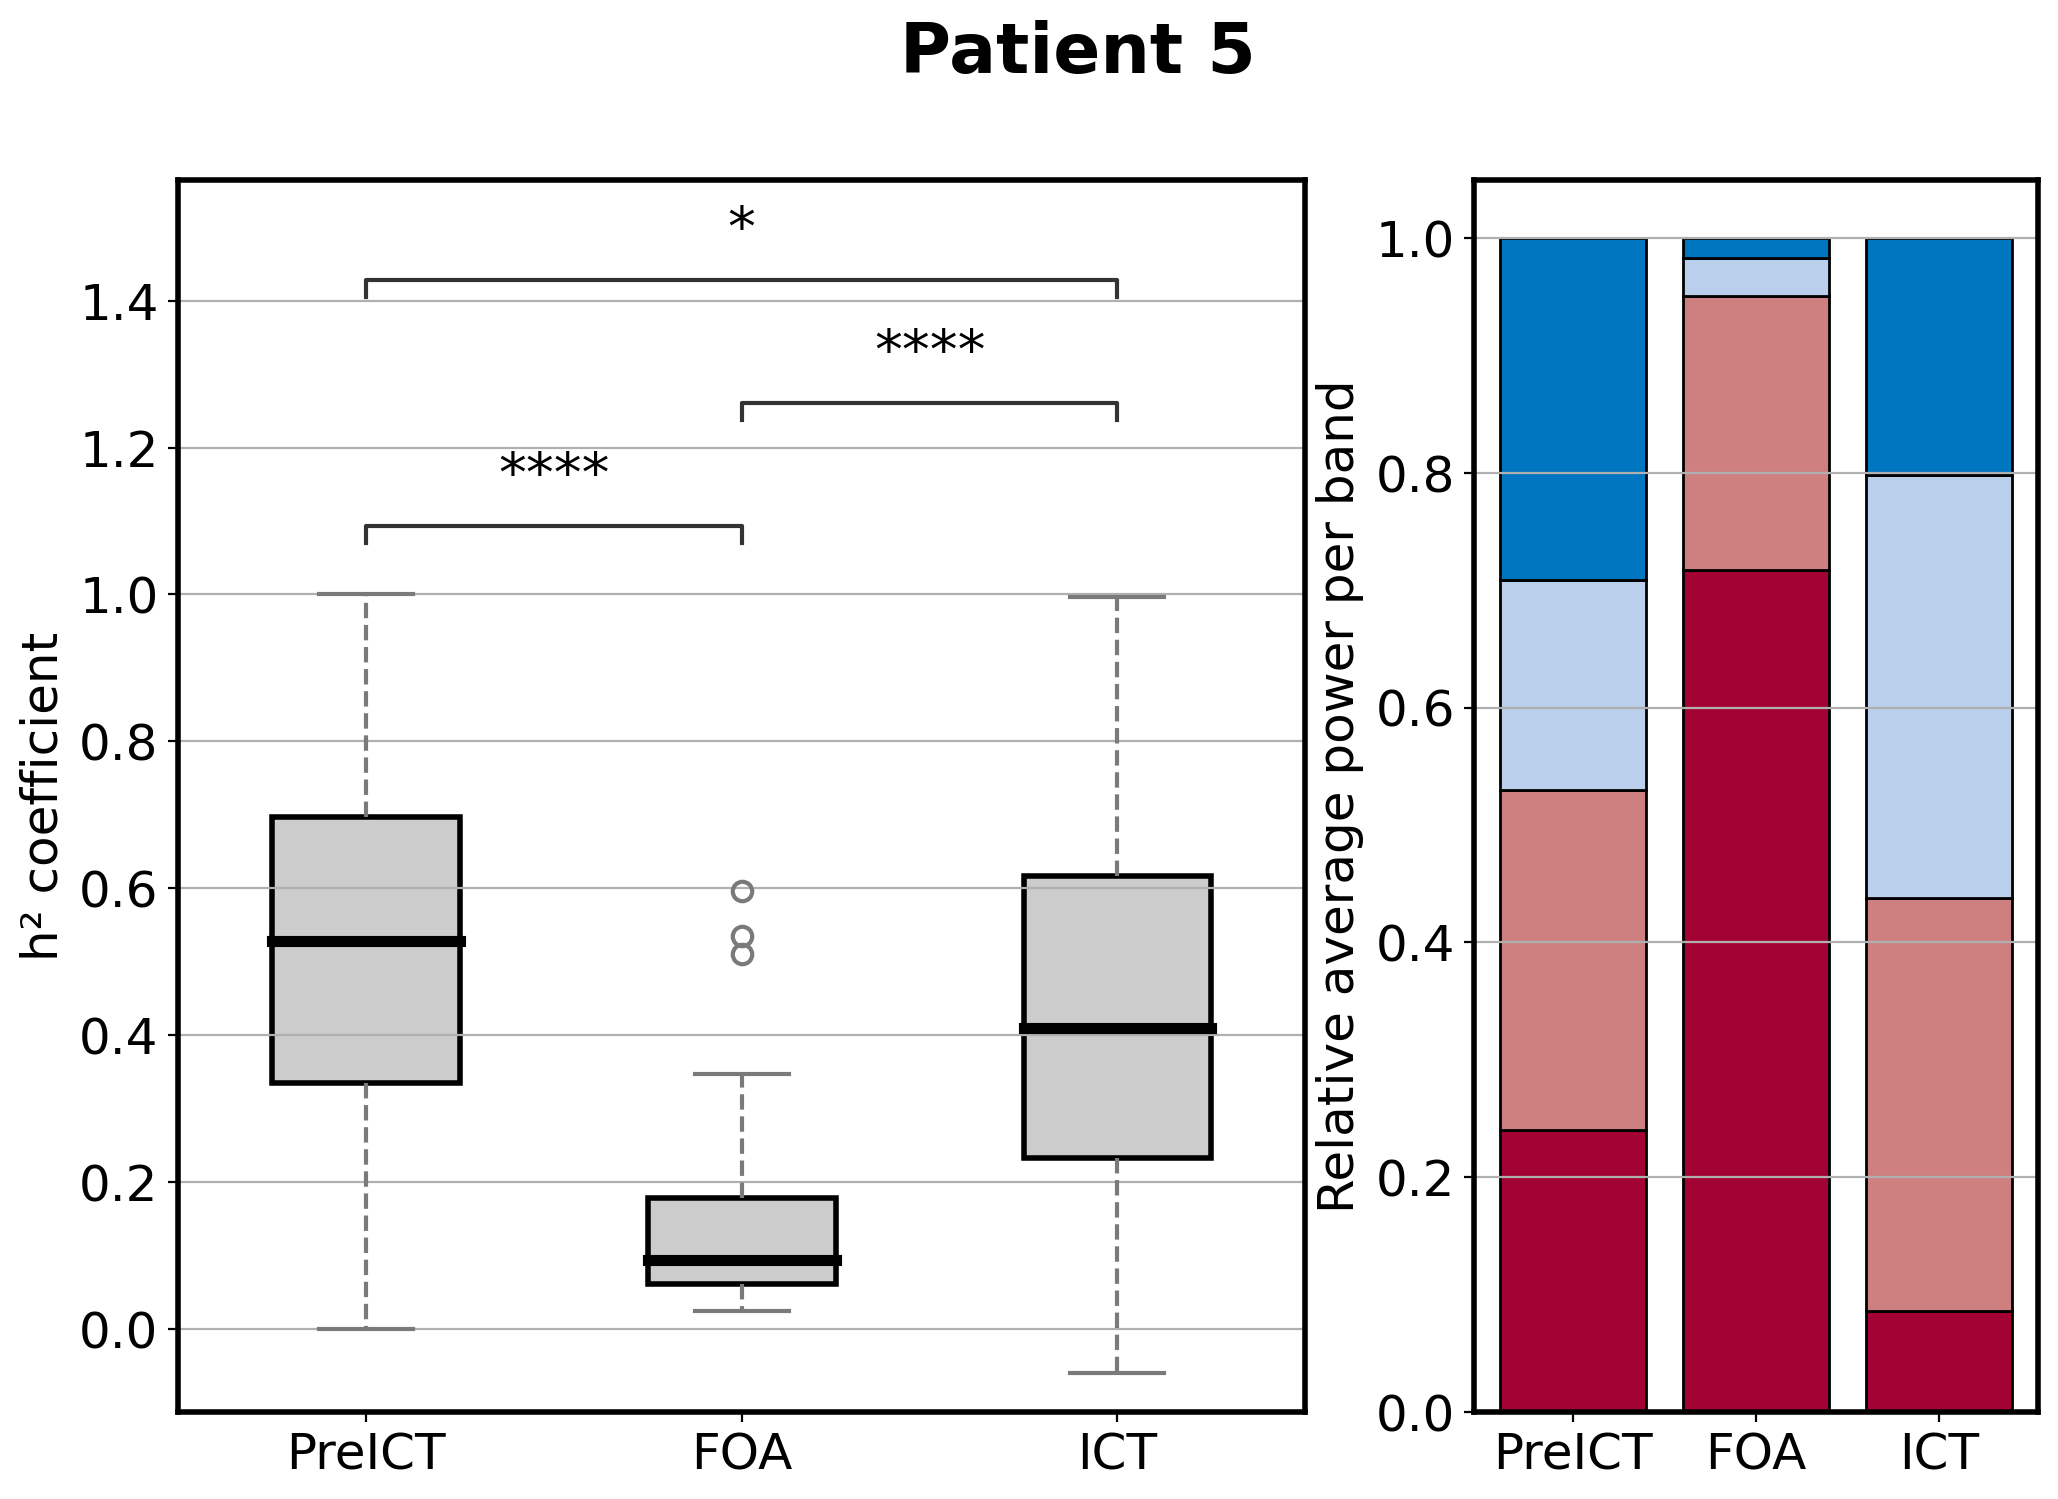

p-value annotation legend:
      ns: 1.00e-02 < p <= 1.00e+00
       *: 1.00e-03 < p <= 1.00e-02
      **: 1.00e-04 < p <= 1.00e-03
     ***: 1.00e-05 < p <= 1.00e-04
    ****: p <= 1.00e-05

PreICT vs. FOA: Custom statistical test, P_val:1.883e-04
FOA vs. ICT: Custom statistical test, P_val:9.460e-04
PreICT vs. ICT: Custom statistical test, P_val:1.000e+00
THIS IS PATIENT patients\sub-32f705989173_ses-postimp_task-seizure_acq-type1_run-02_ieeg.dat !!!! 




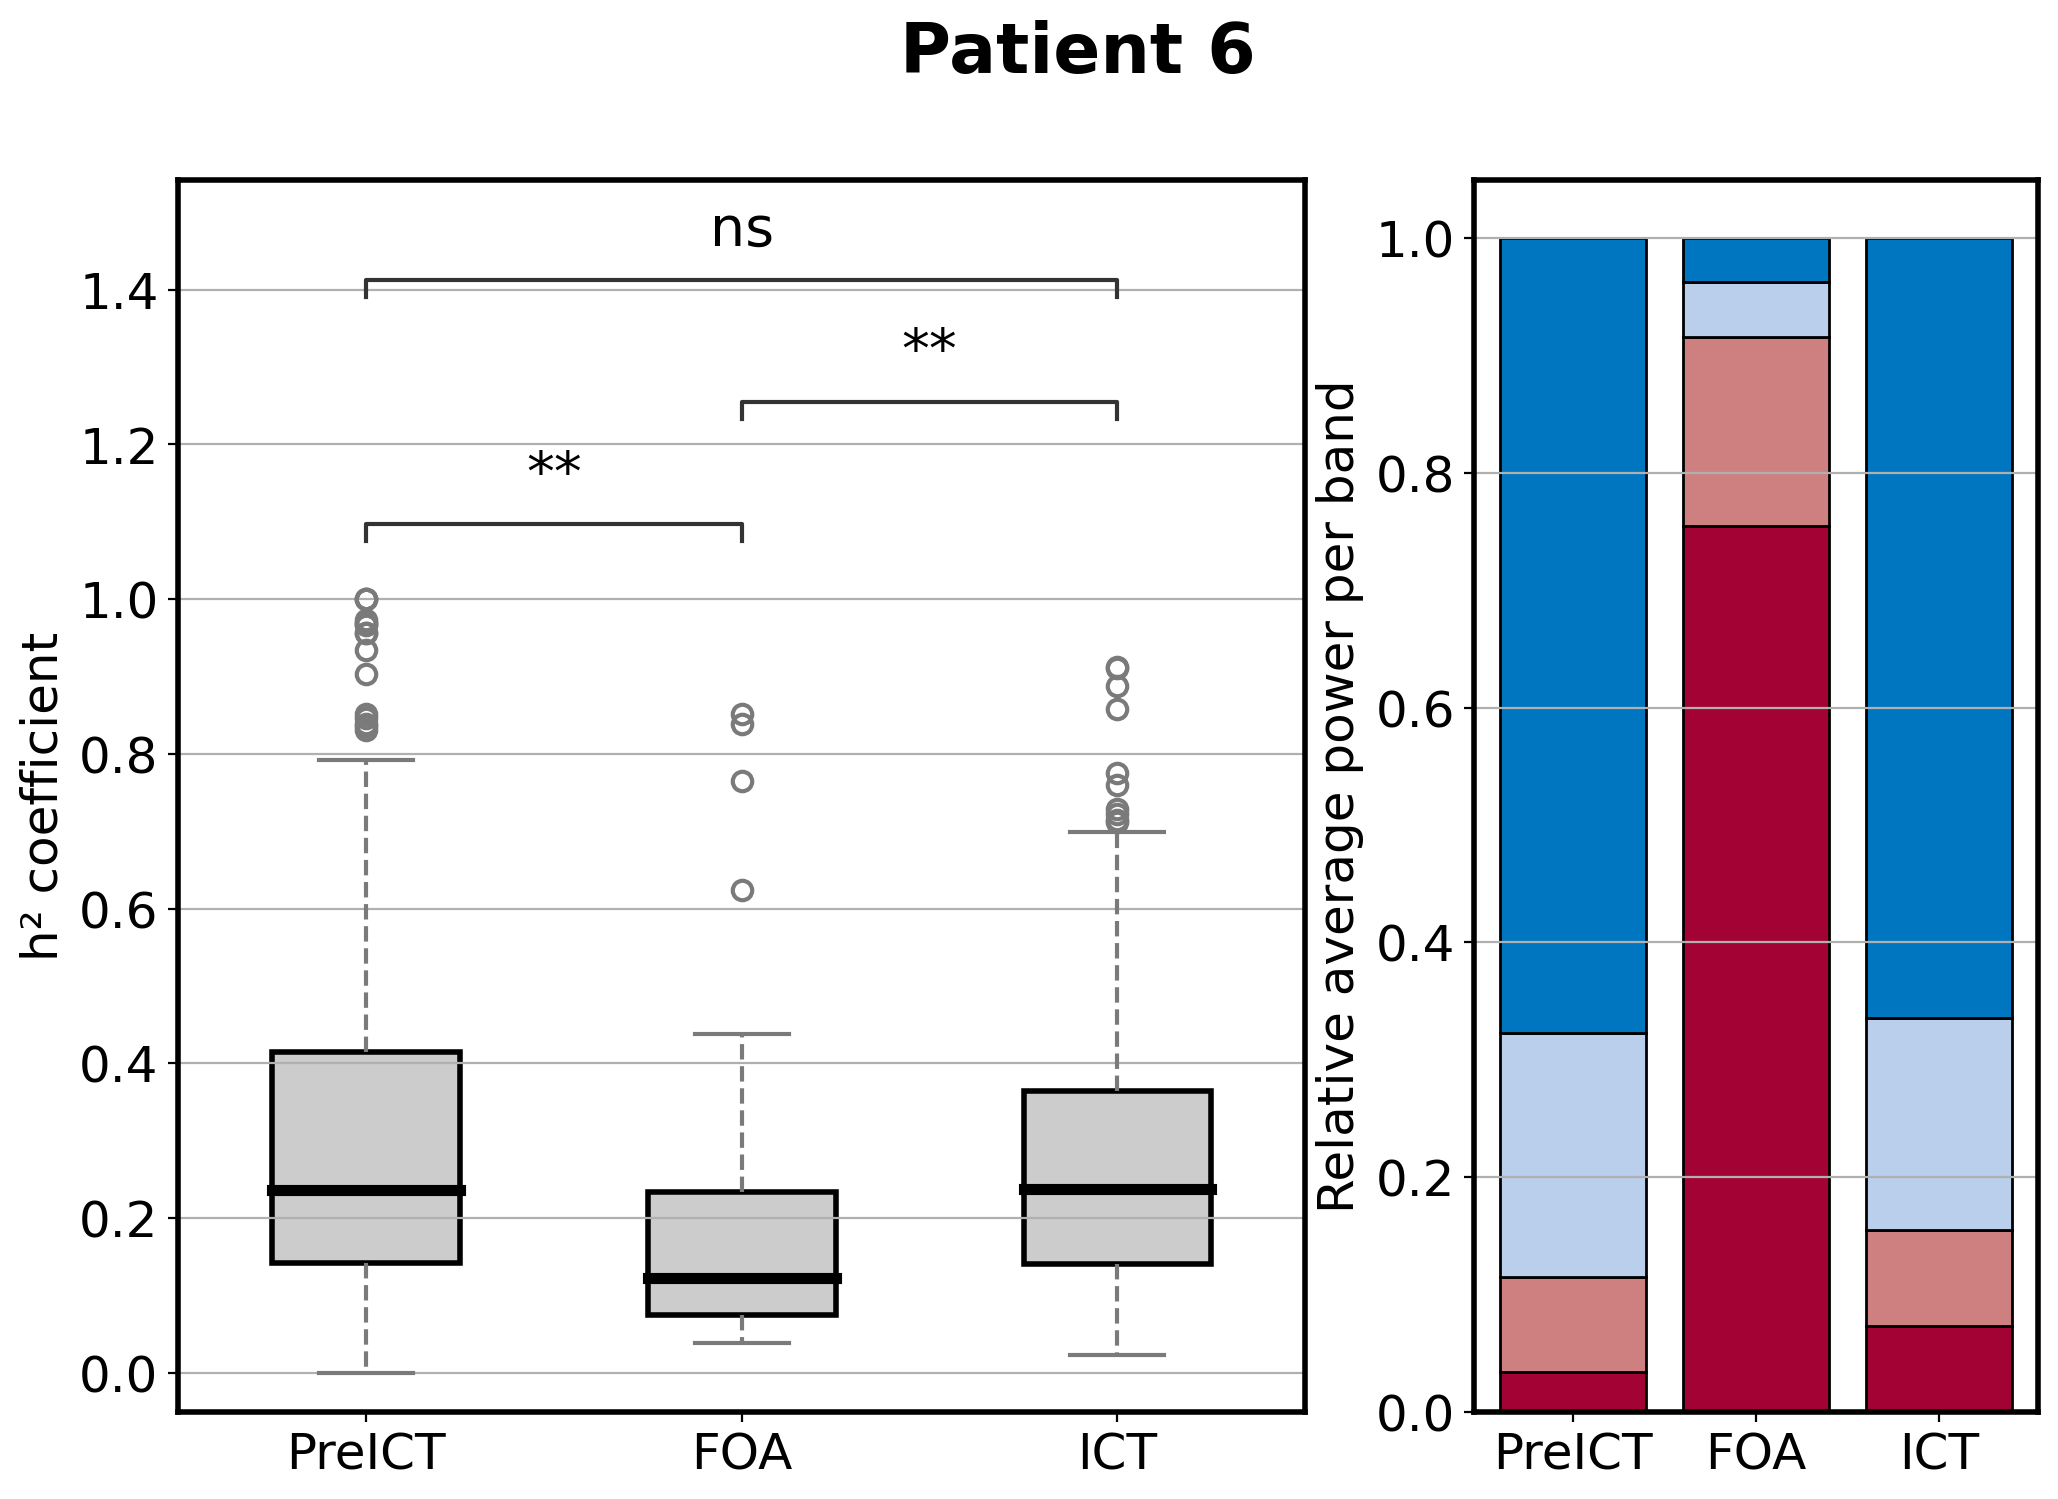

p-value annotation legend:
      ns: 1.00e-02 < p <= 1.00e+00
       *: 1.00e-03 < p <= 1.00e-02
      **: 1.00e-04 < p <= 1.00e-03
     ***: 1.00e-05 < p <= 1.00e-04
    ****: p <= 1.00e-05

PreICT vs. FOA: Custom statistical test, P_val:1.000e+00
FOA vs. ICT: Custom statistical test, P_val:1.720e-09
PreICT vs. ICT: Custom statistical test, P_val:1.882e-21
THIS IS PATIENT patients\sub-40af8b8dfb97_ses-postimp_task-seizure_acq-type1_run-03_ieeg.dat !!!! 




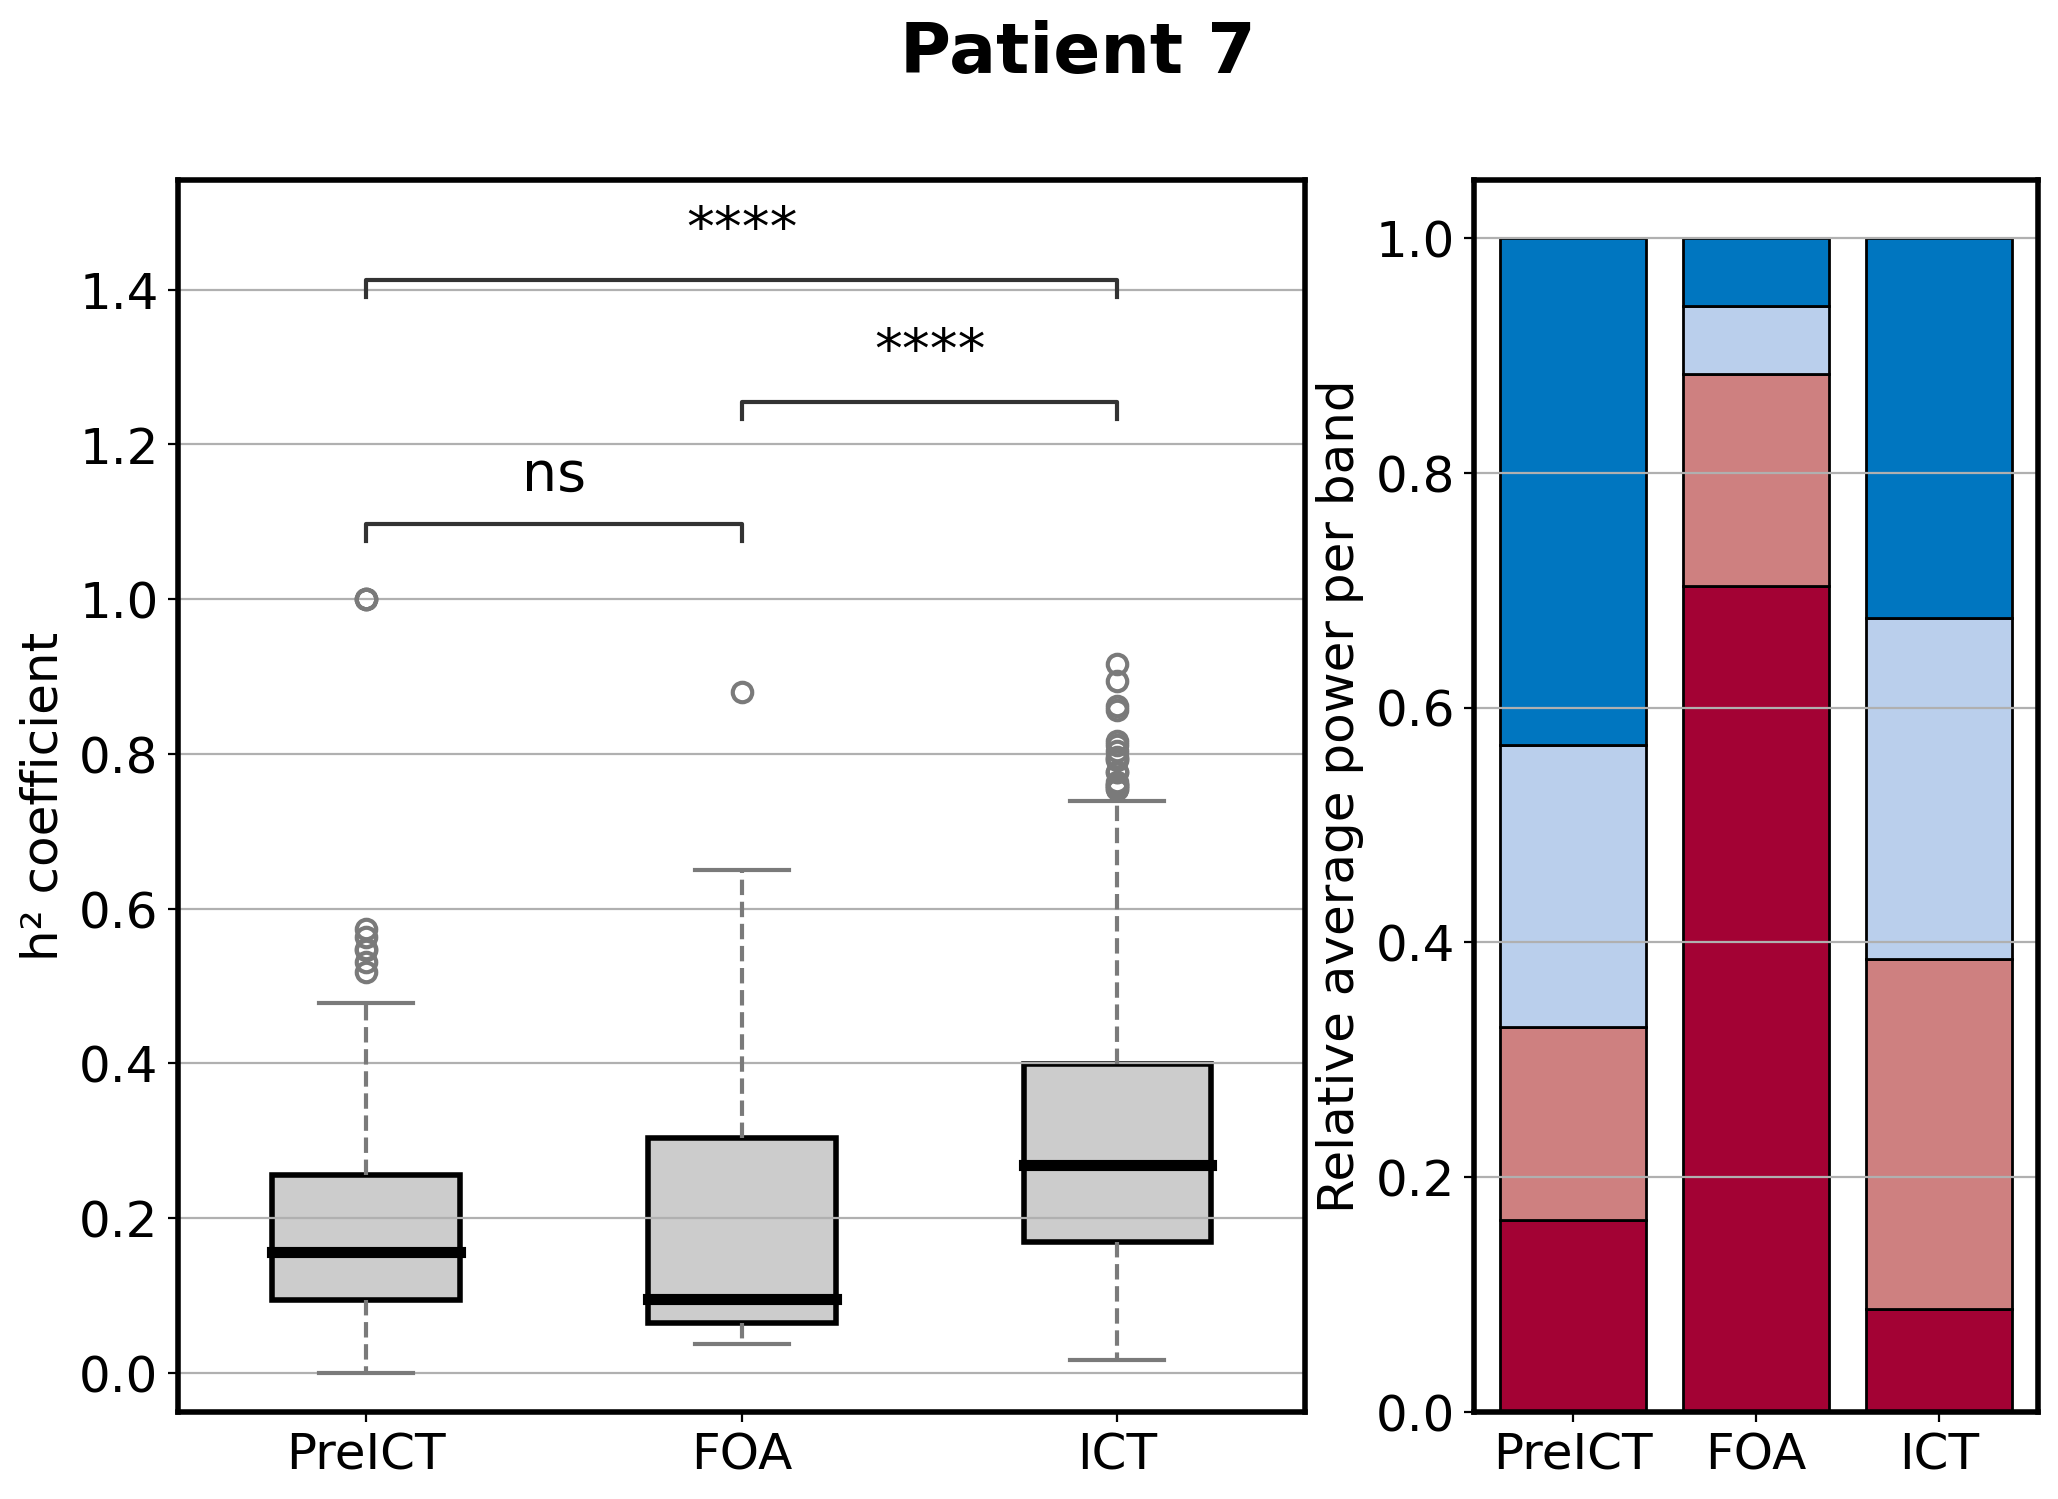

p-value annotation legend:
      ns: 1.00e-02 < p <= 1.00e+00
       *: 1.00e-03 < p <= 1.00e-02
      **: 1.00e-04 < p <= 1.00e-03
     ***: 1.00e-05 < p <= 1.00e-04
    ****: p <= 1.00e-05

PreICT vs. FOA: Custom statistical test, P_val:1.679e-16
FOA vs. ICT: Custom statistical test, P_val:2.837e-13
PreICT vs. ICT: Custom statistical test, P_val:1.321e-02
THIS IS PATIENT patients\sub-5abf35d48d54_ses-postimp_task-seizure_acq-type1_run-02_ieeg.dat !!!! 




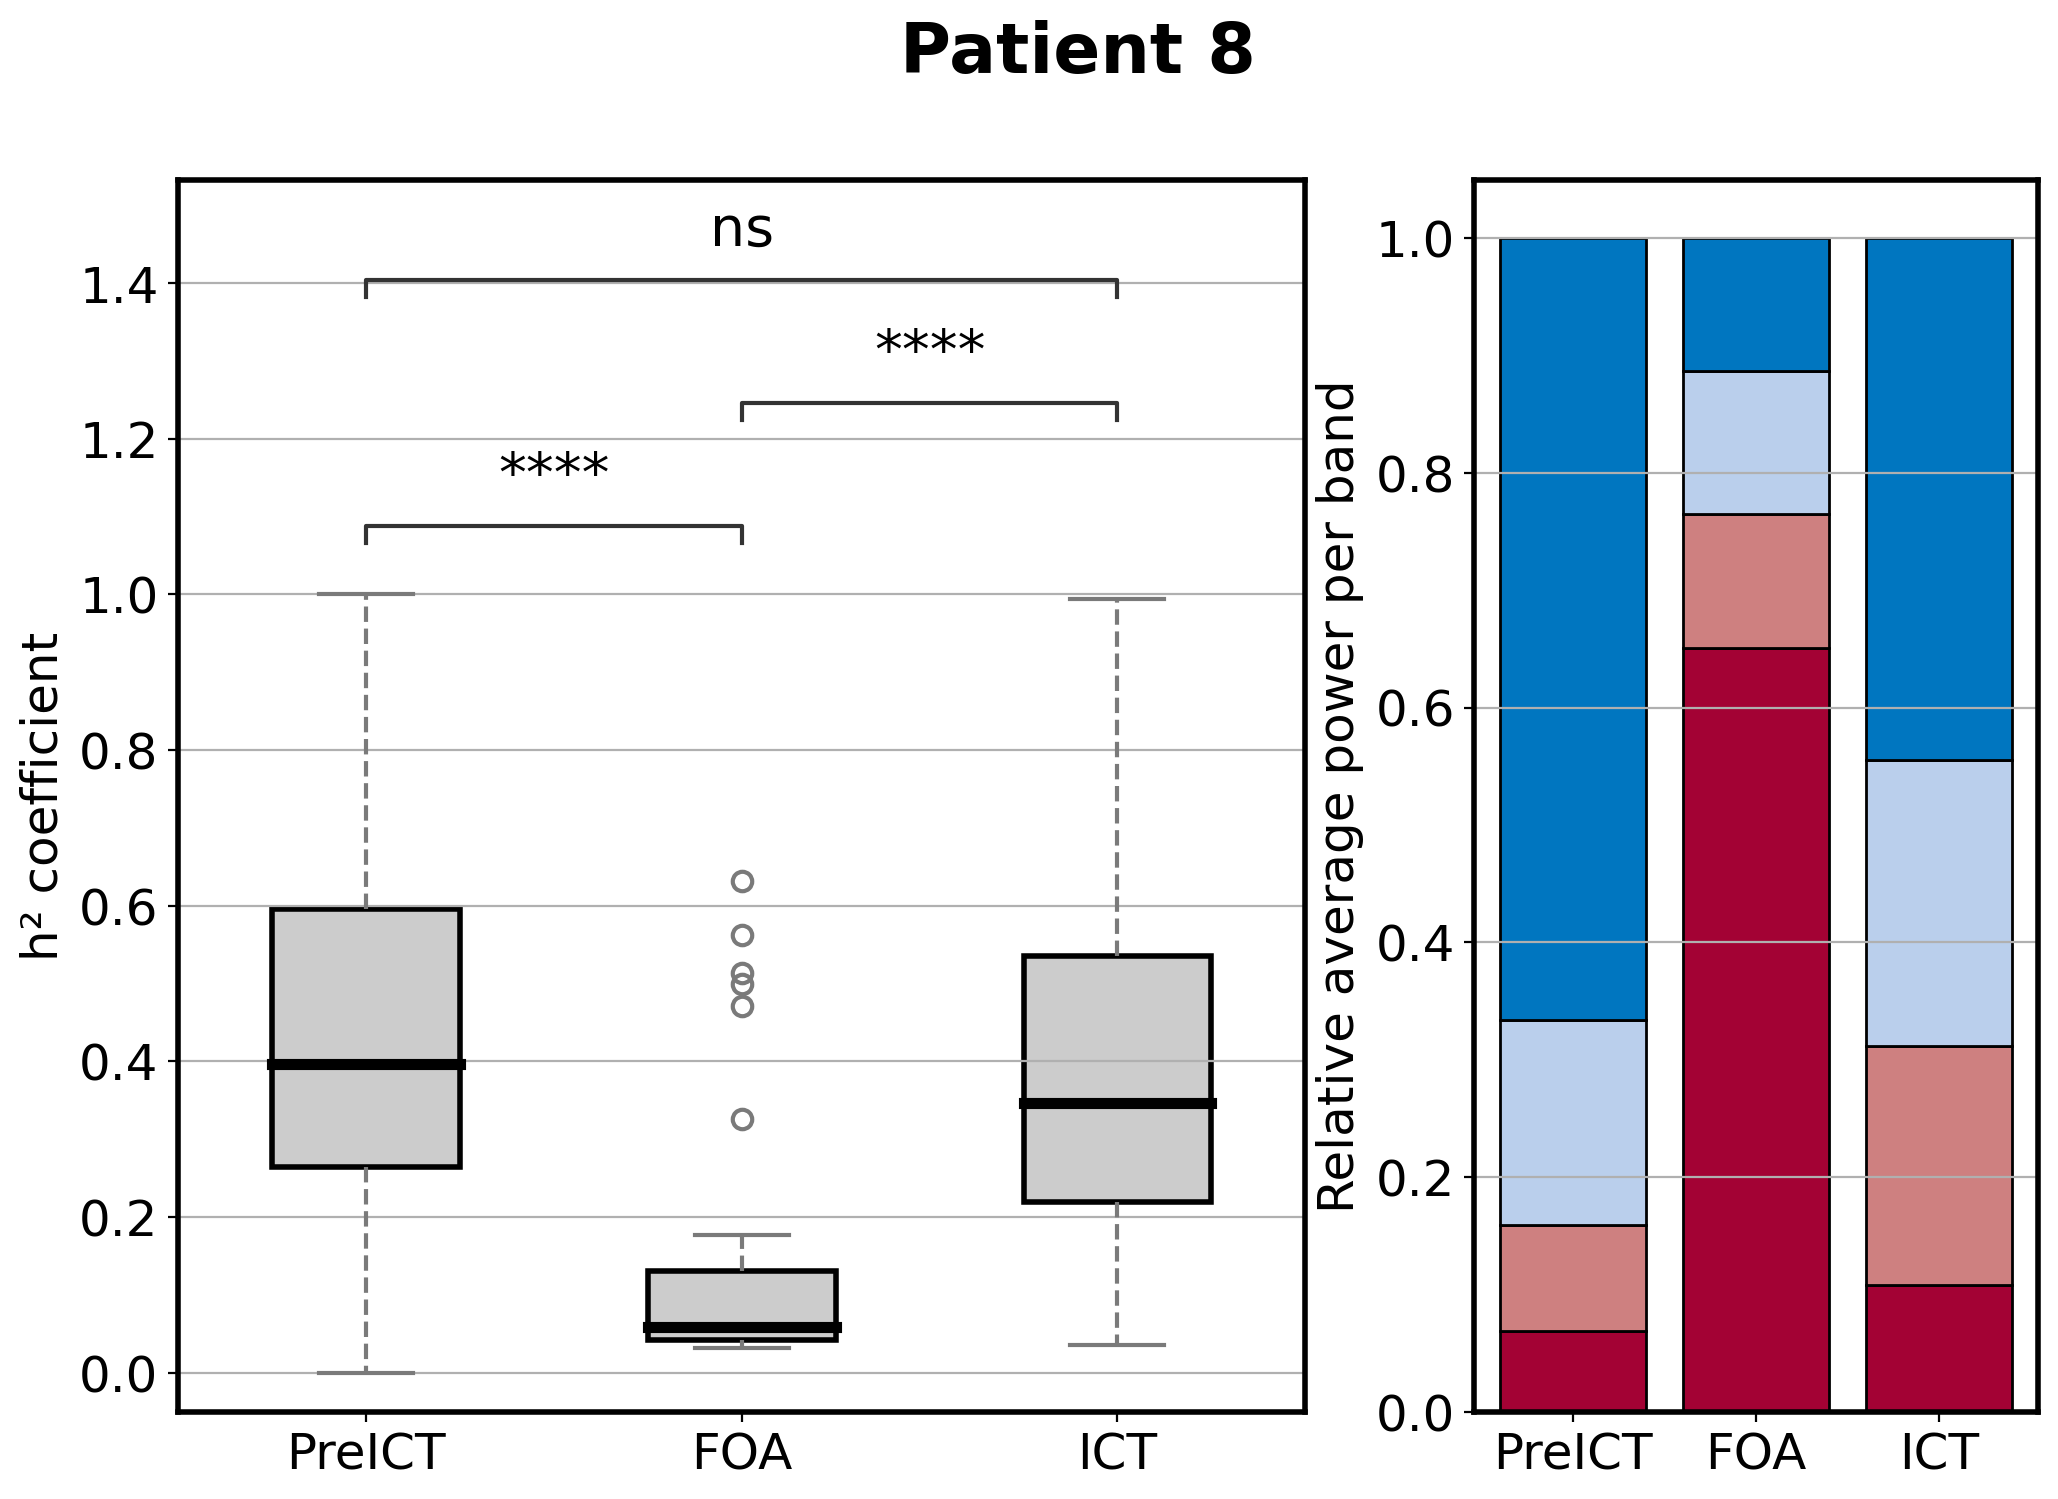

p-value annotation legend:
      ns: 1.00e-02 < p <= 1.00e+00
       *: 1.00e-03 < p <= 1.00e-02
      **: 1.00e-04 < p <= 1.00e-03
     ***: 1.00e-05 < p <= 1.00e-04
    ****: p <= 1.00e-05

PreICT vs. FOA: Custom statistical test, P_val:2.840e-09
FOA vs. ICT: Custom statistical test, P_val:2.296e-18
PreICT vs. ICT: Custom statistical test, P_val:4.282e-04
THIS IS PATIENT patients\sub-69bd8dd3516c_ses-postimp_task-seizure_acq-type1-run01_ieeg.dat !!!! 




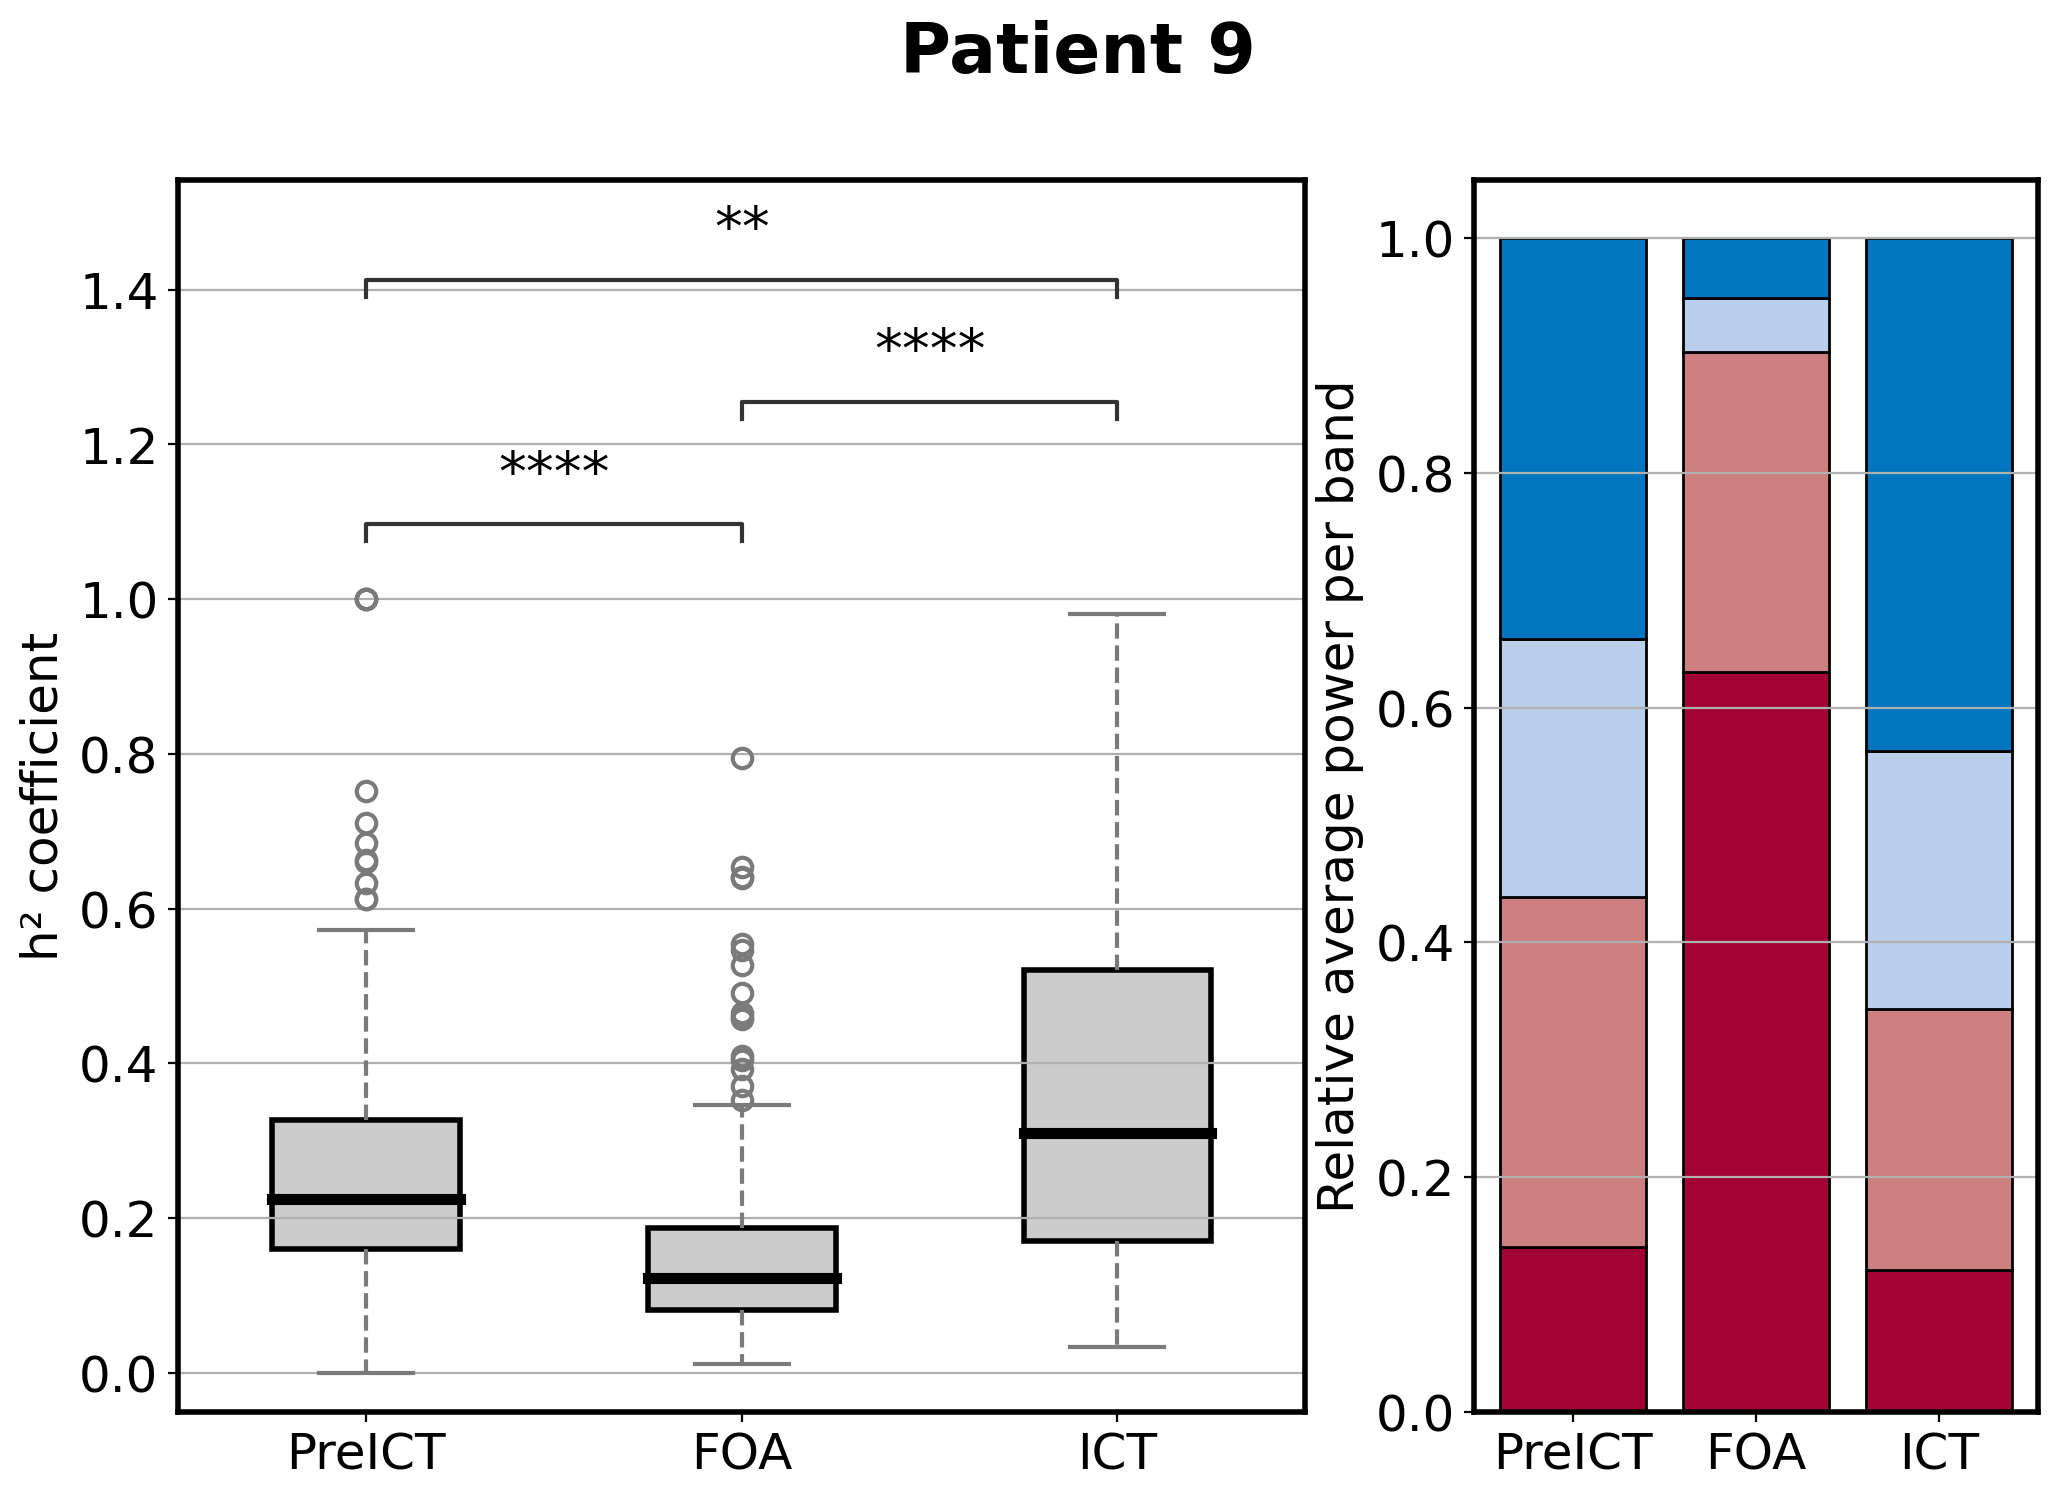

p-value annotation legend:
      ns: 1.00e-02 < p <= 1.00e+00
       *: 1.00e-03 < p <= 1.00e-02
      **: 1.00e-04 < p <= 1.00e-03
     ***: 1.00e-05 < p <= 1.00e-04
    ****: p <= 1.00e-05

PreICT vs. FOA: Custom statistical test, P_val:3.036e-26
FOA vs. ICT: Custom statistical test, P_val:5.653e-09
PreICT vs. ICT: Custom statistical test, P_val:1.096e-13
THIS IS PATIENT patients\sub-dca23747d079_ses-postimp_task-seizure_acq-type4_run-01_ieeg.dat !!!! 




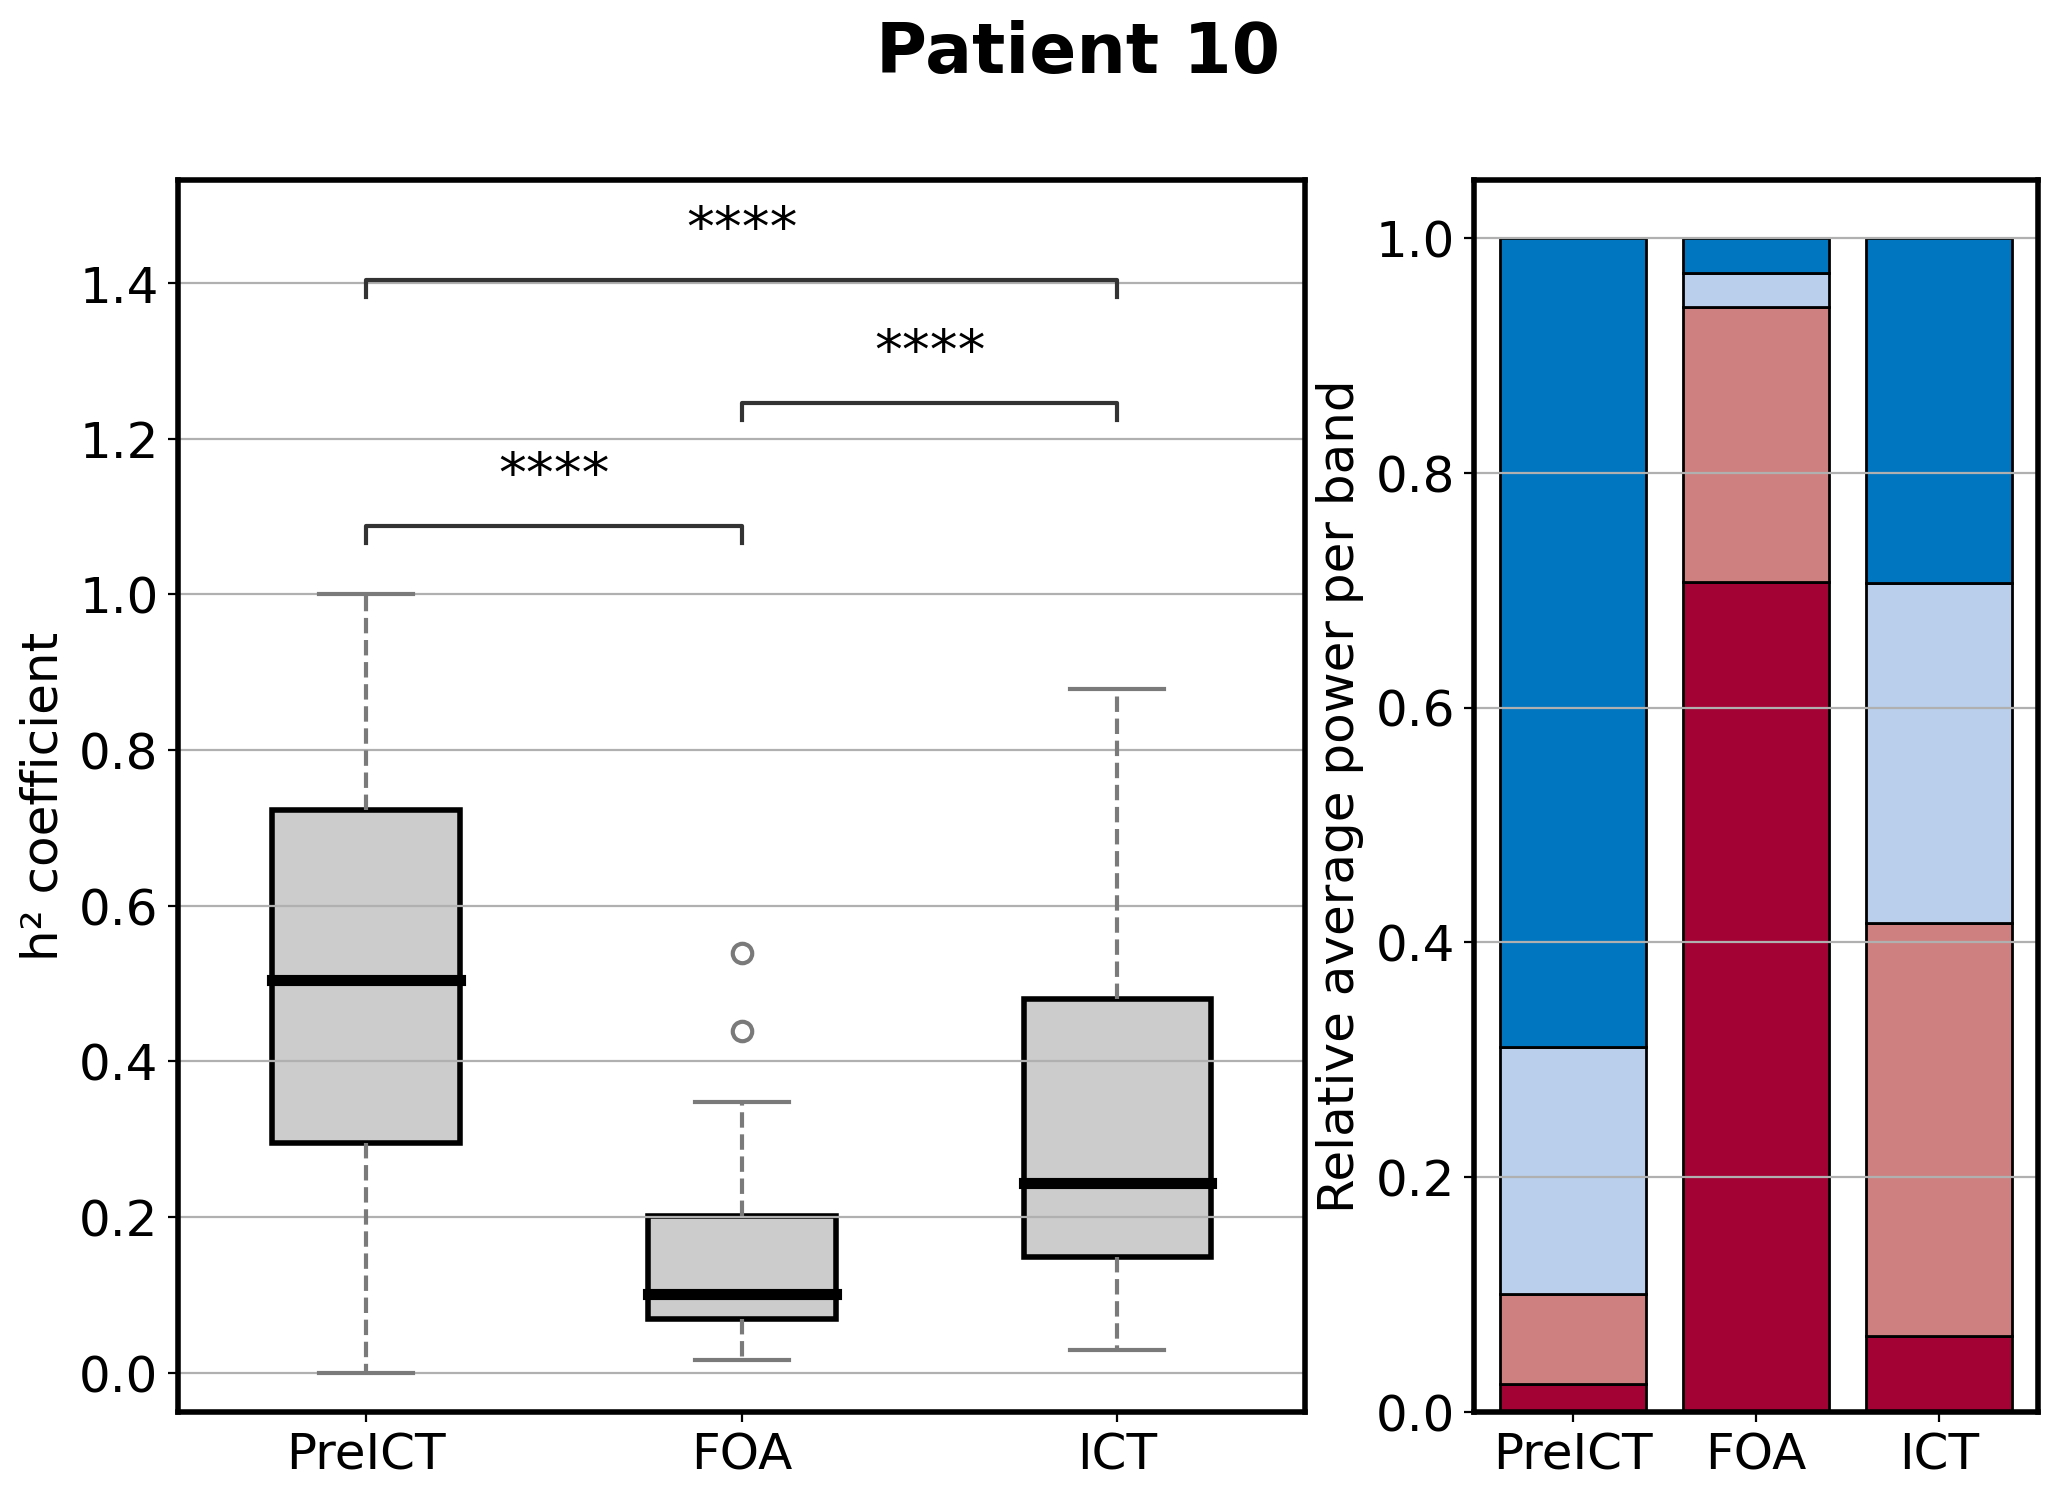

In [36]:
####################h² values calculated with window = 1 sec; step = 0.25 sec#############################################

####################STEP  1 A: ANOVA1 Kruskal-wallis + Ad-hoc Dunn's test ; Bonferroni adjustment; boxplots + significance levels########
####################STEP 1 B: plot relative power density histogram along the boxplots#############################################


#filelist:

file_list = glob.glob(os.path.join(
    'patients/',
    '*.dat'))

#load timestamps:

timestamps = np.loadtxt('patients/timestamps_patient.csv', delimiter = ';', dtype = str)


# Load CSV file for relative power:
df_power = pd.read_csv(
    'patients/psd_subbands_data_out.csv',
    delimiter = ';')



all_pict =[]
all_lvf = []
all_ict = []

all_pict_powers = np.zeros(4) #4 power ranges: theta, alpha, beta, gamma
all_lvf_powers = np.zeros(4)
all_ict_powers = np.zeros(4)

k = 1
for file_name in file_list[:]: #importing data for each patient and processing:
    
    data = np.loadtxt(file_name)
    time = data[:,0] #time column
    data = data[:,1:4] #data columns
    montage = [line.strip() for line in open('patients/montage_data/'+file_name[9:-4]+'.txt')]  #corresponding montage: 3 pairs of channels for which h² values are calculated


    
    #preprocessing:
    data = data + [0, 1, 2] #original data shifted by -1 for each column.


    T = timestamps[timestamps[:, 0] == file_name[9:-4], 1:]
    T = T[0]
    T = T.astype(float)
    indexes = []


    for i in range(len(T)):
        indexes.append(np.where(time == float(T[i]))[0][0])


    #now creating separate subsets for each phase (preict,lvf,ict):
    preict_values = data[indexes[0]:indexes[1]]
    lvf_values = data[indexes[1]:indexes[2]]
    ict_values = data[indexes[2]:indexes[3]]



    #taking unique values for each subsets:
    preict_values = [list(np.unique(preict_values[:, i])) for i in range(preict_values.shape[1])]
    lvf_values = [list(np.unique(lvf_values[:, i])) for i in range(lvf_values.shape[1])]
    ict_values = [list(np.unique(ict_values[:, i])) for i in range(ict_values.shape[1])]


    #storing the unique and flattened lists of h² values for later use in applying tests on combined data:
    all_pict.extend([item for sublist in preict_values for item in sublist])
    all_lvf.extend([item for sublist in lvf_values for item in sublist])
    all_ict.extend([item for sublist in ict_values for item in sublist])


    



    #combining h² data:
    preict_values = [item for sublist in preict_values for item in sublist]
    lvf_values = [item for sublist in lvf_values for item in sublist]
    ict_values = [item for sublist in ict_values for item in sublist]



    #kruskal-wallis:
    H, p_value = kruskal(preict_values, lvf_values, ict_values)

    #post-hoc dunn's test:
    pairs = [("PreIct", "Lvf"), ("Lvf", "Ict"), ("PreIct", "Ict")]
    data_to_test = [preict_values, lvf_values, ict_values]

    posthoc_results = sp.posthoc_dunn(data_to_test, p_adjust = 'bonferroni' , sort = False)
    p_pict_lvf = min(posthoc_results[2][1], 1) 
    p_lvf_ict = min(posthoc_results[3][2], 1) 
    p_pict_ict = min(posthoc_results[1][3], 1)
    dunn_p_values = [p_pict_lvf, p_lvf_ict, p_pict_ict]
    #print(f" ---------- \n results for channel pair {i}: \n\n Kruskal: H = {H}, p_val = {p_value} \n post-hoc p-values: {dunn_p_values} ")

    #creating a pandas dataframe for use in annotations: 
    # Concatenate the datasets
    values = np.concatenate([preict_values, lvf_values, ict_values])

    # Create a Pandas Series from the concatenated array
    values_series = pd.Series(values, name='h²')

    # Create a second Pandas Series with the corresponding class names
    class_series = pd.Series(['PreICT']*len(preict_values) + ['FOA']*len(lvf_values) + ['ICT']*len(ict_values), name='class')

    # Concatenate the two Pandas Series along the column axis
    df = pd.concat([values_series, class_series], axis=1)

    x = "class"
    y = "h²"

    pairs = [("PreICT", "FOA"), ("FOA", "ICT"), ("PreICT", "ICT")]

    test_short_name = 'Dunn'

    fig, ax = plt.subplots(ncols=2, figsize=(12, 8), dpi = 200, gridspec_kw={'width_ratios': [2, 1]})

    # Plot the boxplot on the first axis:

    sns.boxplot(data=df,
            x = x,
            y = y,
            ax = ax[0],
            palette=['.8', '.8', '.8'],
            medianprops={'color':'k', 'linewidth':4},
            boxprops={'edgecolor':'k', 'linewidth':2., 'fill':True},
            whiskerprops={'linestyle':'--', 'linewidth':1.5},
            flierprops={'marker': 'o', 'markerfacecolor': 'none', 'markersize': 7, 'markeredgewidth': 1.5},
            width=0.5)


        #setting annotations:
    order = ['PreICT', 'FOA', 'ICT']

    annot = Annotator(ax[0], pairs, data=df, x=x, y=y, order=order) #declaring the annotator class

    annot.new_plot(ax=ax[0], pairs=pairs,
                   data=df, x=x, y=y)
    annot.configure(verbose=2 
                    ,loc='inside'
                    , pvalue_thresholds = [(0.00001, '****'), (0.0001, '***'), (0.001, '**'), (0.01, '*'), (1, 'ns')]
                    ,comparisons_correction= None #correction already applied
                    , line_height=0.02
                    , text_offset=8
                    , fontsize = 20)
    (annot
     .configure(test=None, test_short_name=test_short_name)
     .set_pvalues(pvalues=dunn_p_values)
     .annotate())


    ax[0].tick_params(axis='x', labelsize=18)
    ax[0].tick_params(axis='y', labelsize=18)

    ax[0].set_ylabel('h² coefficient', fontsize=18)
    ax[0].set_xlabel('', fontsize=10)


    # Plot the power histogram on the second axis:
    # Get the column names that start with "preict"
    preict_columns = df_power.filter(like='preict').columns

    # Select these columns and their corresponding rows
    pict_powers = df_power.loc[df_power['patient'] == file_name[9:-4], preict_columns].values
    pict_powers = np.sum(pict_powers, axis = 1, keepdims = True)
    
    all_pict_powers += np.squeeze(pict_powers)

    pict_powers /= np.sum(pict_powers) #ratio between 0 and 1

    # Get the column names that start with "preict"
    lvf_columns = df_power.filter(like='lvf').columns

    # Select these columns and their corresponding rows
    lvf_powers = df_power.loc[df_power['patient'] == file_name[9:-4], lvf_columns].values
    lvf_powers = np.sum(lvf_powers, axis = 1, keepdims = True)

    all_lvf_powers += np.squeeze(lvf_powers)

    lvf_powers /= np.sum(lvf_powers)

    # Get the column names that start with "preict"
    ict_columns = df_power.filter(like='Ict').columns

    # Select these columns and their corresponding rows
    ict_powers = df_power.loc[df_power['patient'] == file_name[9:-4], ict_columns].values
    ict_powers = np.sum(ict_powers, axis = 1, keepdims = True)
    
    all_ict_powers += np.squeeze(ict_powers)

    ict_powers /= np.sum(ict_powers)

    power_data = np.array((pict_powers, lvf_powers, ict_powers))
    power_data = np.transpose(power_data, axes = (1,0,2)).reshape(4,3)
    
    # Define the group labels and colors
    groups = ['PreICT', 'FOA', 'ICT']

    
    sns_palette = sns.color_palette("coolwarm", 20)
    #sns_palette = sns.color_palette("rocket", 20)
    #sns_palette = sns.color_palette("Greys", 80)

    colors = ['#a30234', '#ce8080', '#bacfec', '#0076c0']
    #colors = [sns_palette[19], sns_palette[15], sns_palette[8], sns_palette[1]]
    #colors = [sns_palette[1], sns_palette[10], sns_palette[15], sns_palette[19]]
    #colors = [sns_palette[3], sns_palette[30], sns_palette[60], sns_palette[79]]


    labels = ['Gamma','Beta','Alpha','Theta']

    # Create the stacked bar chart
    bottom = np.zeros(len(groups))
    for j, row in enumerate(power_data):
        ax[1].bar(groups, row, bottom=bottom, color=colors[j], edgecolor='black')
        bottom += row

    # Add legend and labels, adjust font sizes:
    #ax[1].legend(labels, fontsize = 14)
    ax[1].set_ylabel('Relative average power per band', fontsize=18)
    ax[1].tick_params(axis='x', labelsize=18)
    ax[1].tick_params(axis='y', labelsize=18)
    # Set titles for the subplots
    #ax[0].set_title("F: {:.1f}, p-value: {:.1e}".format(H, p_value), fontsize = 18)
    #ax[1].set_title('Relative power', fontsize = 18)


    #turn the grid on:

    ax[0].grid(True, which='major', axis='y')
    ax[1].grid(True, which='major', axis='y')

    #make the borders of figure thicker:

    for spine in ax[0].spines.values():
        spine.set_linewidth(2)

    for spine in ax[1].spines.values():
        spine.set_linewidth(2)

    # add a general title to the entire figure
    fig.suptitle(f'Patient {k}', fontsize=25, fontweight='bold')
    print(f'THIS IS PATIENT {file_name} !!!! \n\n')
    k += 1
    #fig.savefig(f'{file_name[18:-4]}'+'.tiff', dpi=300, transparent=True) 
    plt.show()
    

### FIGURE 6: PATIENTS

p-value annotation legend:
      ns: 1.00e-02 < p <= 1.00e+00
       *: 1.00e-03 < p <= 1.00e-02
      **: 1.00e-04 < p <= 1.00e-03
     ***: 1.00e-05 < p <= 1.00e-04
    ****: p <= 1.00e-05

PreICT vs. FOA: Custom statistical test with Bonferroni correction, P_val:9.268e-154
FOA vs. ICT: Custom statistical test with Bonferroni correction, P_val:1.022e-125
PreICT vs. ICT: Custom statistical test with Bonferroni correction, P_val:3.681e-11


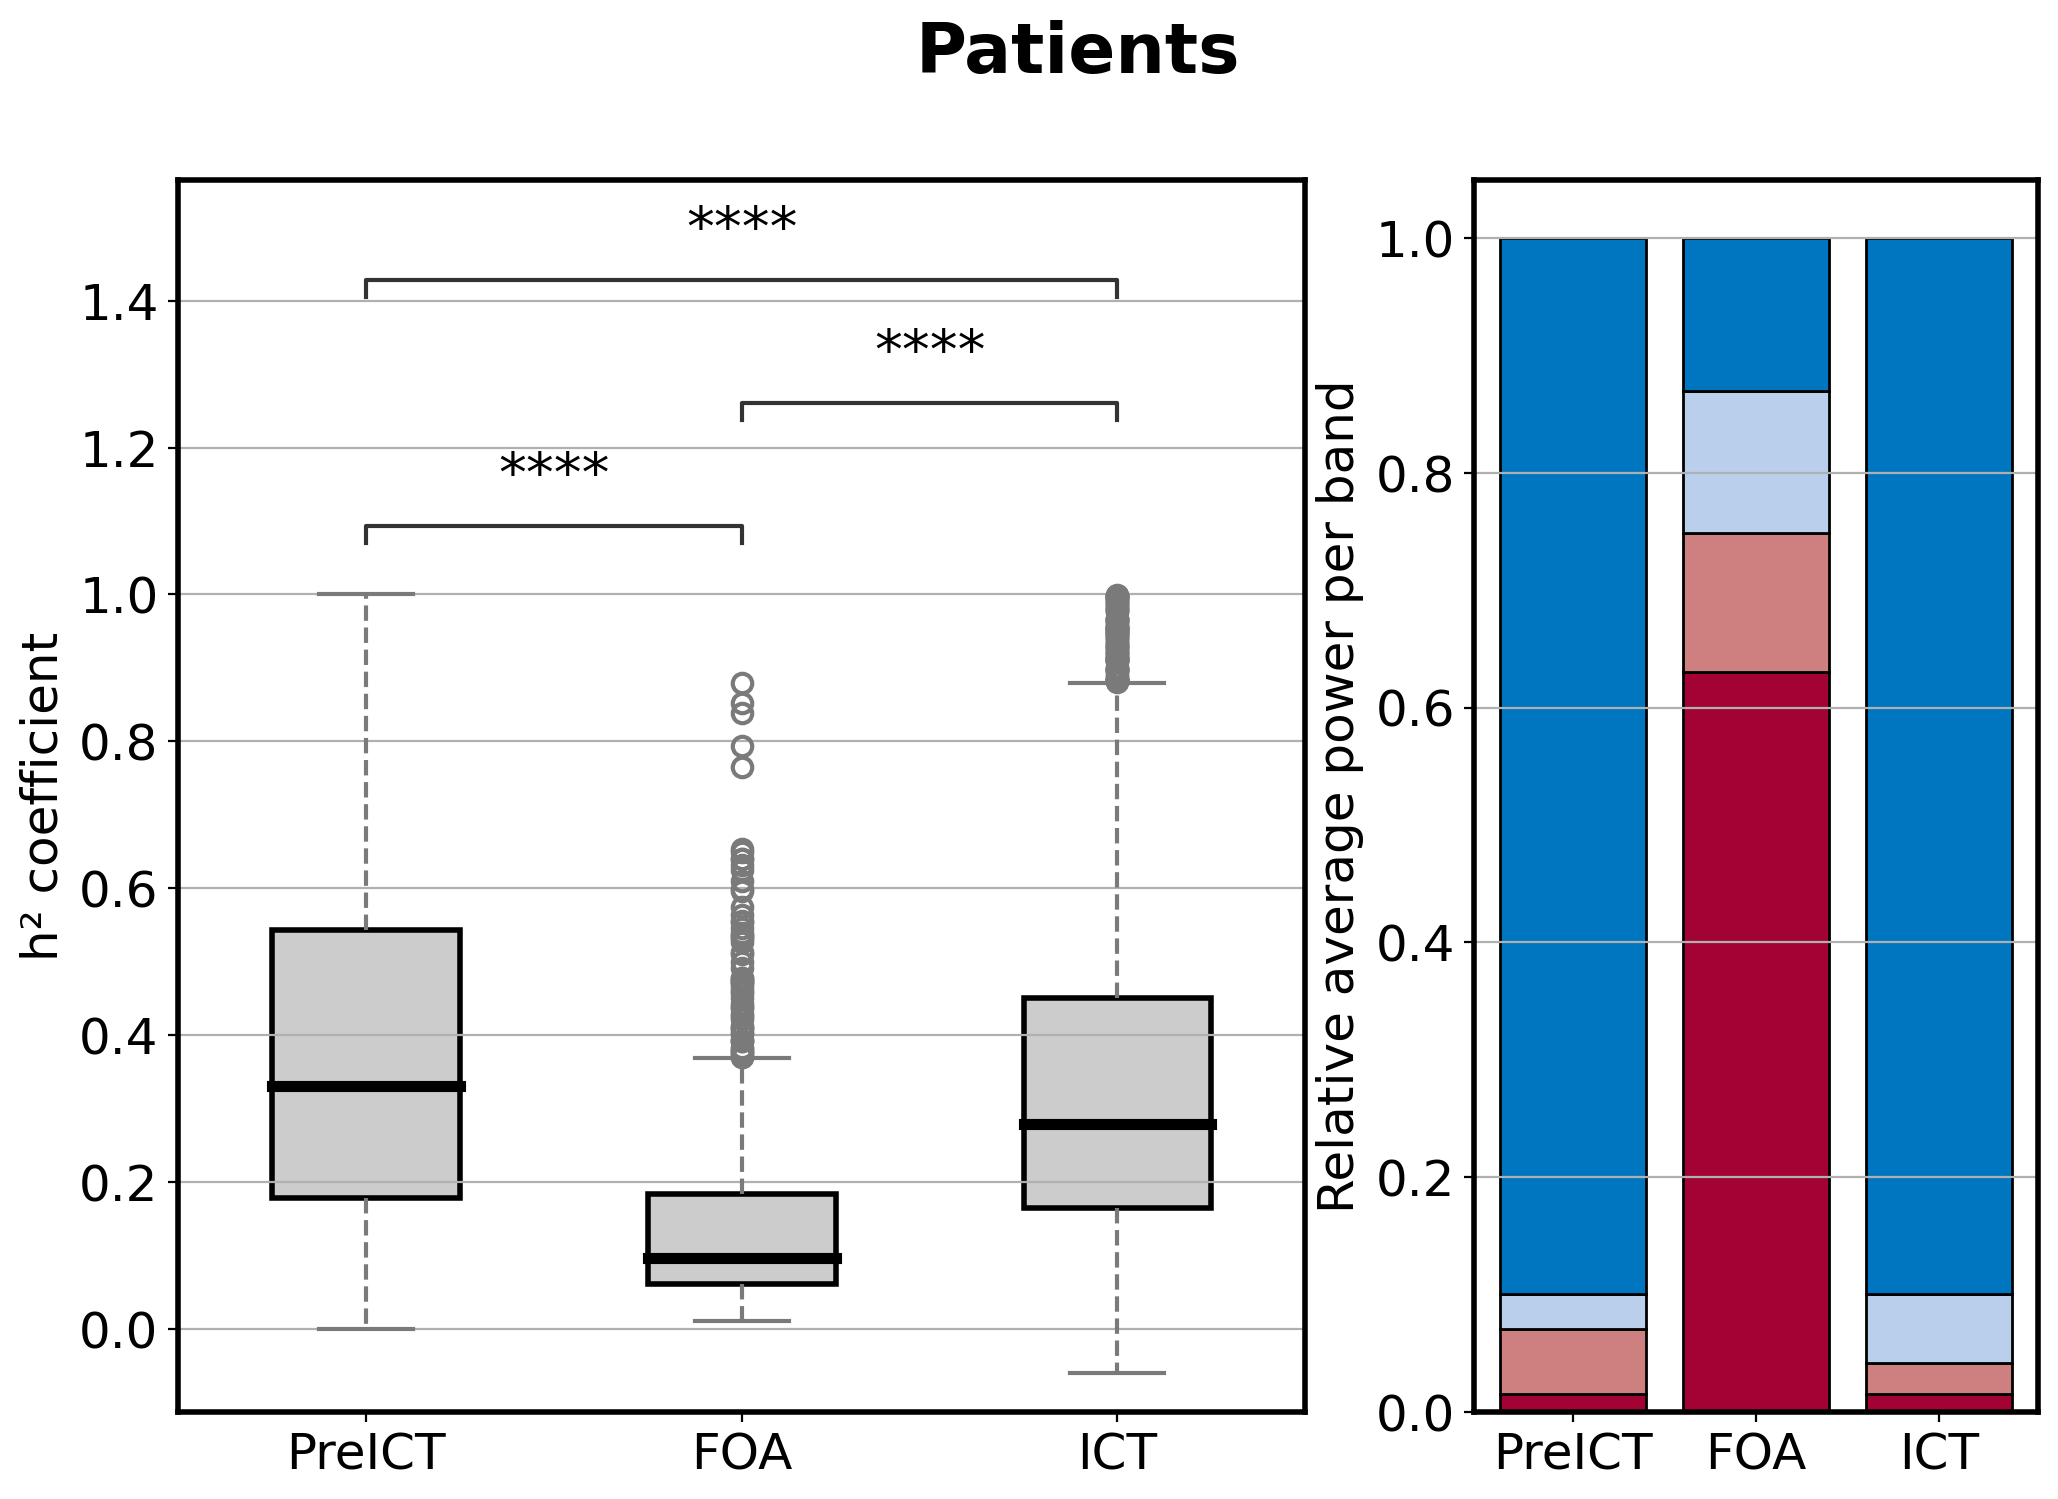

In [37]:
#performing tests on the combined data:


#kruskal-wallis:
H, p_value = kruskal(all_pict, all_lvf, all_ict)

#post-hoc dunn's test:
pairs = [("PreIct", "Lvf"), ("Lvf", "Ict"), ("PreIct", "Ict")]
data_to_test = [all_pict, all_lvf, all_ict]

posthoc_results = sp.posthoc_dunn(data_to_test, p_adjust = 'bonferroni', sort = False)
p_pict_lvf = min(posthoc_results[2][1], 1) 
p_lvf_ict = min(posthoc_results[3][2], 1) 
p_pict_ict = min(posthoc_results[1][3], 1)
dunn_p_values = [p_pict_lvf, p_lvf_ict, p_pict_ict]
#print(f" ---------- \n results for channel pair {i}: \n\n Kruskal: H = {H}, p_val = {p_value} \n post-hoc p-values: {dunn_p_values} ")

#creating a pandas dataframe for use in annotations: 
# Concatenate the datasets
values = np.concatenate([all_pict, all_lvf, all_ict])

# Create a Pandas Series from the concatenated array
values_series = pd.Series(values, name='h²')

# Create a second Pandas Series with the corresponding class names
class_series = pd.Series(['PreICT']*len(all_pict) + ['FOA']*len(all_lvf) + ['ICT']*len(all_ict), name='class')

# Concatenate the two Pandas Series along the column axis
df = pd.concat([values_series, class_series], axis=1)

x = "class"
y = "h²"

pairs = [("PreICT", "FOA"), ("FOA", "ICT"), ("PreICT", "ICT")]

test_short_name = 'Dunn'

fig, ax = plt.subplots(ncols=2, figsize=(12, 8), dpi = 200, gridspec_kw={'width_ratios': [2, 1]})

# Plot the boxplot on the first axis:

sns.boxplot(data=df,
        x = x,
        y = y,
        ax = ax[0],
        palette=['0.8', '0.8', '0.8'],
        medianprops={'color':'k', 'linewidth':4},
        boxprops={'edgecolor':'k', 'linewidth':2., 'fill':True},
        whiskerprops={'linestyle':'--', 'linewidth':1.5},
        flierprops={'marker': 'o', 'markerfacecolor': 'none', 'markersize': 7, 'markeredgewidth': 1.5},
        width=0.5)


    #setting annotations:
order = ['PreICT', 'FOA', 'ICT']

annot = Annotator(ax[0], pairs, data=df, x=x, y=y, order=order) #declaring the annotator class

annot.new_plot(ax=ax[0], pairs=pairs,
               data=df, x=x, y=y)
annot.configure(verbose=2 
                ,loc='inside'
                , pvalue_thresholds = [(0.00001, '****'), (0.0001, '***'), (0.001, '**'), (0.01, '*'), (1, 'ns')]
                ,comparisons_correction='bonferroni'
                , line_height=0.02
                , text_offset=8
                , fontsize = 20)
(annot
 .configure(test=None, test_short_name=test_short_name)
 .set_pvalues(pvalues=dunn_p_values)
 .annotate())


ax[0].tick_params(axis='x', labelsize=18)
ax[0].tick_params(axis='y', labelsize=18)

ax[0].set_ylabel('h² coefficient', fontsize=18)
ax[0].set_xlabel('', fontsize=10)


# Plot the power histogram on the second axis:
all_pict_powers /= np.sum(all_pict_powers)

all_lvf_powers /= np.sum(all_lvf_powers)

all_ict_powers /= np.sum(all_ict_powers)


# Define the group labels and colors
groups = ['PreICT', 'FOA', 'ICT']

sns_palette = sns.color_palette("coolwarm", 20)
#sns_palette = sns.color_palette("rocket", 20)
#sns_palette = sns.color_palette("Greys", 80)


colors = ['#a30234', '#ce8080', '#bacfec', '#0076c0']

#colors = [sns_palette[19], sns_palette[15], sns_palette[8], sns_palette[1]]

#colors = [sns_palette[3], sns_palette[30], sns_palette[60], sns_palette[79]]


labels = ['Gamma','Beta','Alpha','Theta']

# Create the stacked bar chart
bottom = np.zeros(len(groups))
for j, row in enumerate(power_data_simu):
    ax[1].bar(groups, row, bottom=bottom, color=colors[j], edgecolor='black')
    bottom += row

# Add legend and labels, adjust font sizes:
#ax[1].legend(labels, fontsize = 14)
ax[1].set_ylabel('Relative average power per band', fontsize=18)
ax[1].tick_params(axis='x', labelsize=18)
ax[1].tick_params(axis='y', labelsize=18)
# Set titles for the subplots
#ax[0].set_title("F: {:.1f}, p-value: {:.1e}".format(H, p_value), fontsize = 18)
#ax[1].set_title('Relative power', fontsize = 18)


#turn the grid on:

ax[0].grid(True, which='major', axis='y')
ax[1].grid(True, which='major', axis='y')

#make the borders of figure thicker:

for spine in ax[0].spines.values():
    spine.set_linewidth(2)

for spine in ax[1].spines.values():
    spine.set_linewidth(2)

# add a general title to the entire figure
fig.suptitle(f'Patients', fontsize=25, fontweight='bold')

#fig.savefig(f'all_patients.png', dpi=300, transparent=True) 
plt.show()

### FIGURE 7 ANNEX: SIMULATED DATA

60
24
148
p-value annotation legend:
      ns: 1.00e-01 < p <= 1.00e+00
       *: 1.00e-02 < p <= 1.00e-01
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PreICT vs. FOA: Custom statistical test, P_val:5.204e-03
FOA vs. ICT: Custom statistical test, P_val:2.963e-21
PreICT vs. ICT: Custom statistical test, P_val:3.179e-18


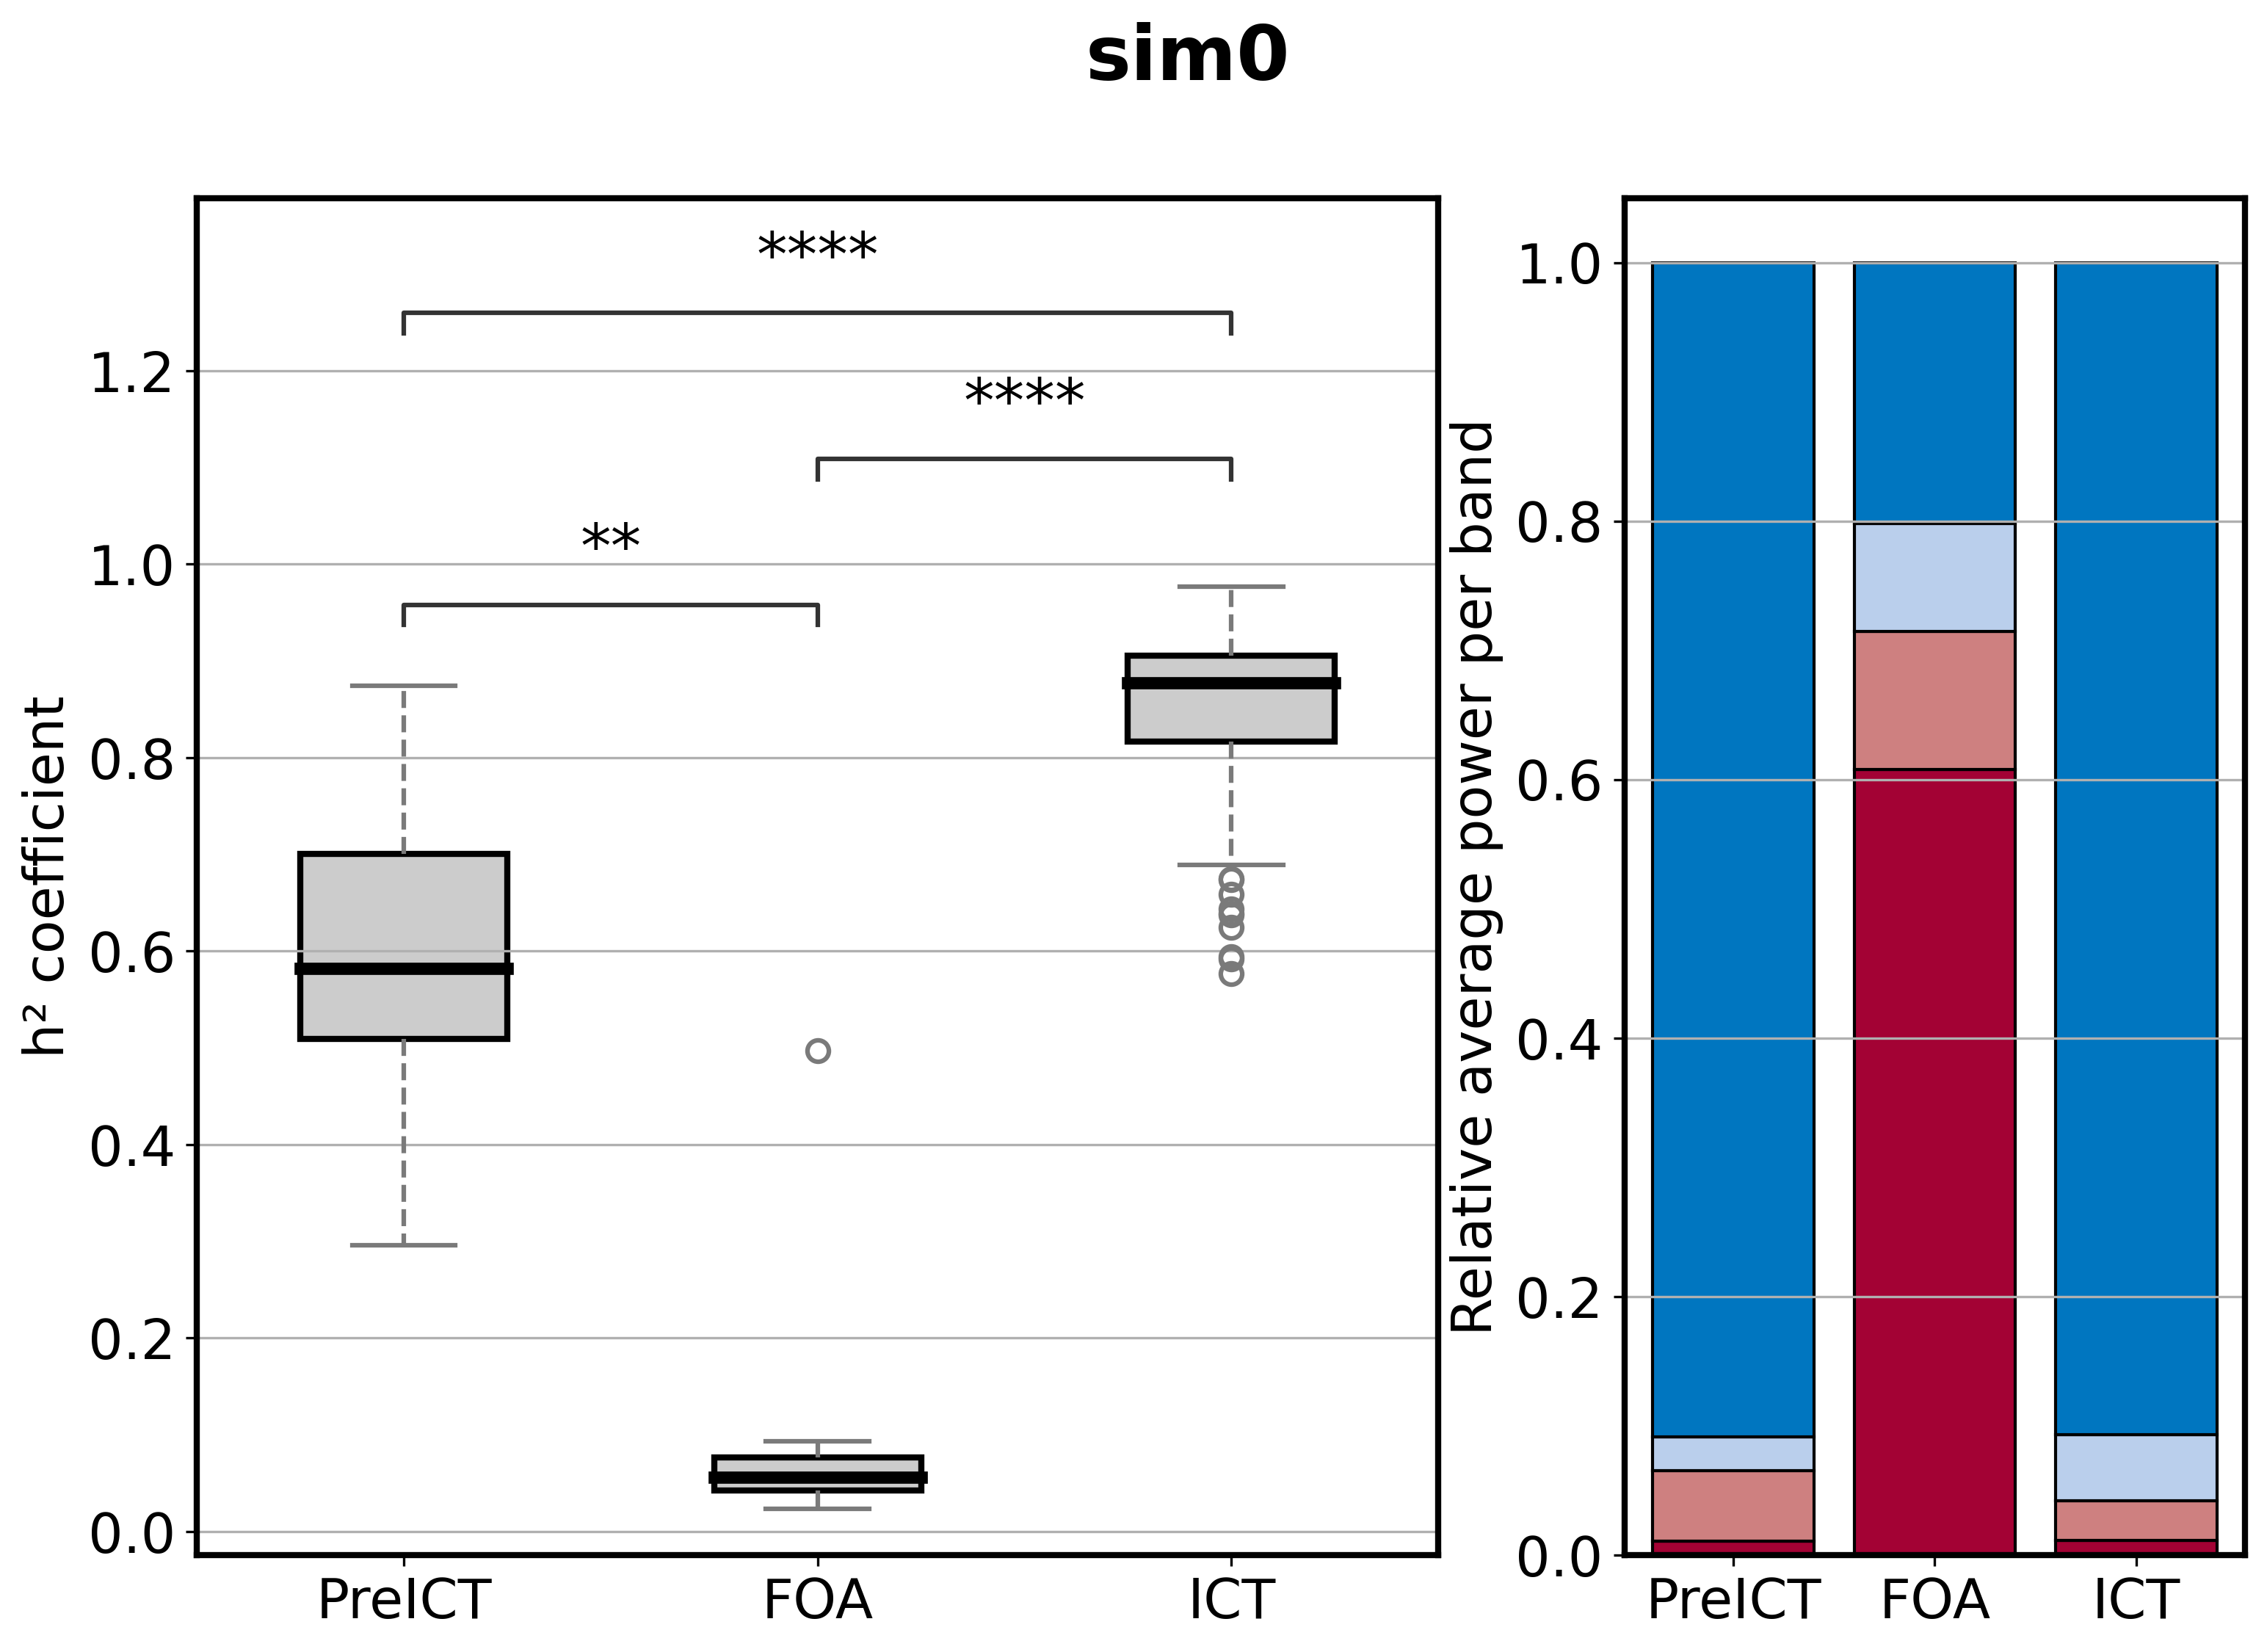

60
24
148
p-value annotation legend:
      ns: 1.00e-01 < p <= 1.00e+00
       *: 1.00e-02 < p <= 1.00e-01
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PreICT vs. FOA: Custom statistical test, P_val:9.181e-03
FOA vs. ICT: Custom statistical test, P_val:1.044e-19
PreICT vs. ICT: Custom statistical test, P_val:3.428e-17


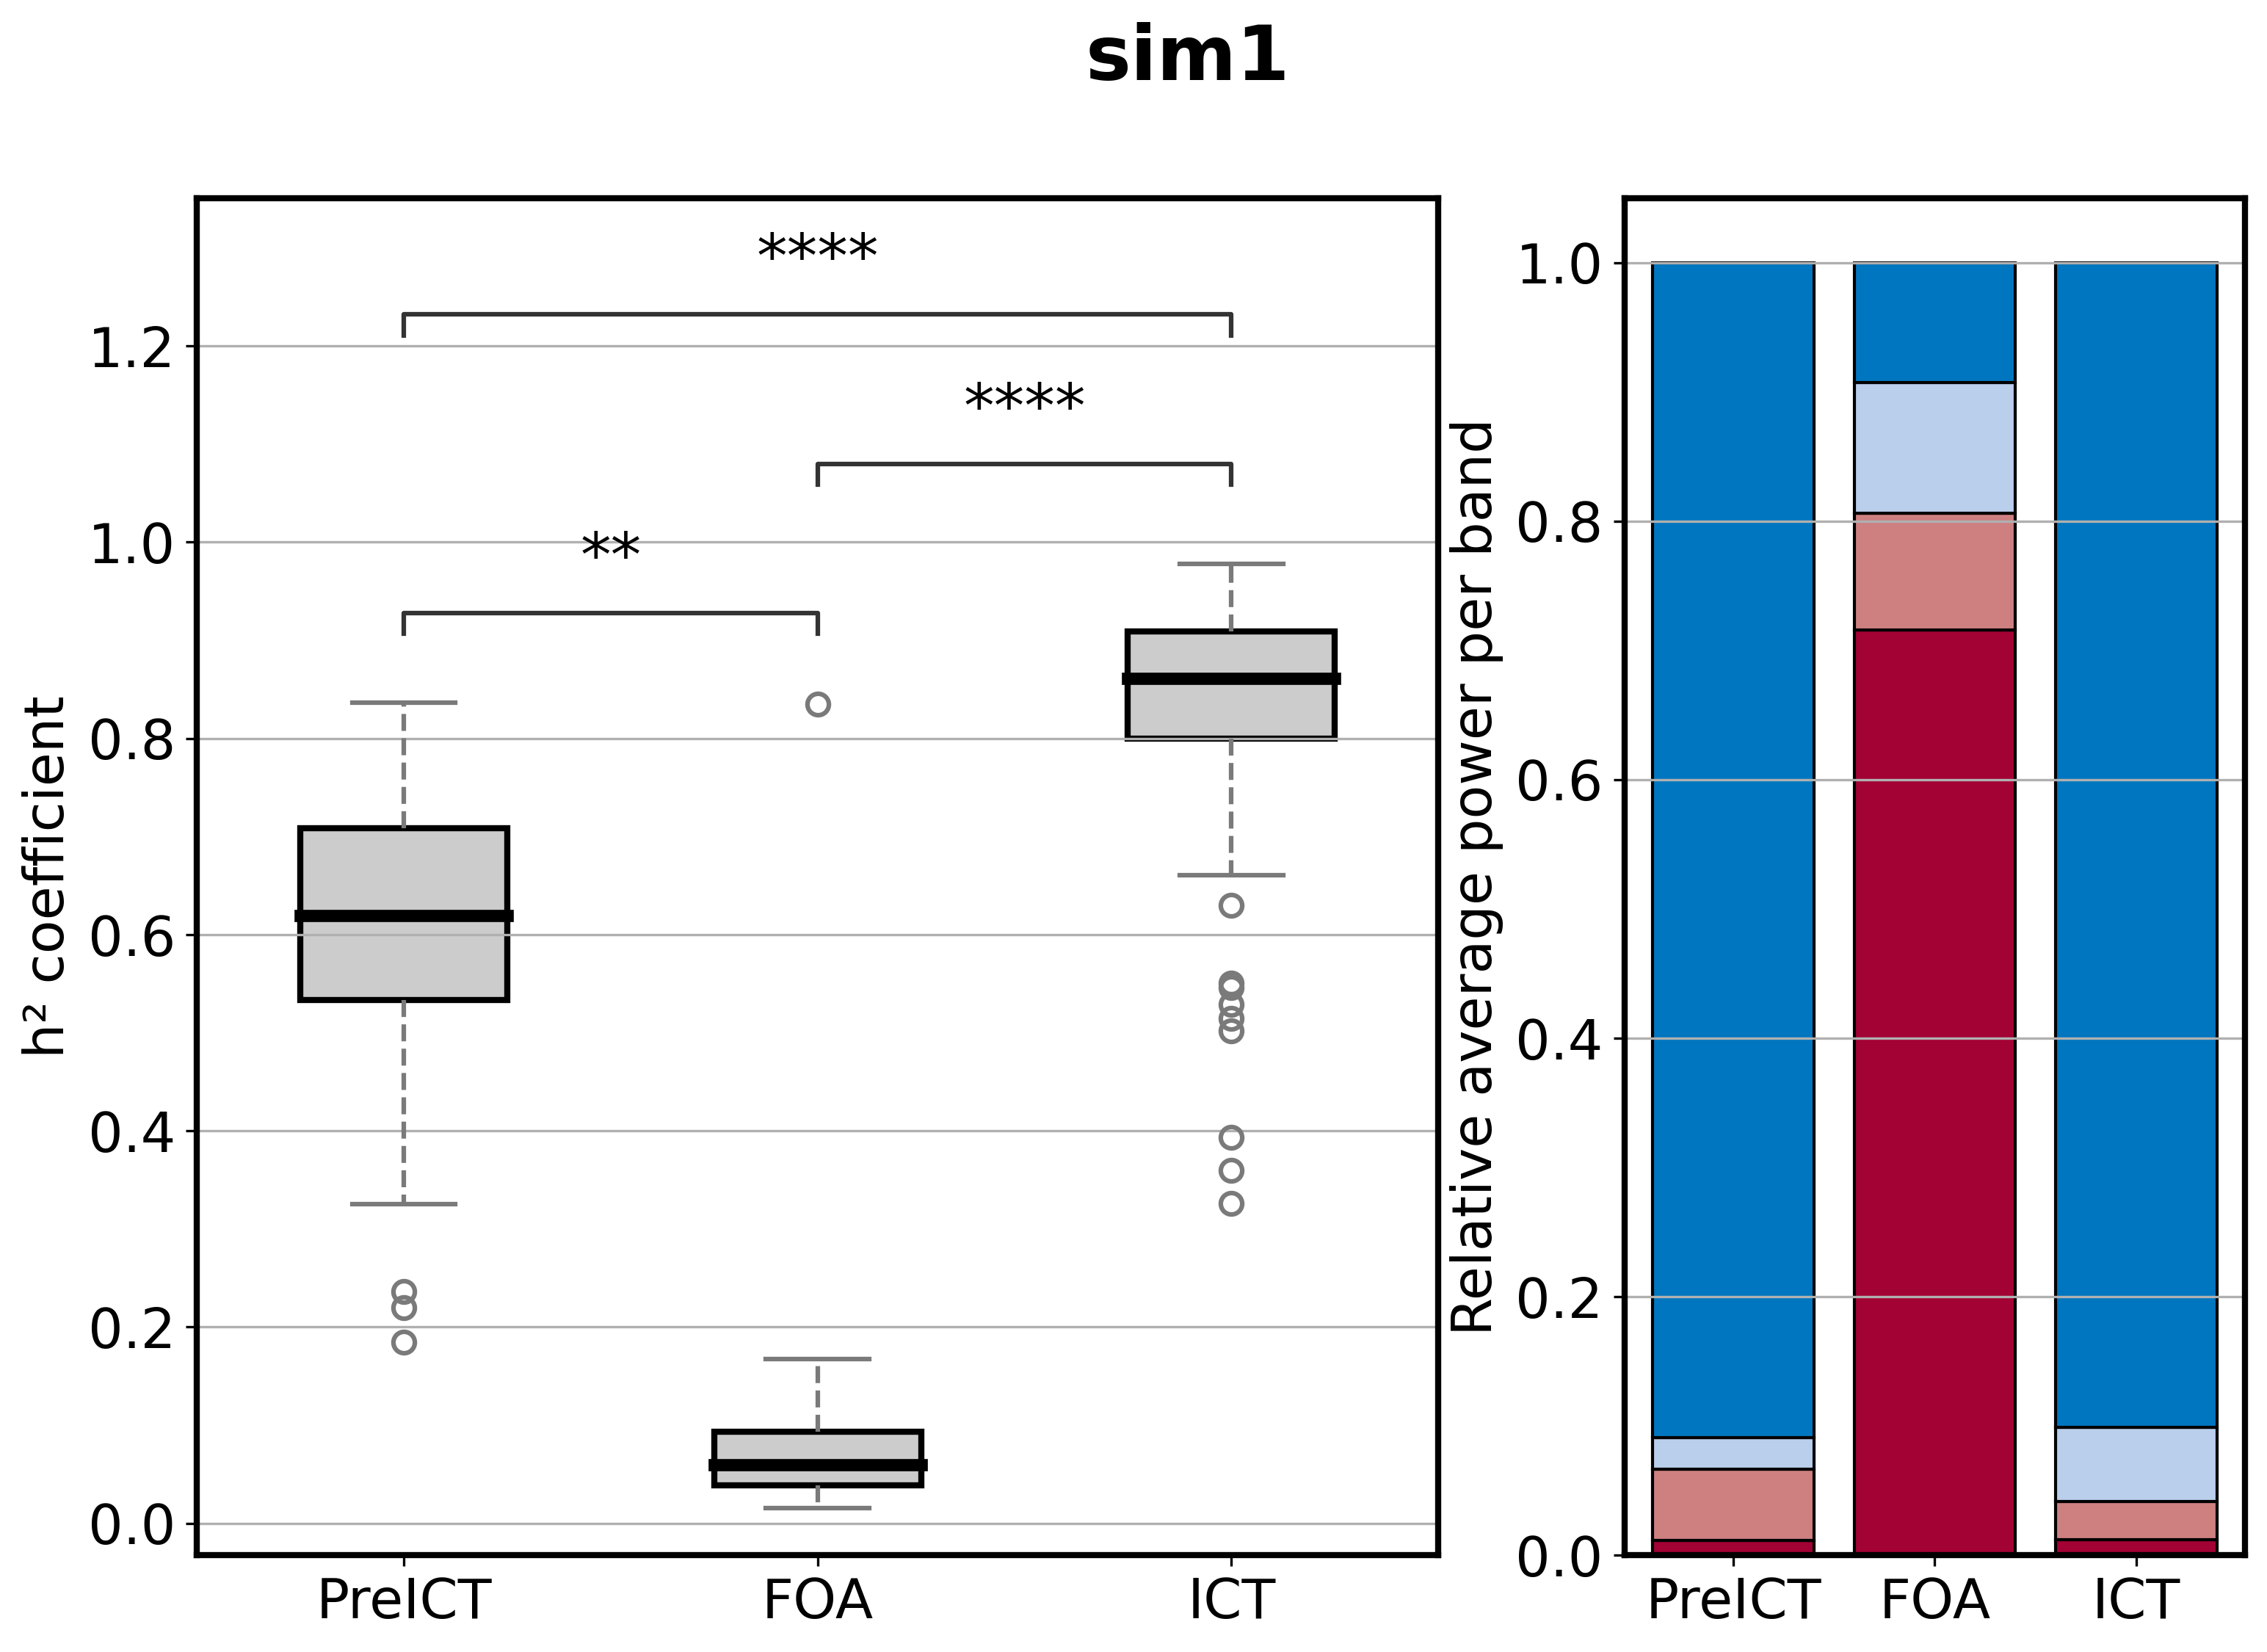

60
24
148
p-value annotation legend:
      ns: 1.00e-01 < p <= 1.00e+00
       *: 1.00e-02 < p <= 1.00e-01
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PreICT vs. FOA: Custom statistical test, P_val:4.954e-03
FOA vs. ICT: Custom statistical test, P_val:2.237e-21
PreICT vs. ICT: Custom statistical test, P_val:2.684e-18


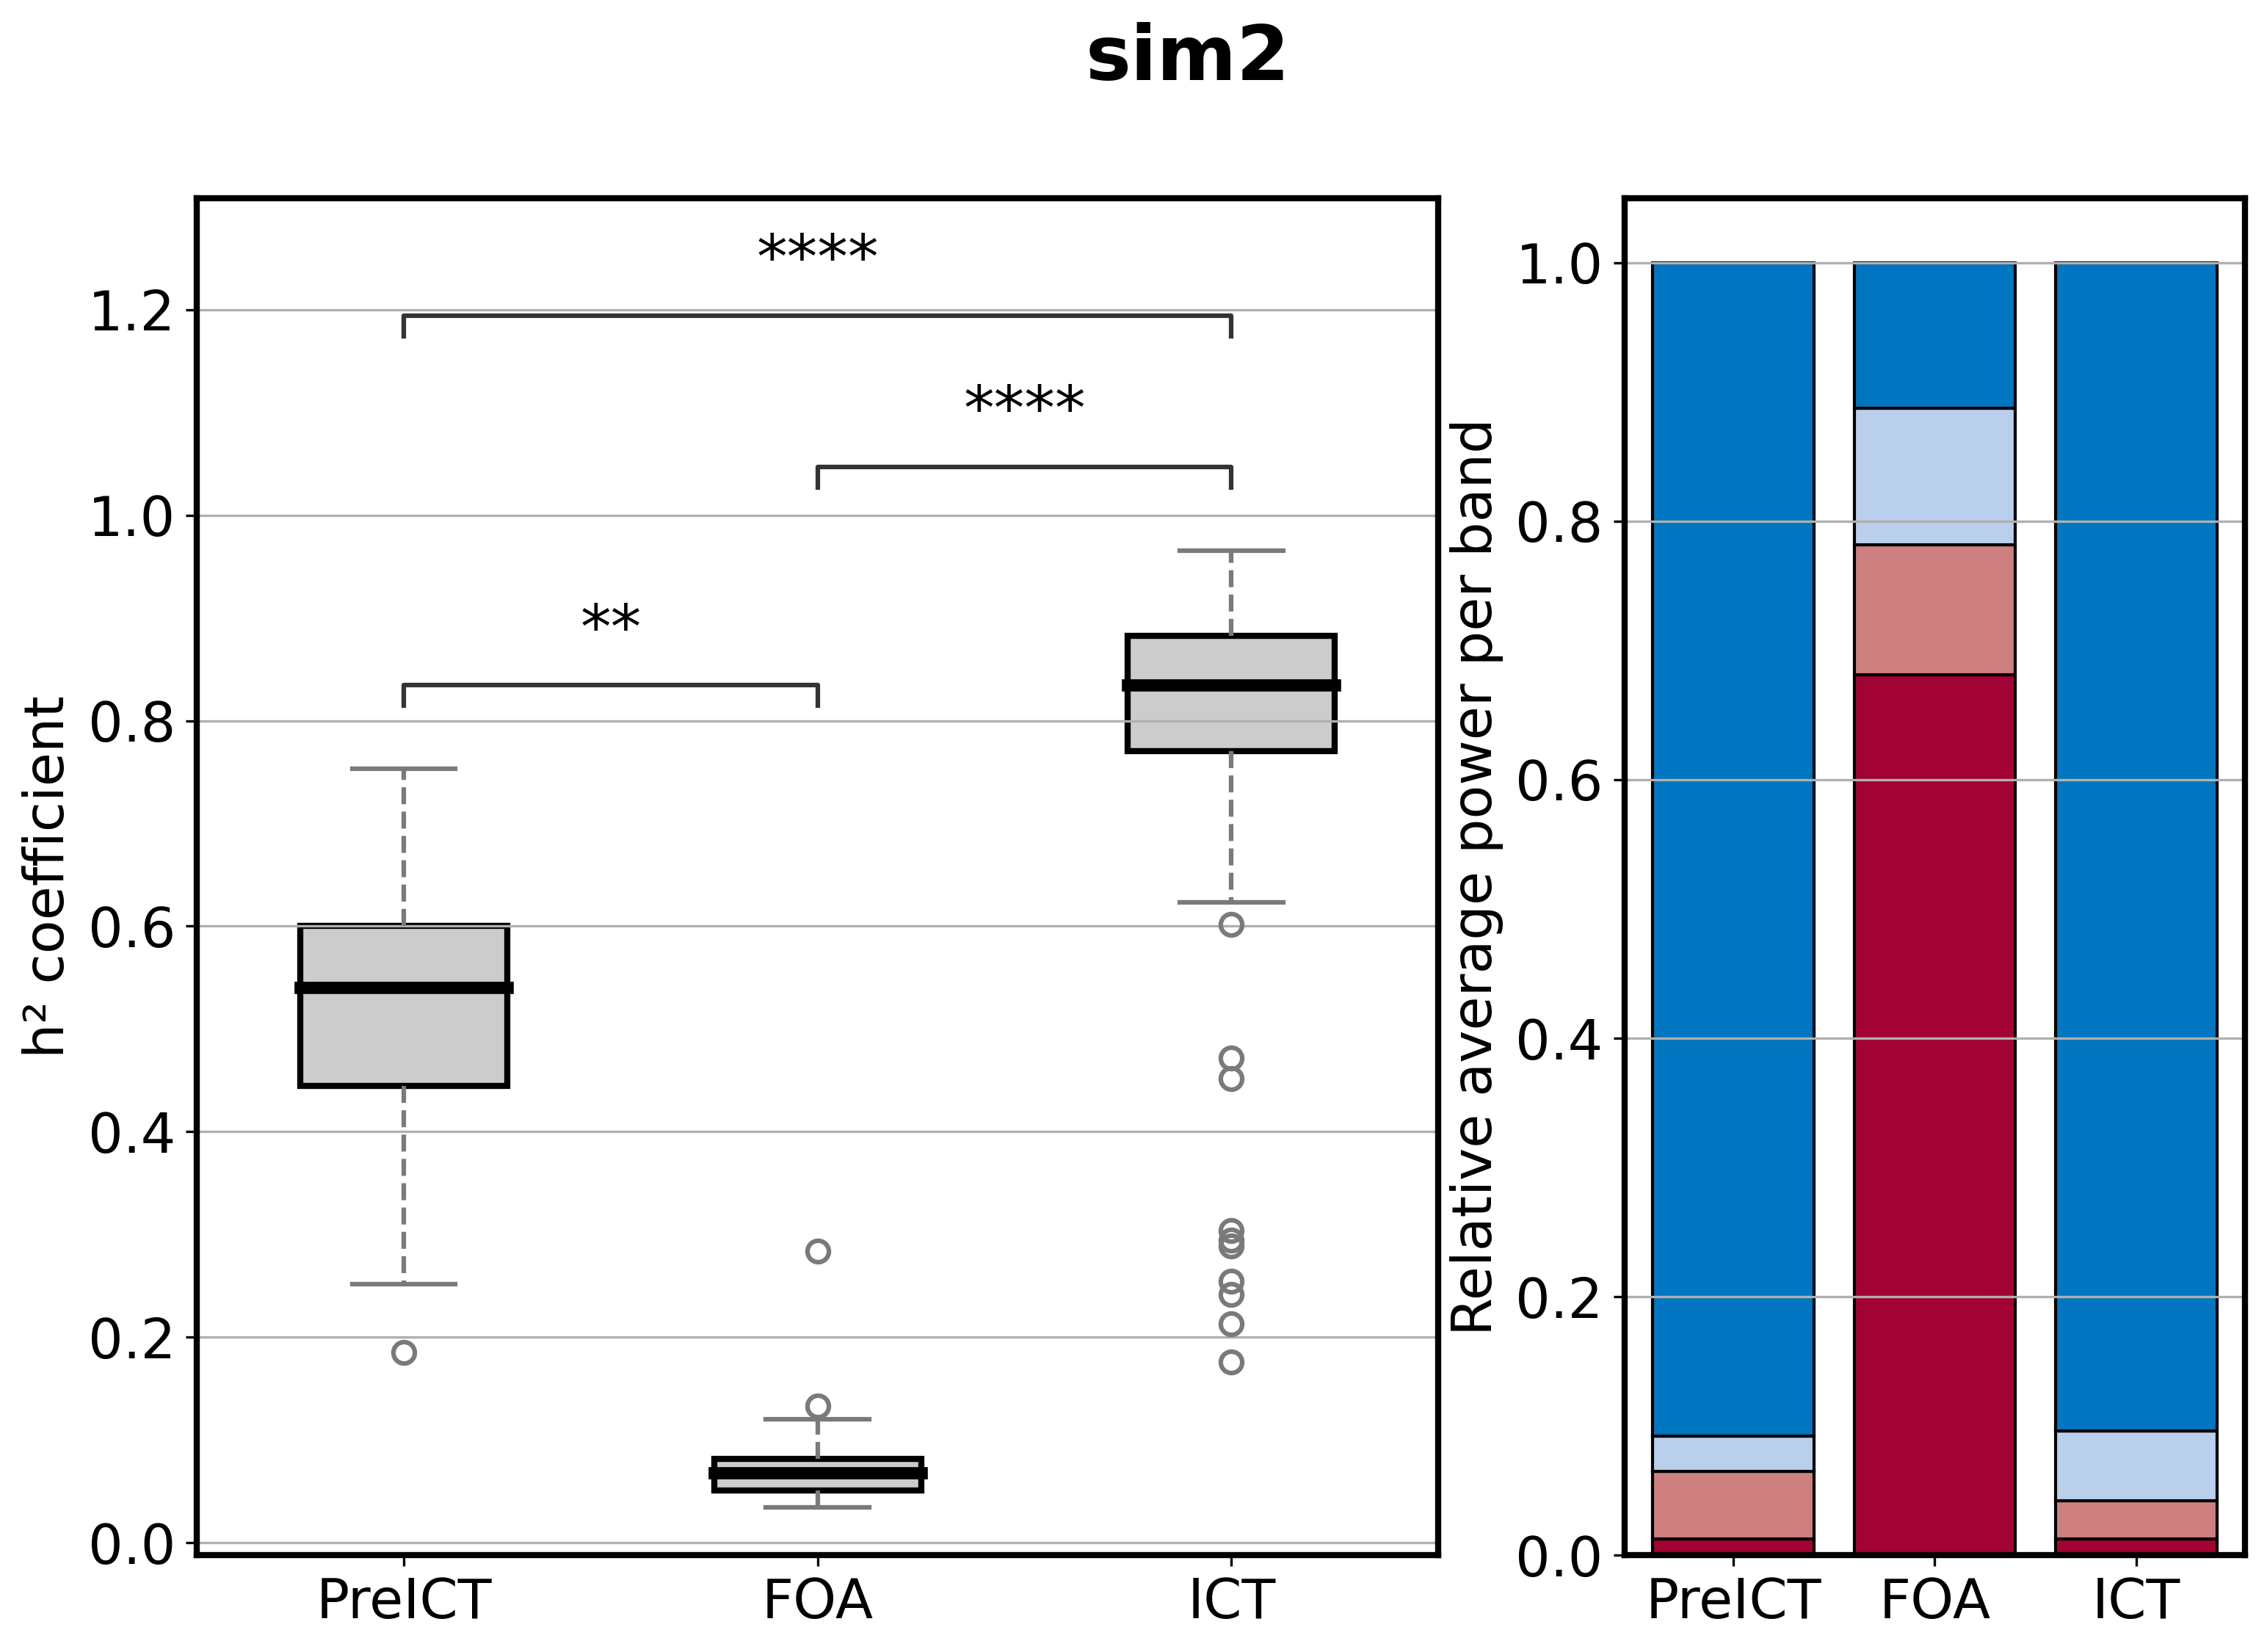

60
24
148
p-value annotation legend:
      ns: 1.00e-01 < p <= 1.00e+00
       *: 1.00e-02 < p <= 1.00e-01
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PreICT vs. FOA: Custom statistical test, P_val:9.862e-03
FOA vs. ICT: Custom statistical test, P_val:6.718e-22
PreICT vs. ICT: Custom statistical test, P_val:2.591e-20


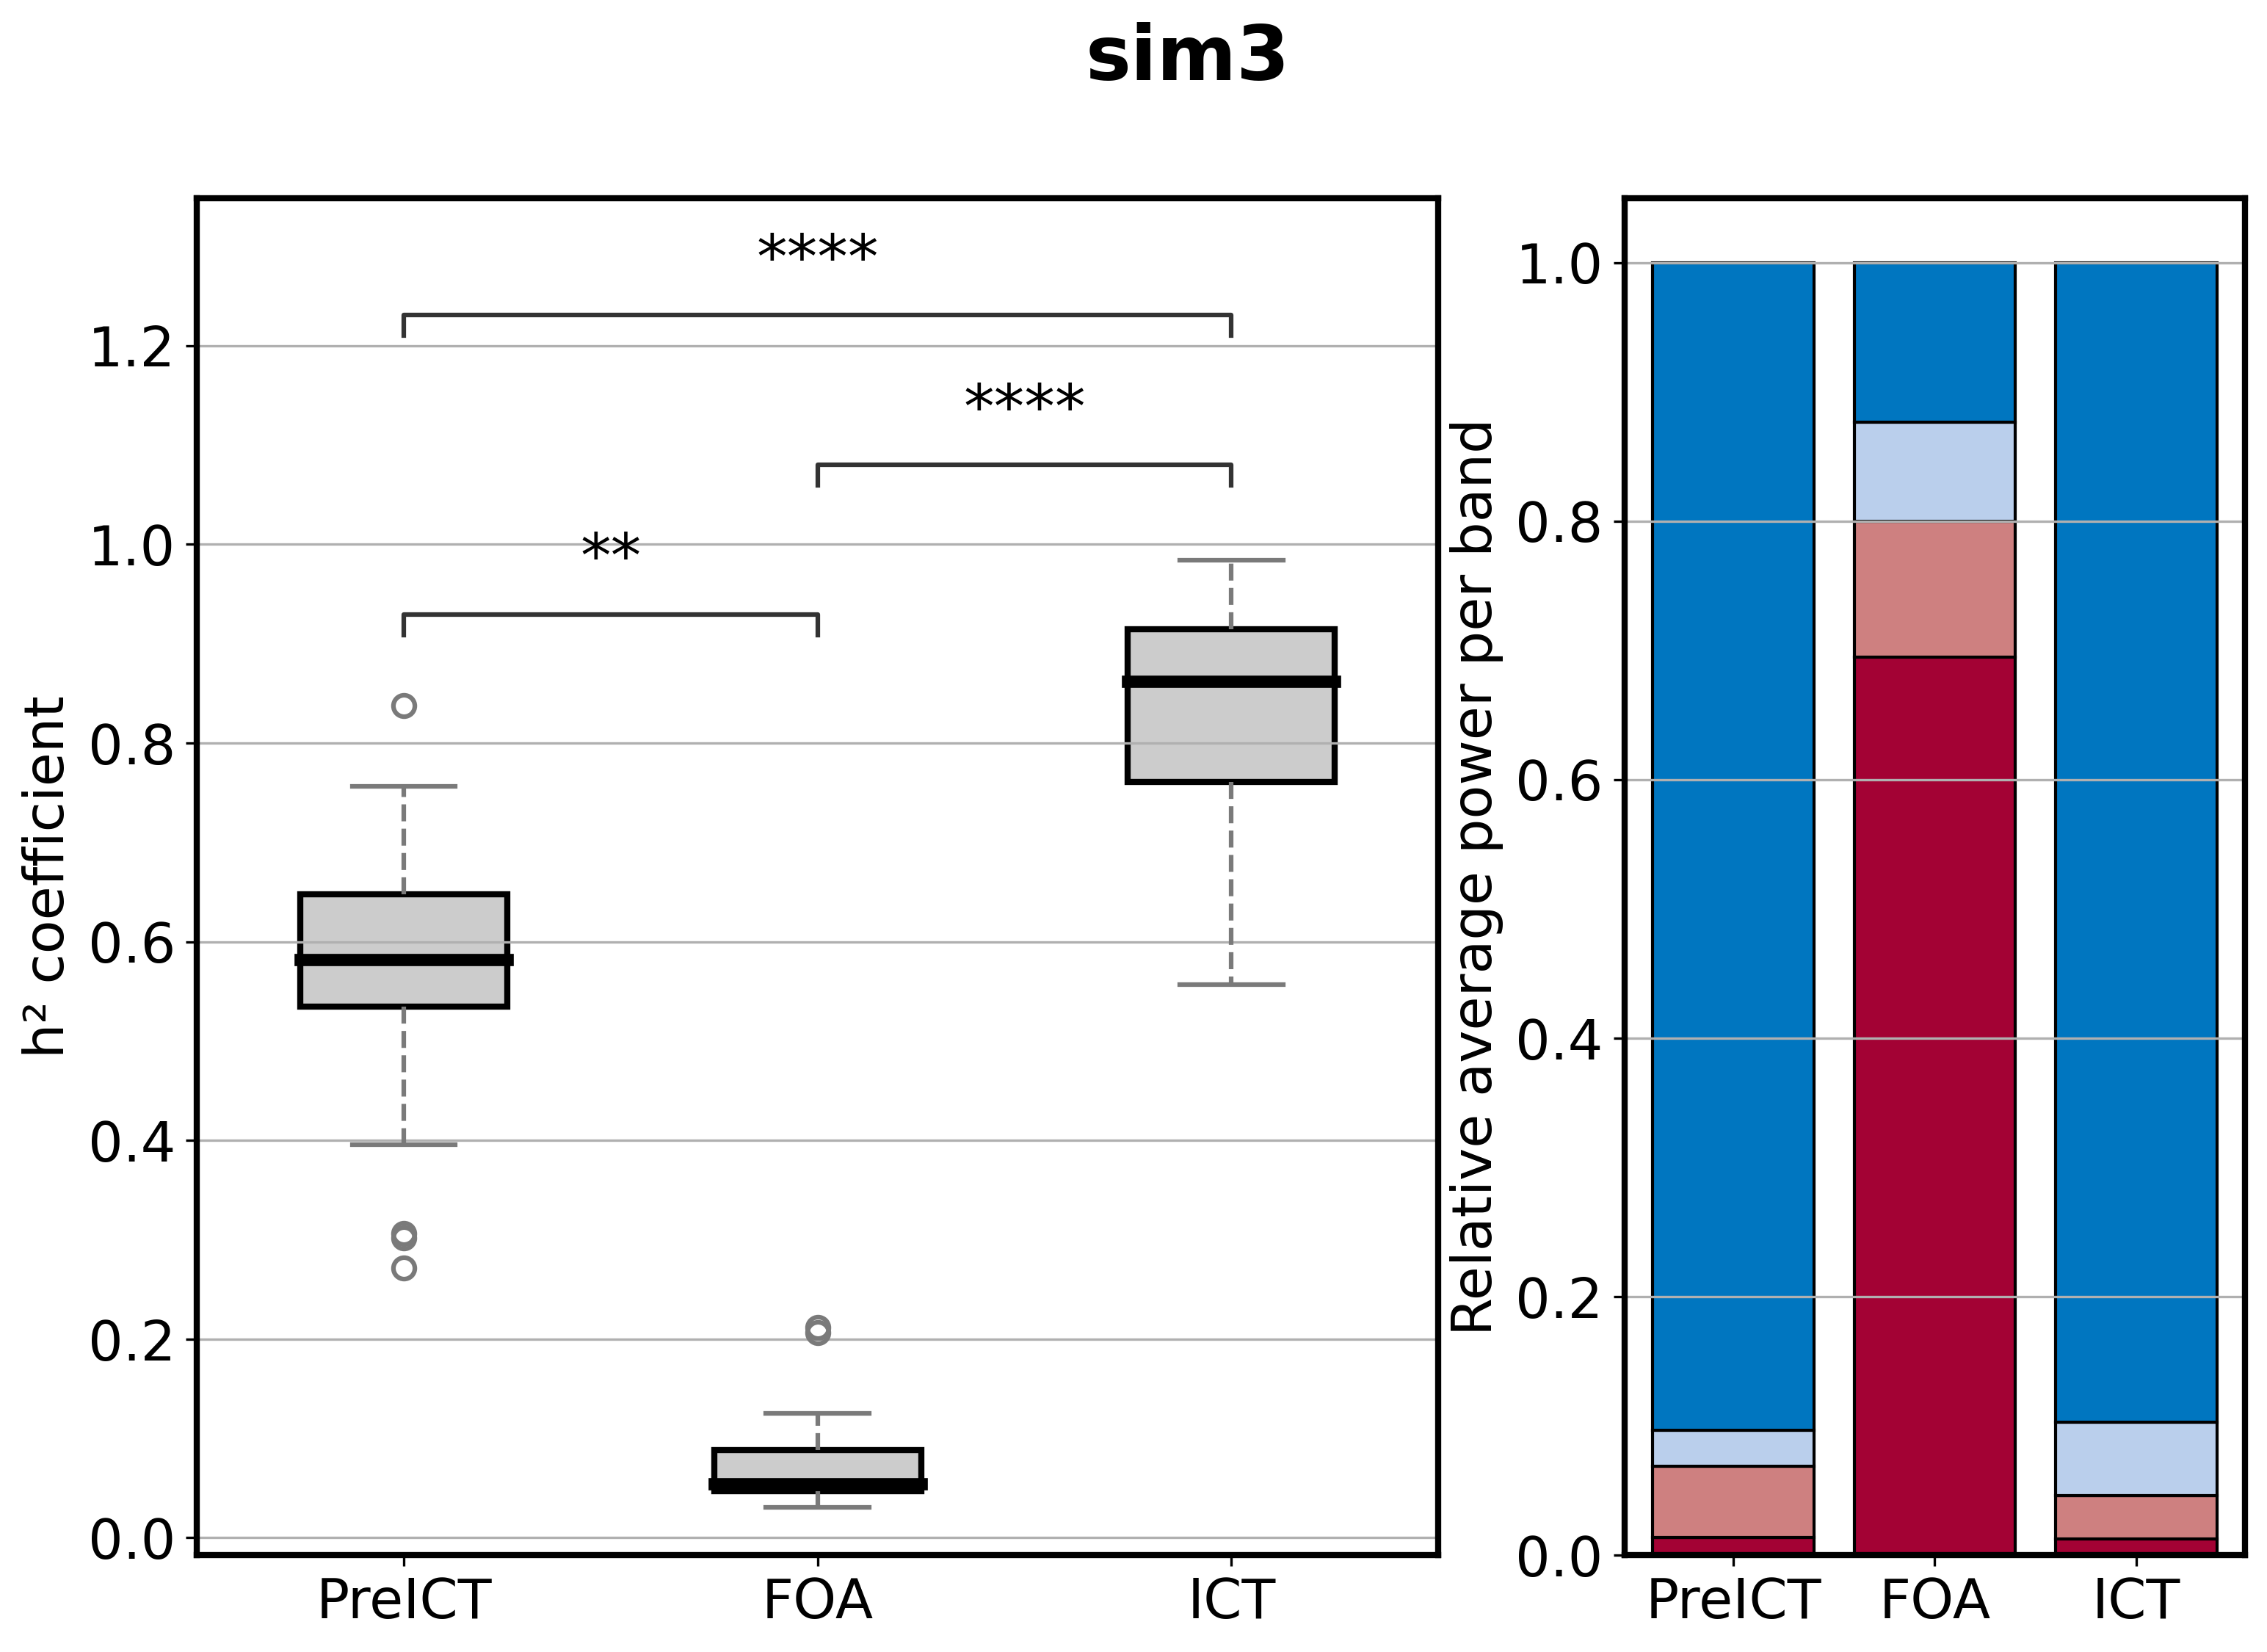

60
24
148
p-value annotation legend:
      ns: 1.00e-01 < p <= 1.00e+00
       *: 1.00e-02 < p <= 1.00e-01
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PreICT vs. FOA: Custom statistical test, P_val:4.401e-03
FOA vs. ICT: Custom statistical test, P_val:6.124e-20
PreICT vs. ICT: Custom statistical test, P_val:3.277e-16


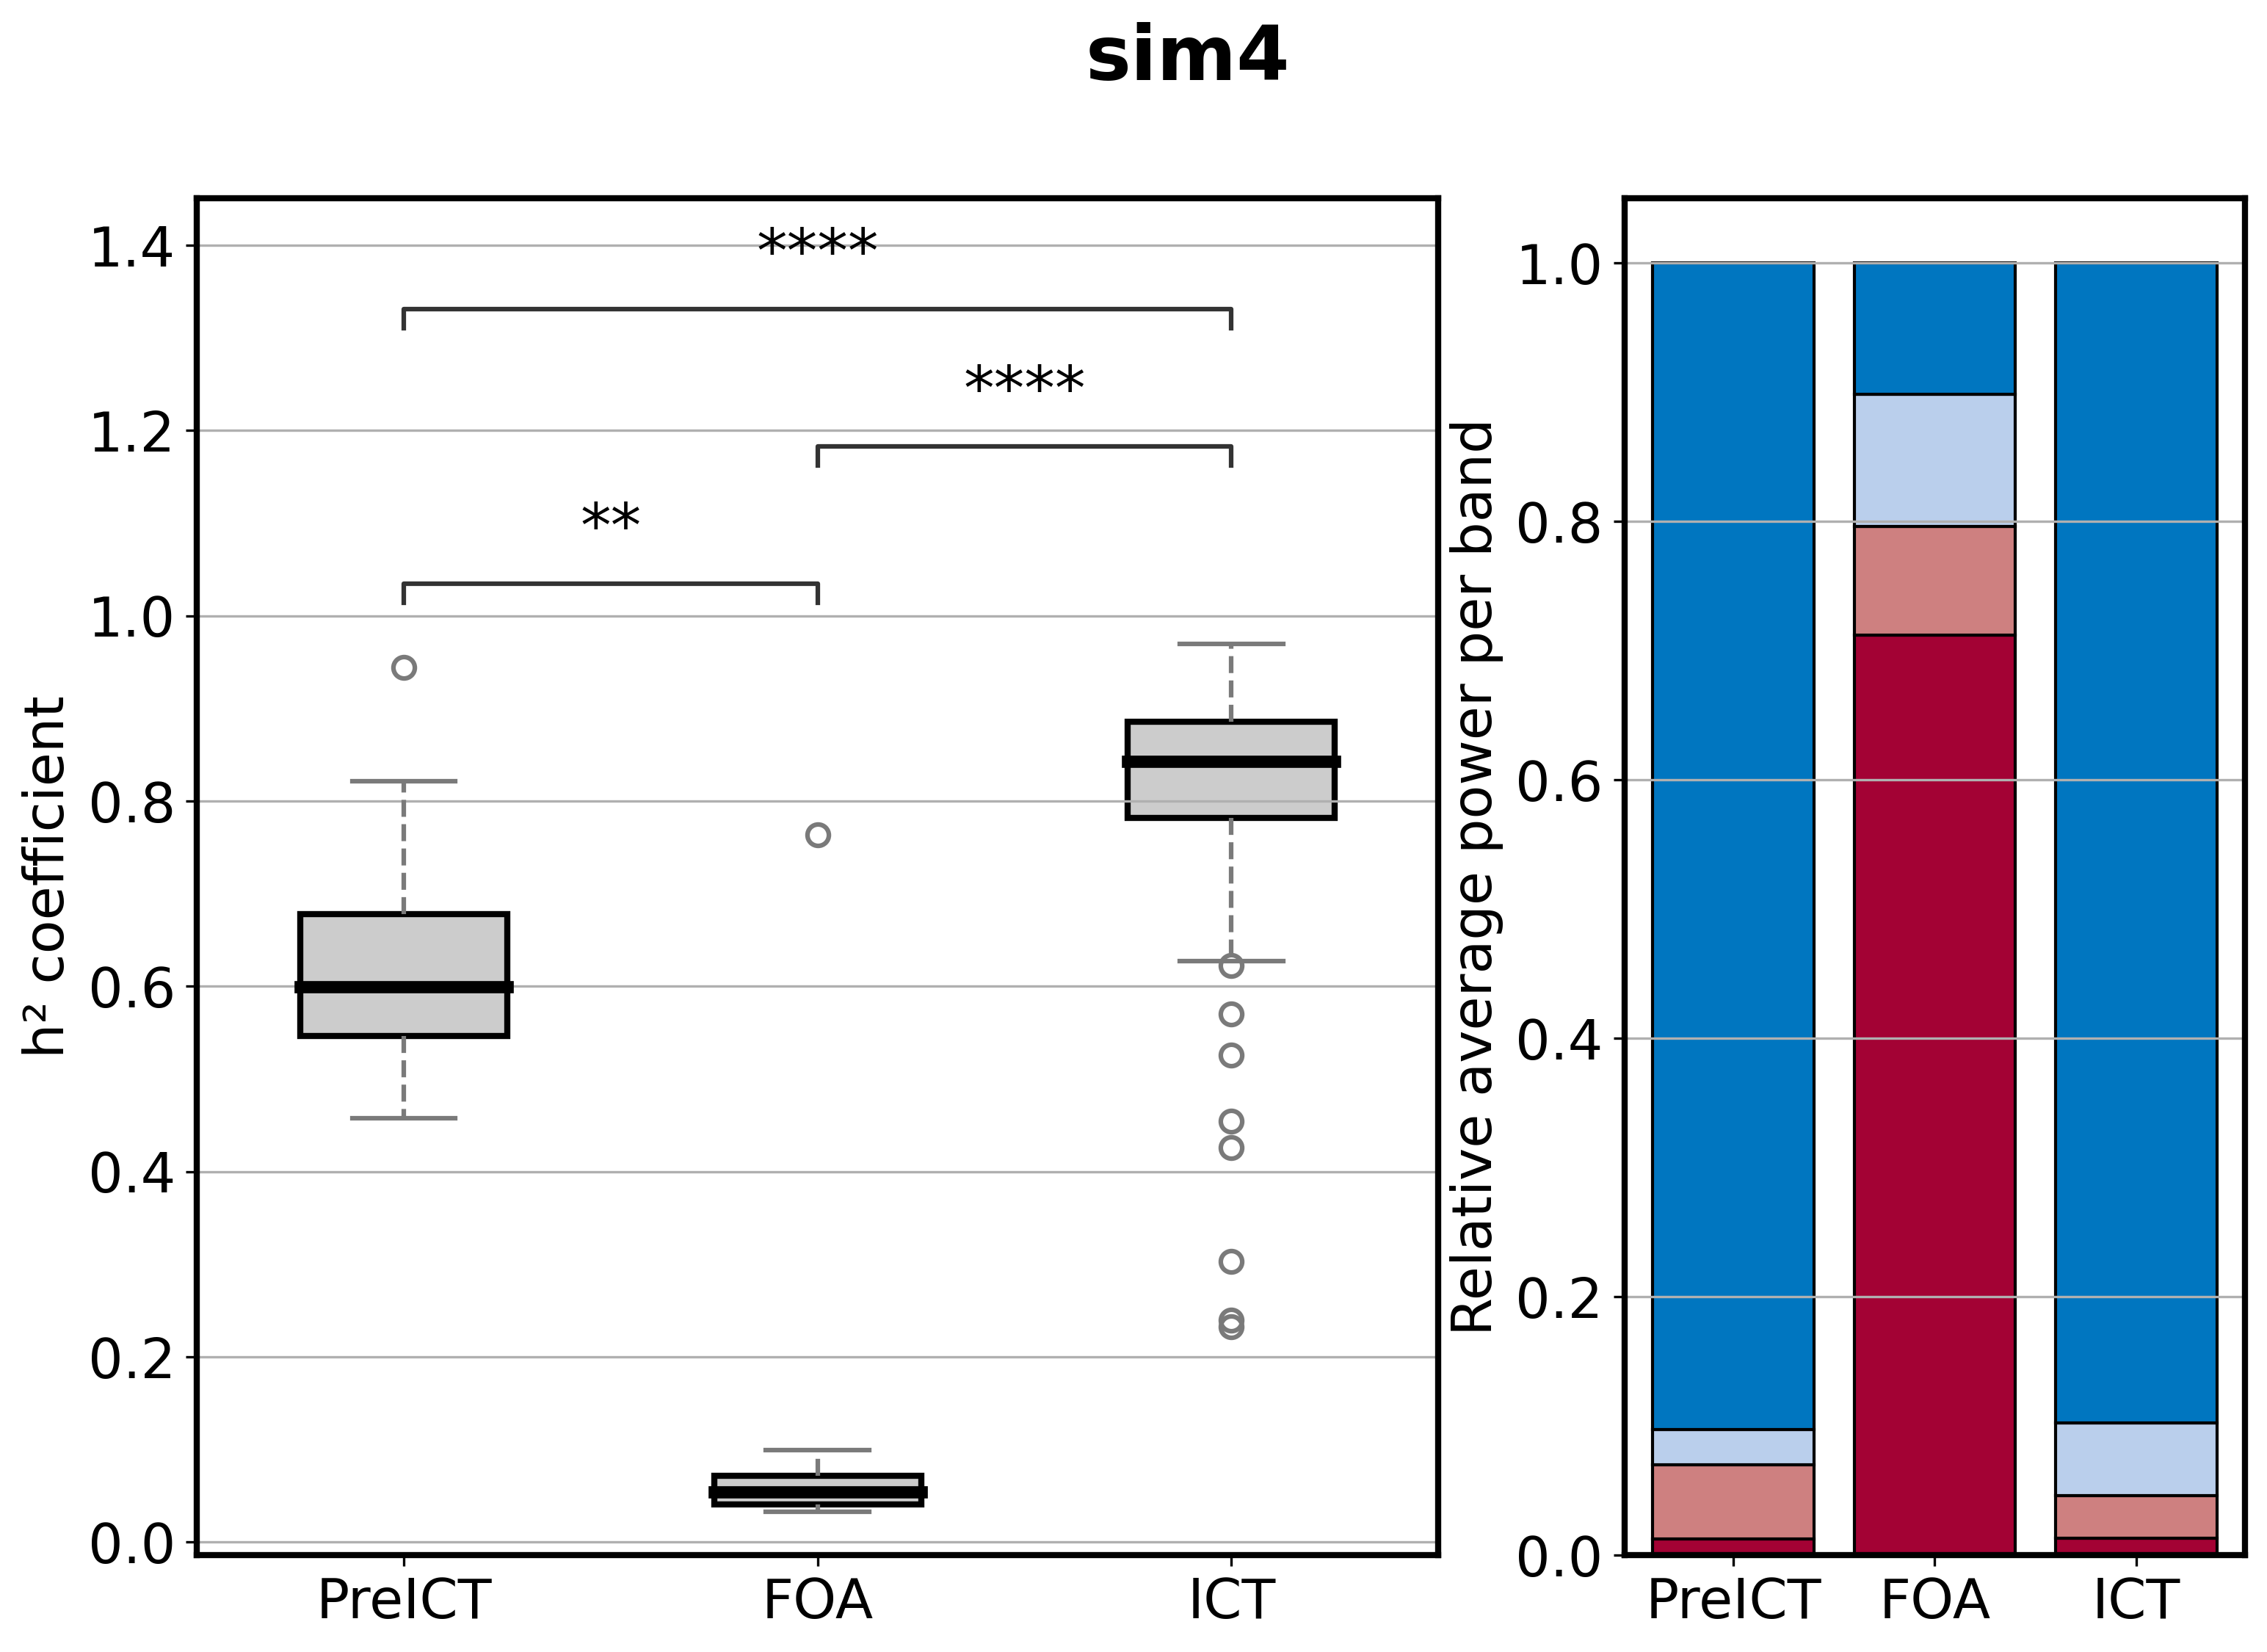

60
24
148
p-value annotation legend:
      ns: 1.00e-01 < p <= 1.00e+00
       *: 1.00e-02 < p <= 1.00e-01
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PreICT vs. FOA: Custom statistical test, P_val:9.320e-03
FOA vs. ICT: Custom statistical test, P_val:7.251e-22
PreICT vs. ICT: Custom statistical test, P_val:3.736e-20


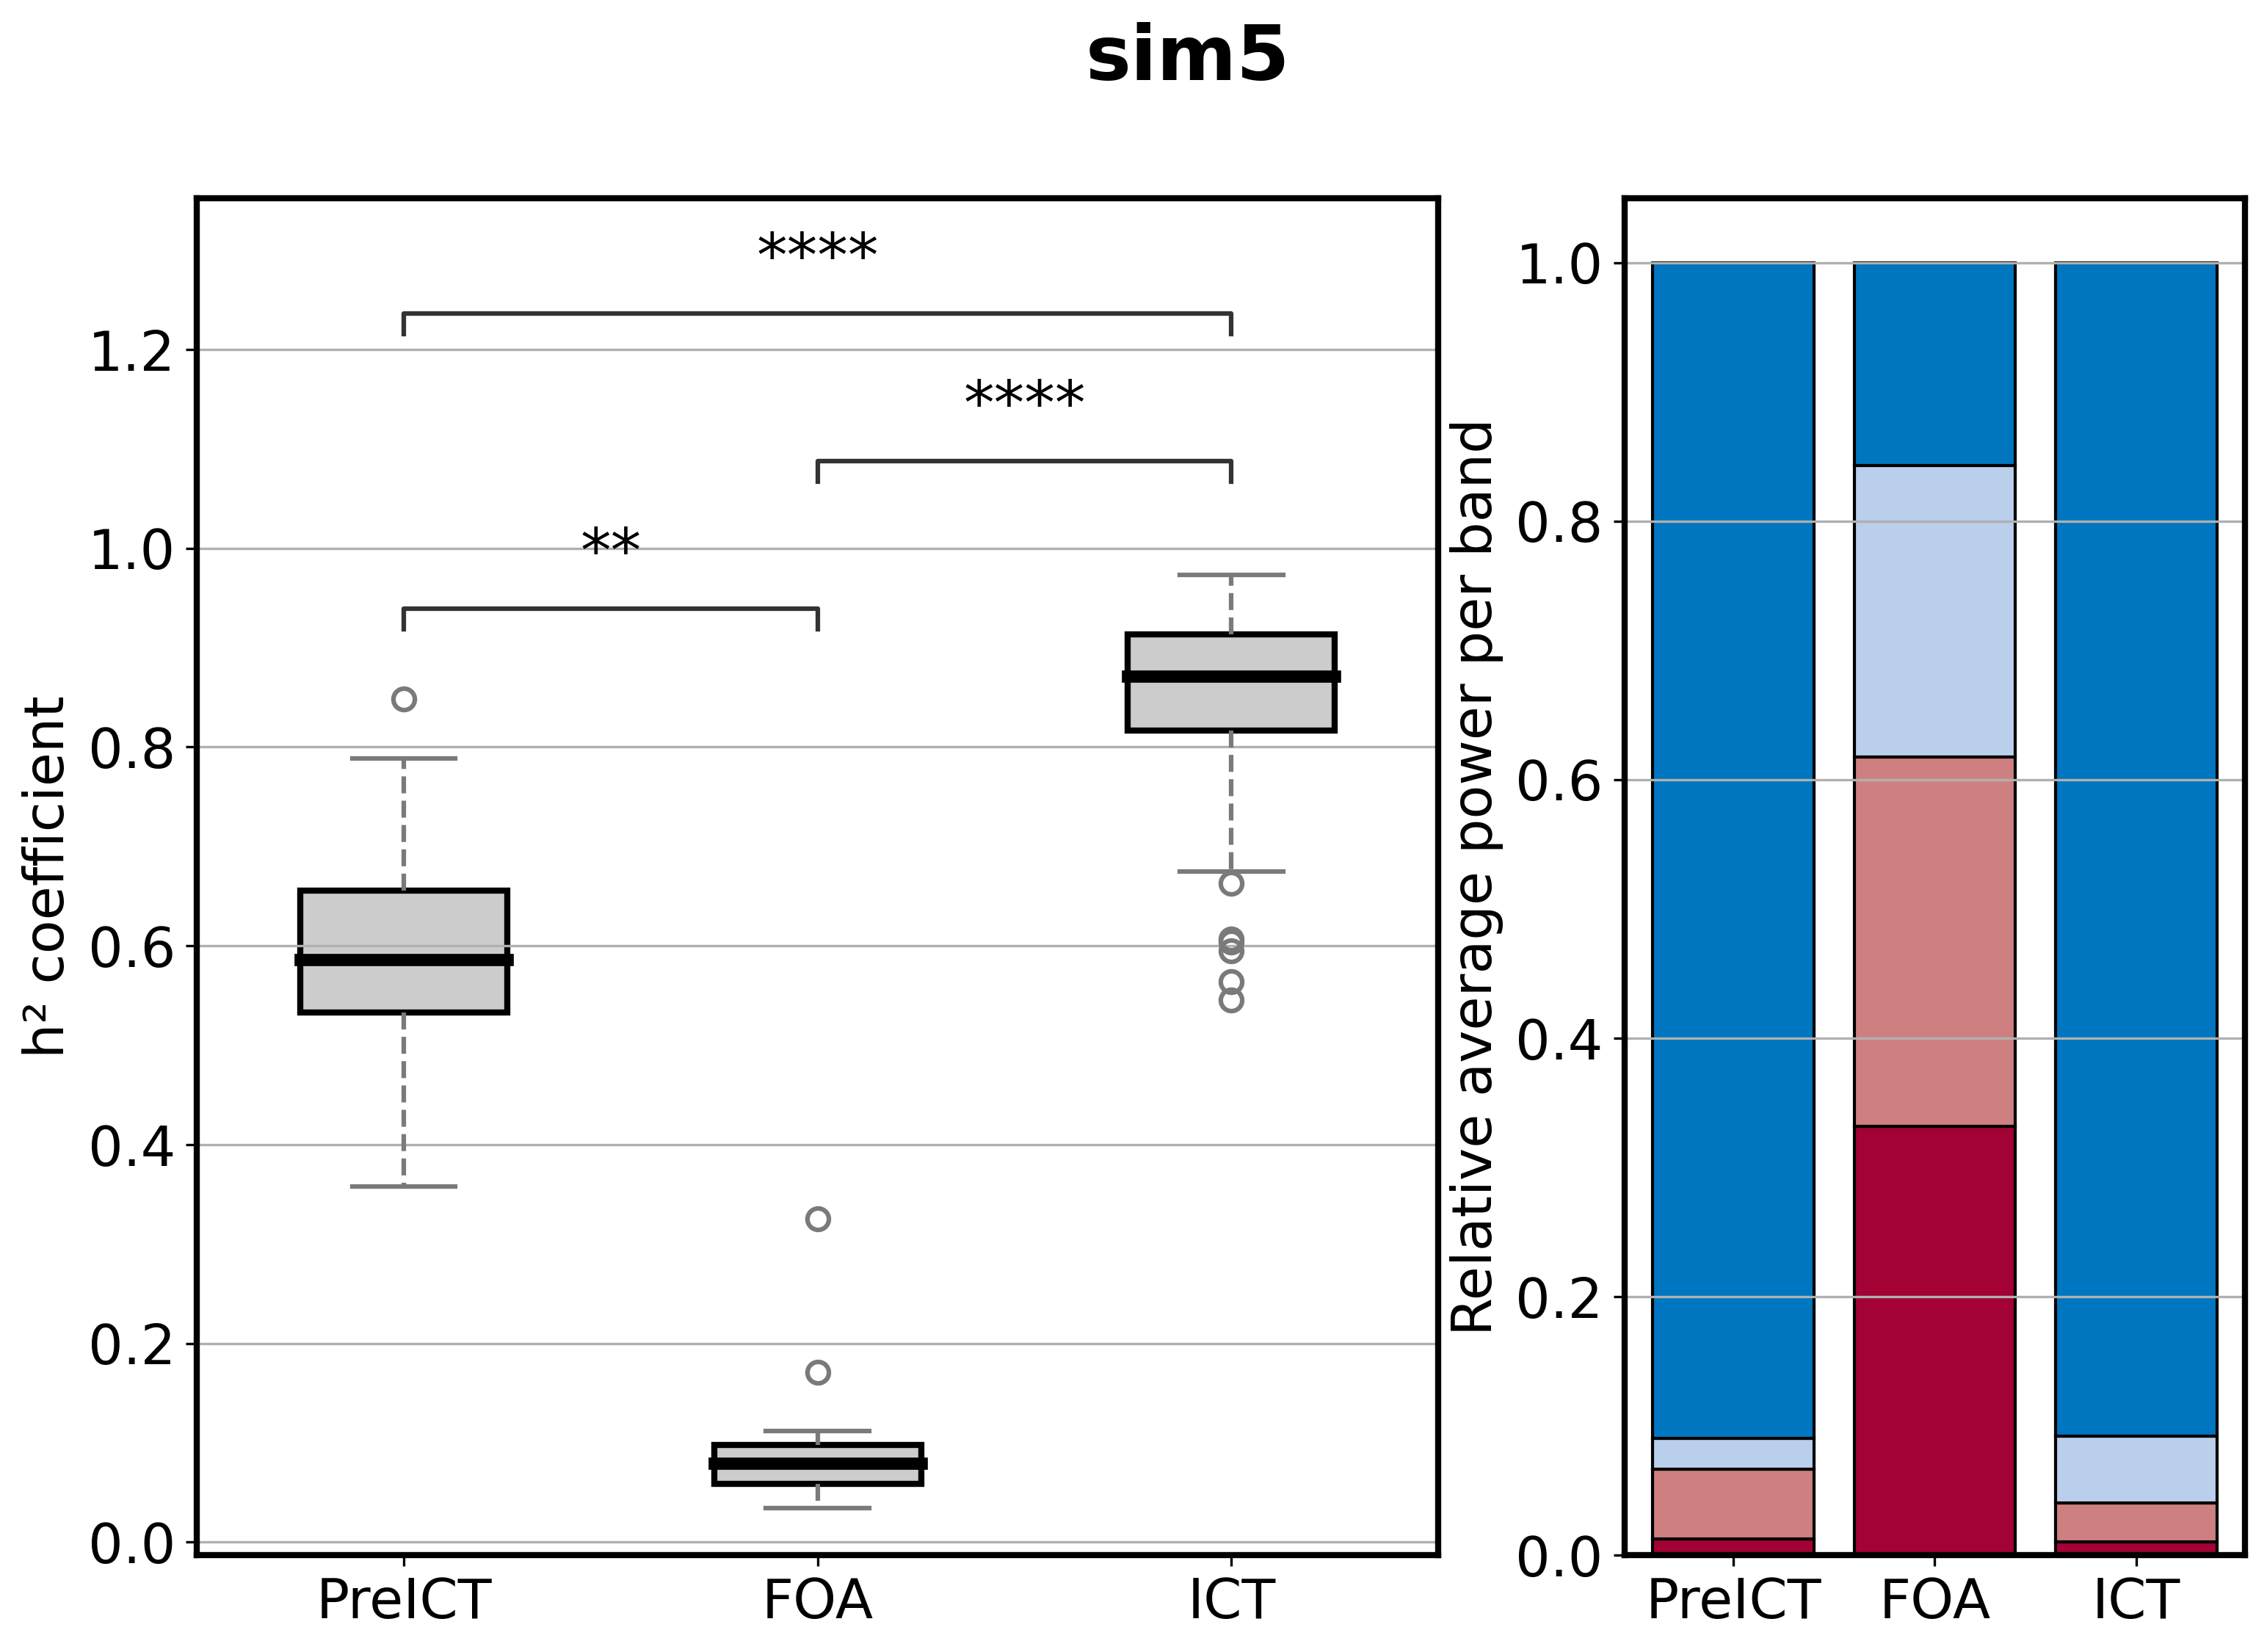

60
24
148
p-value annotation legend:
      ns: 1.00e-01 < p <= 1.00e+00
       *: 1.00e-02 < p <= 1.00e-01
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PreICT vs. FOA: Custom statistical test, P_val:1.354e-02
FOA vs. ICT: Custom statistical test, P_val:4.339e-22
PreICT vs. ICT: Custom statistical test, P_val:3.123e-21


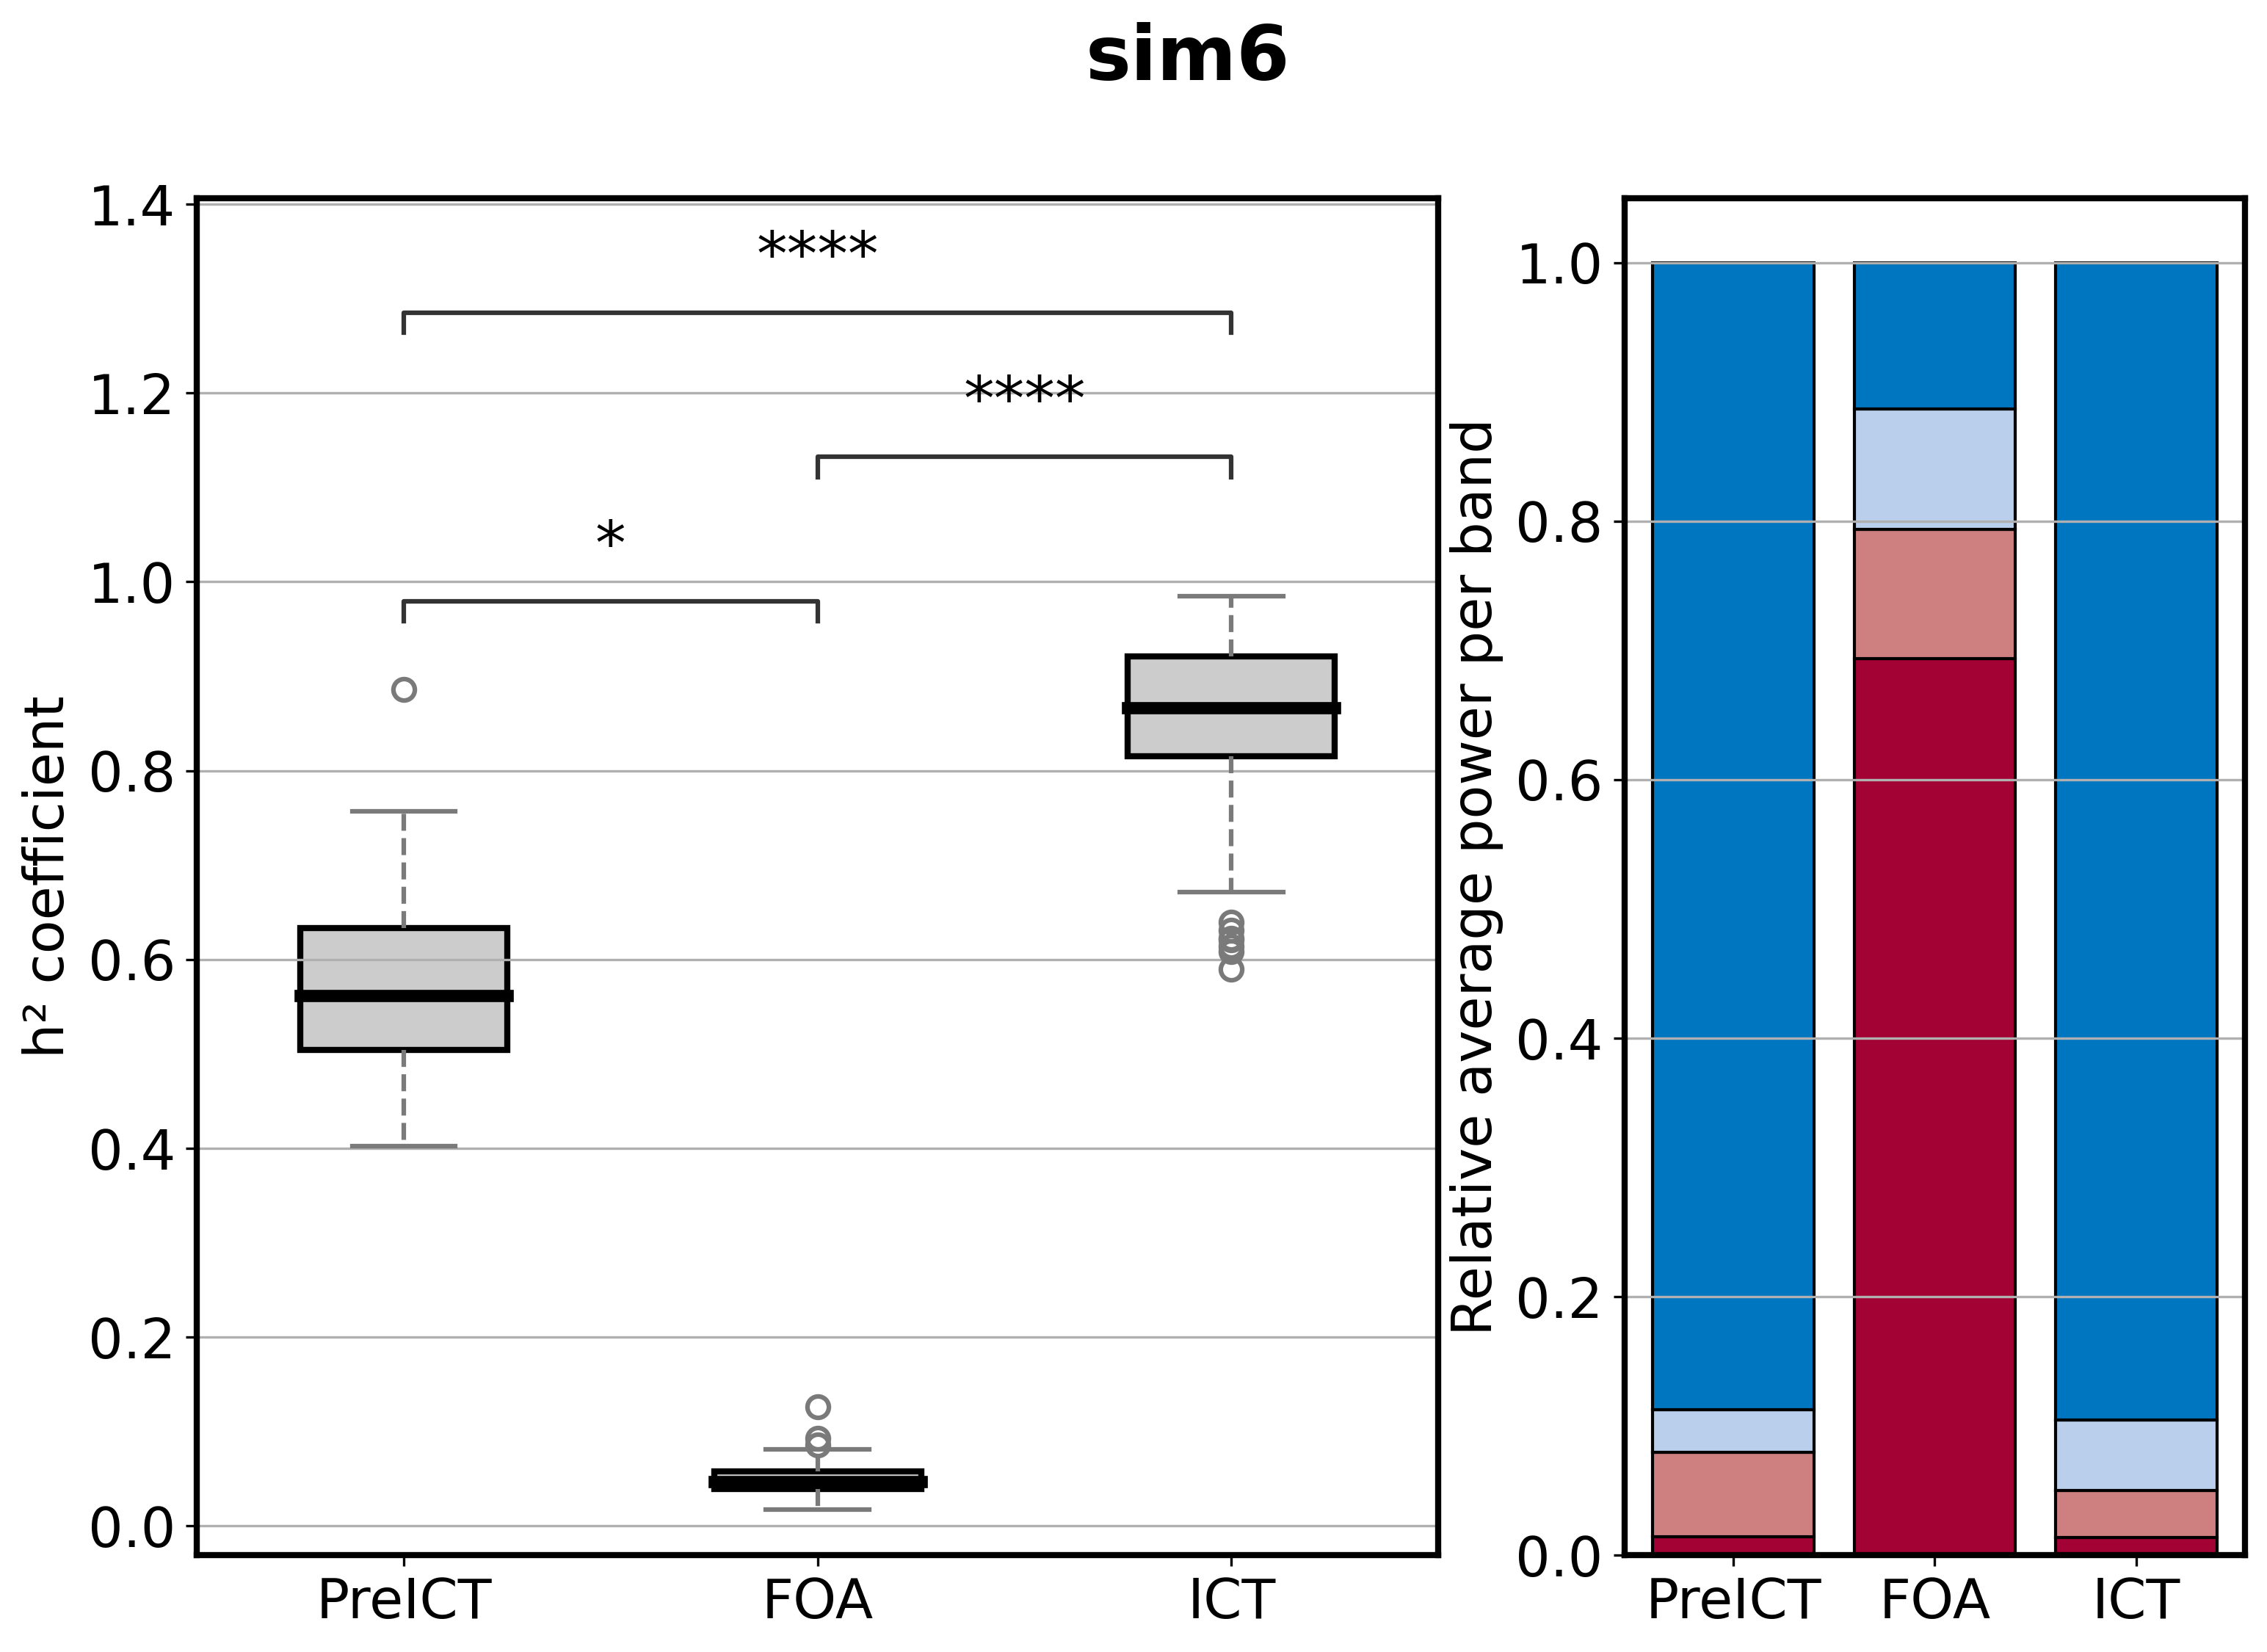

60
24
148
p-value annotation legend:
      ns: 1.00e-01 < p <= 1.00e+00
       *: 1.00e-02 < p <= 1.00e-01
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PreICT vs. FOA: Custom statistical test, P_val:3.327e-03
FOA vs. ICT: Custom statistical test, P_val:2.718e-21
PreICT vs. ICT: Custom statistical test, P_val:1.719e-17


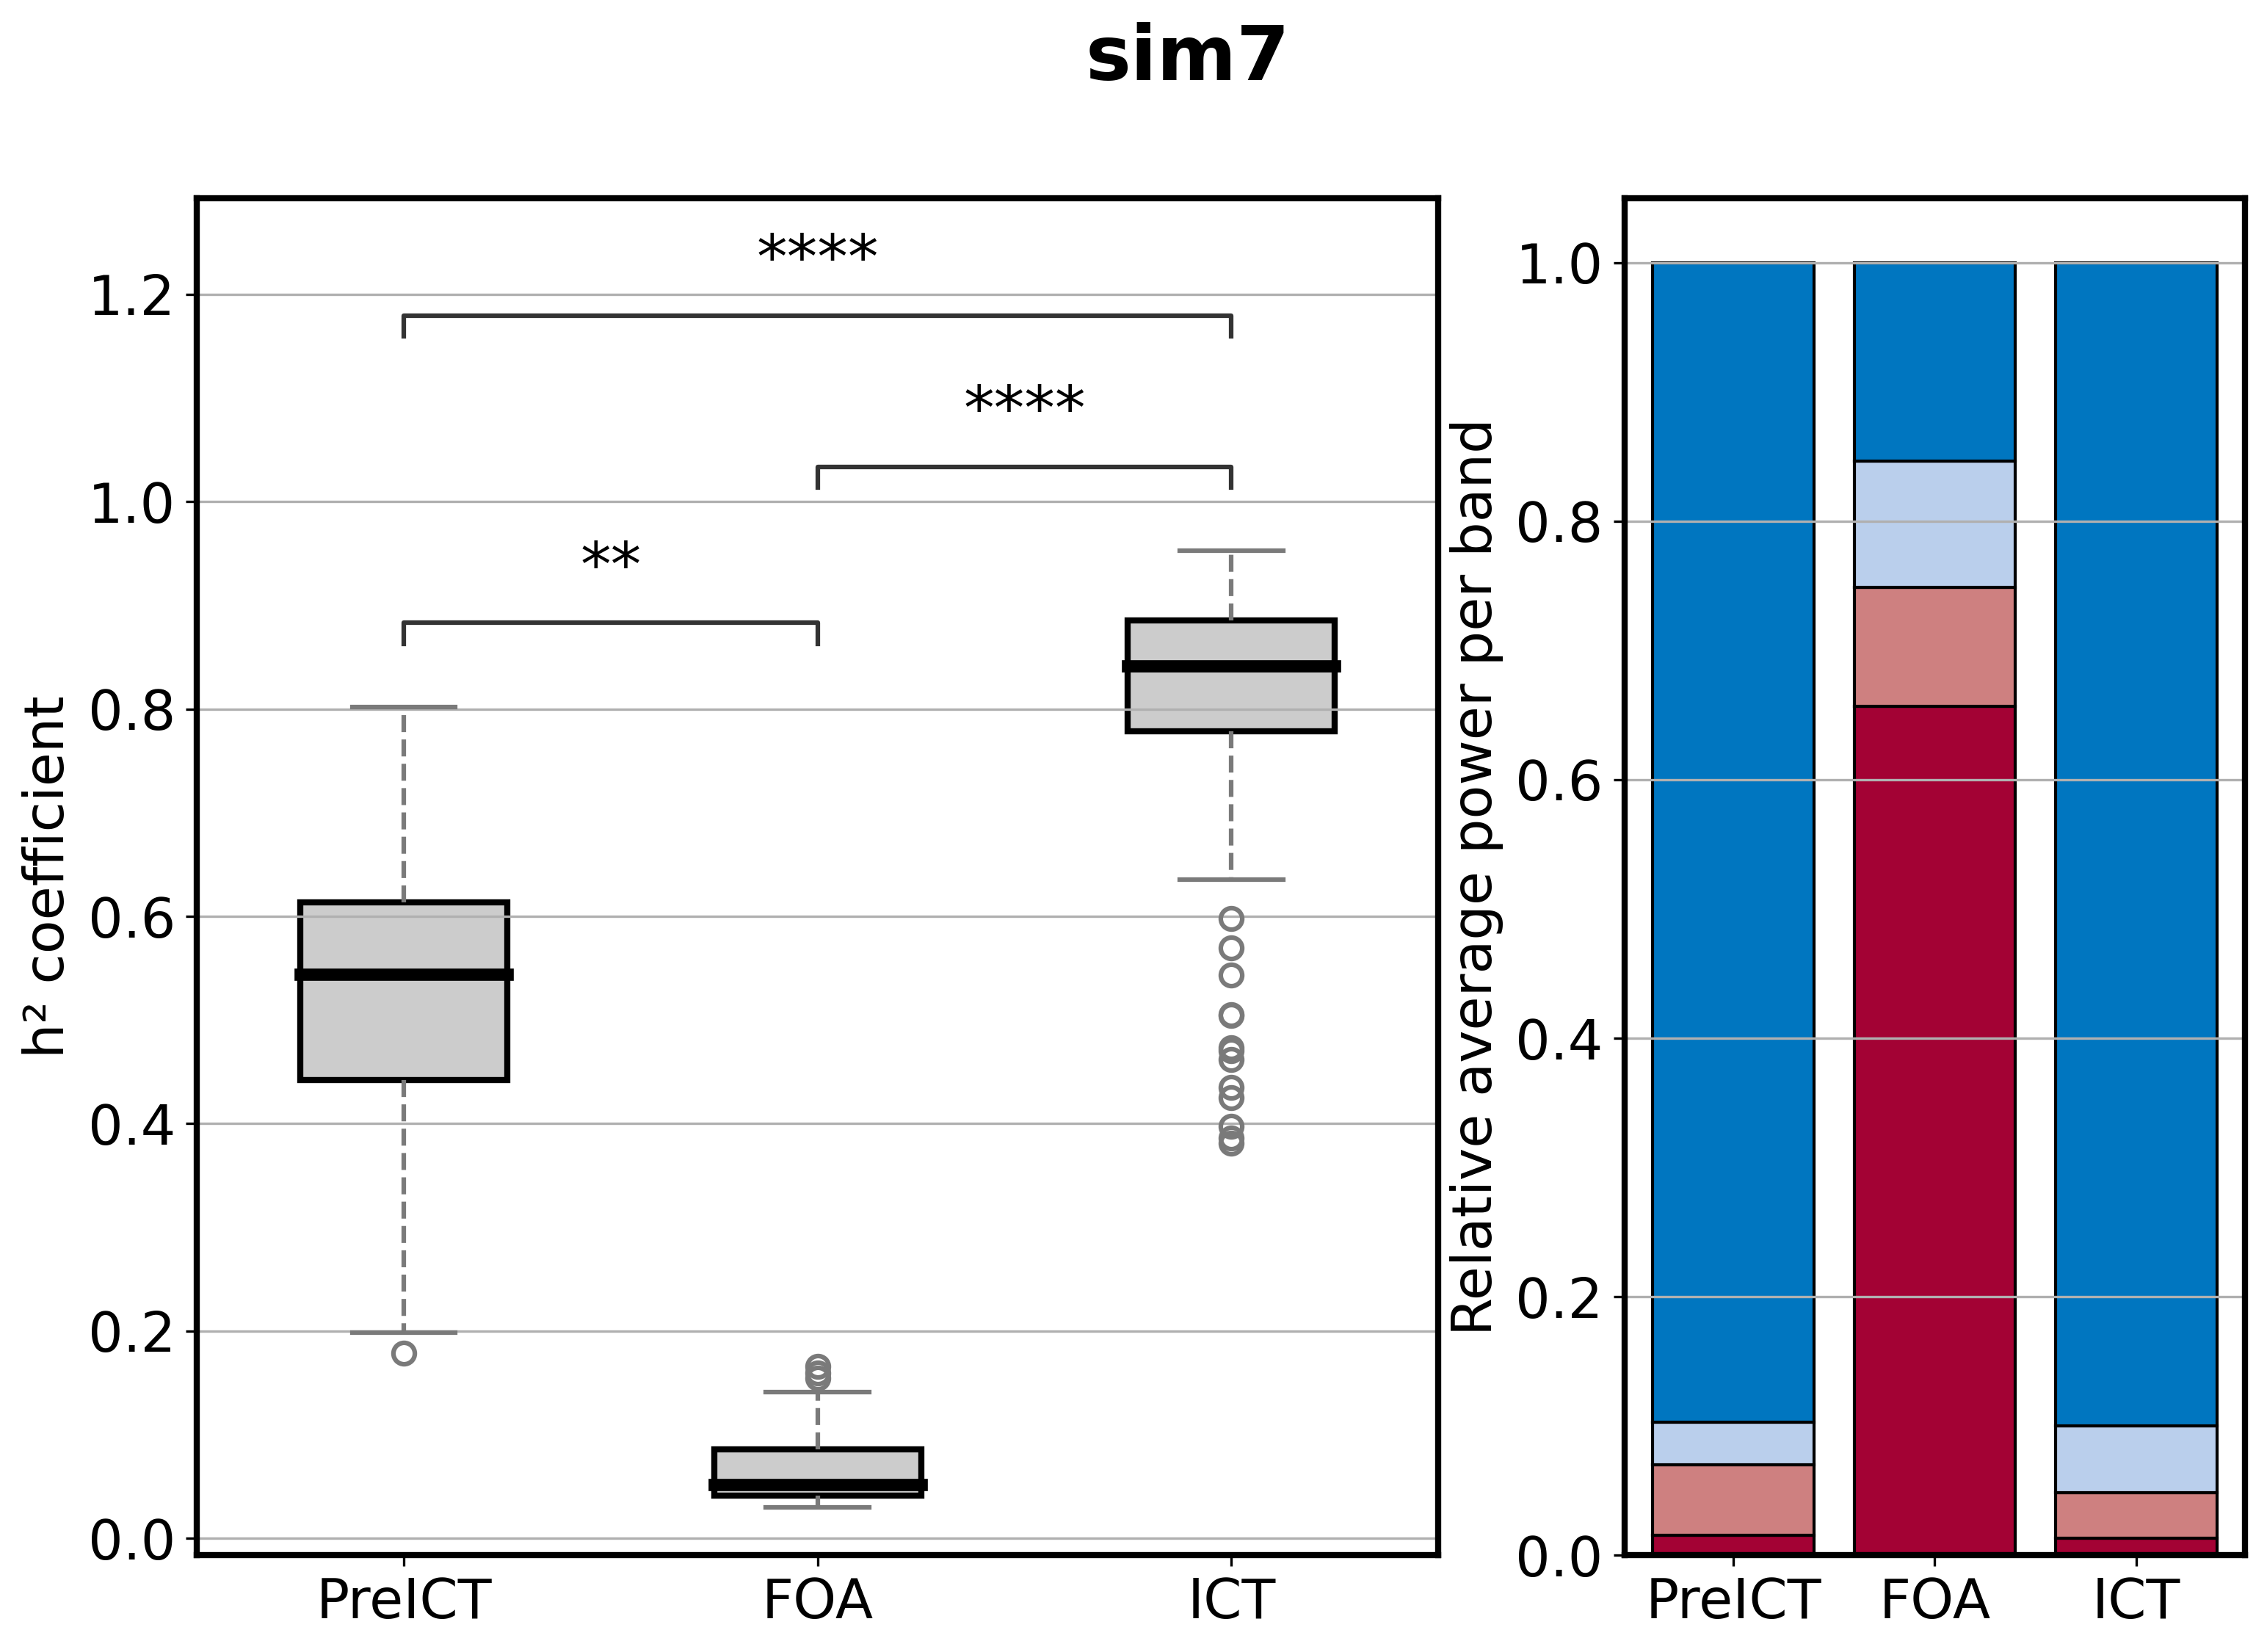

60
24
148
p-value annotation legend:
      ns: 1.00e-01 < p <= 1.00e+00
       *: 1.00e-02 < p <= 1.00e-01
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PreICT vs. FOA: Custom statistical test, P_val:2.792e-03
FOA vs. ICT: Custom statistical test, P_val:7.401e-19
PreICT vs. ICT: Custom statistical test, P_val:4.027e-14


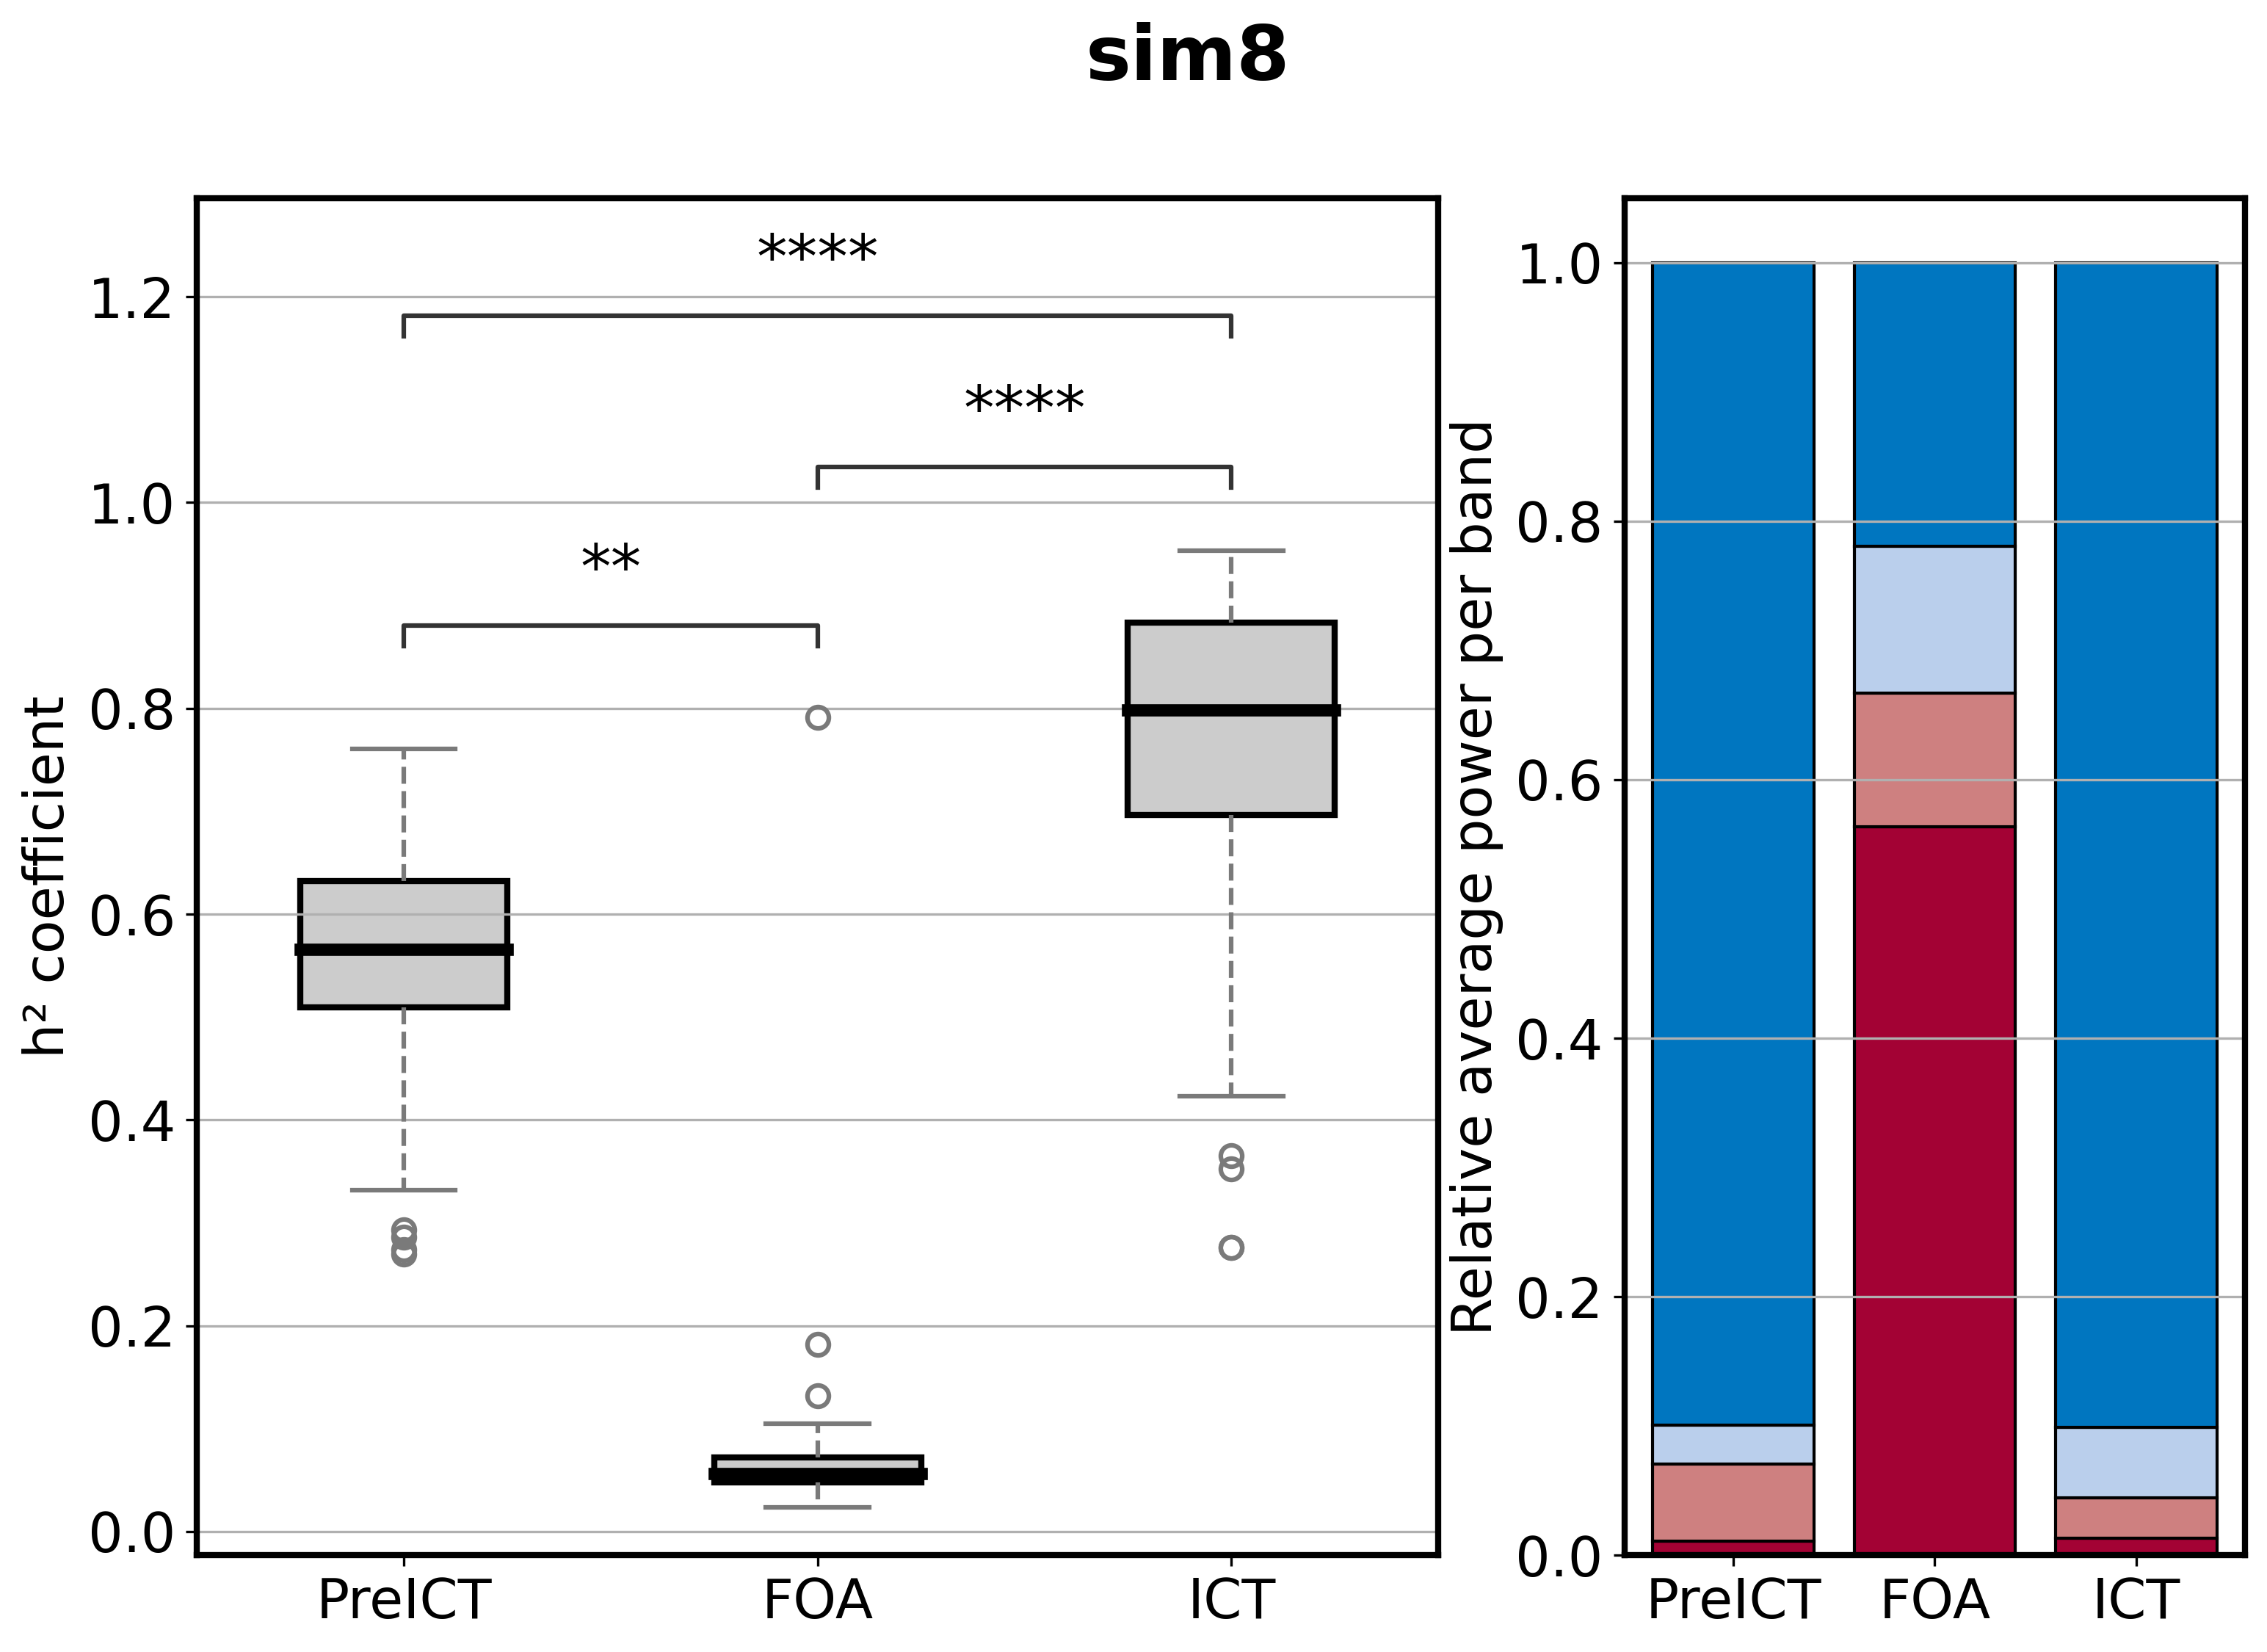

60
24
148
p-value annotation legend:
      ns: 1.00e-01 < p <= 1.00e+00
       *: 1.00e-02 < p <= 1.00e-01
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PreICT vs. FOA: Custom statistical test, P_val:2.918e-03
FOA vs. ICT: Custom statistical test, P_val:3.187e-21
PreICT vs. ICT: Custom statistical test, P_val:3.514e-17


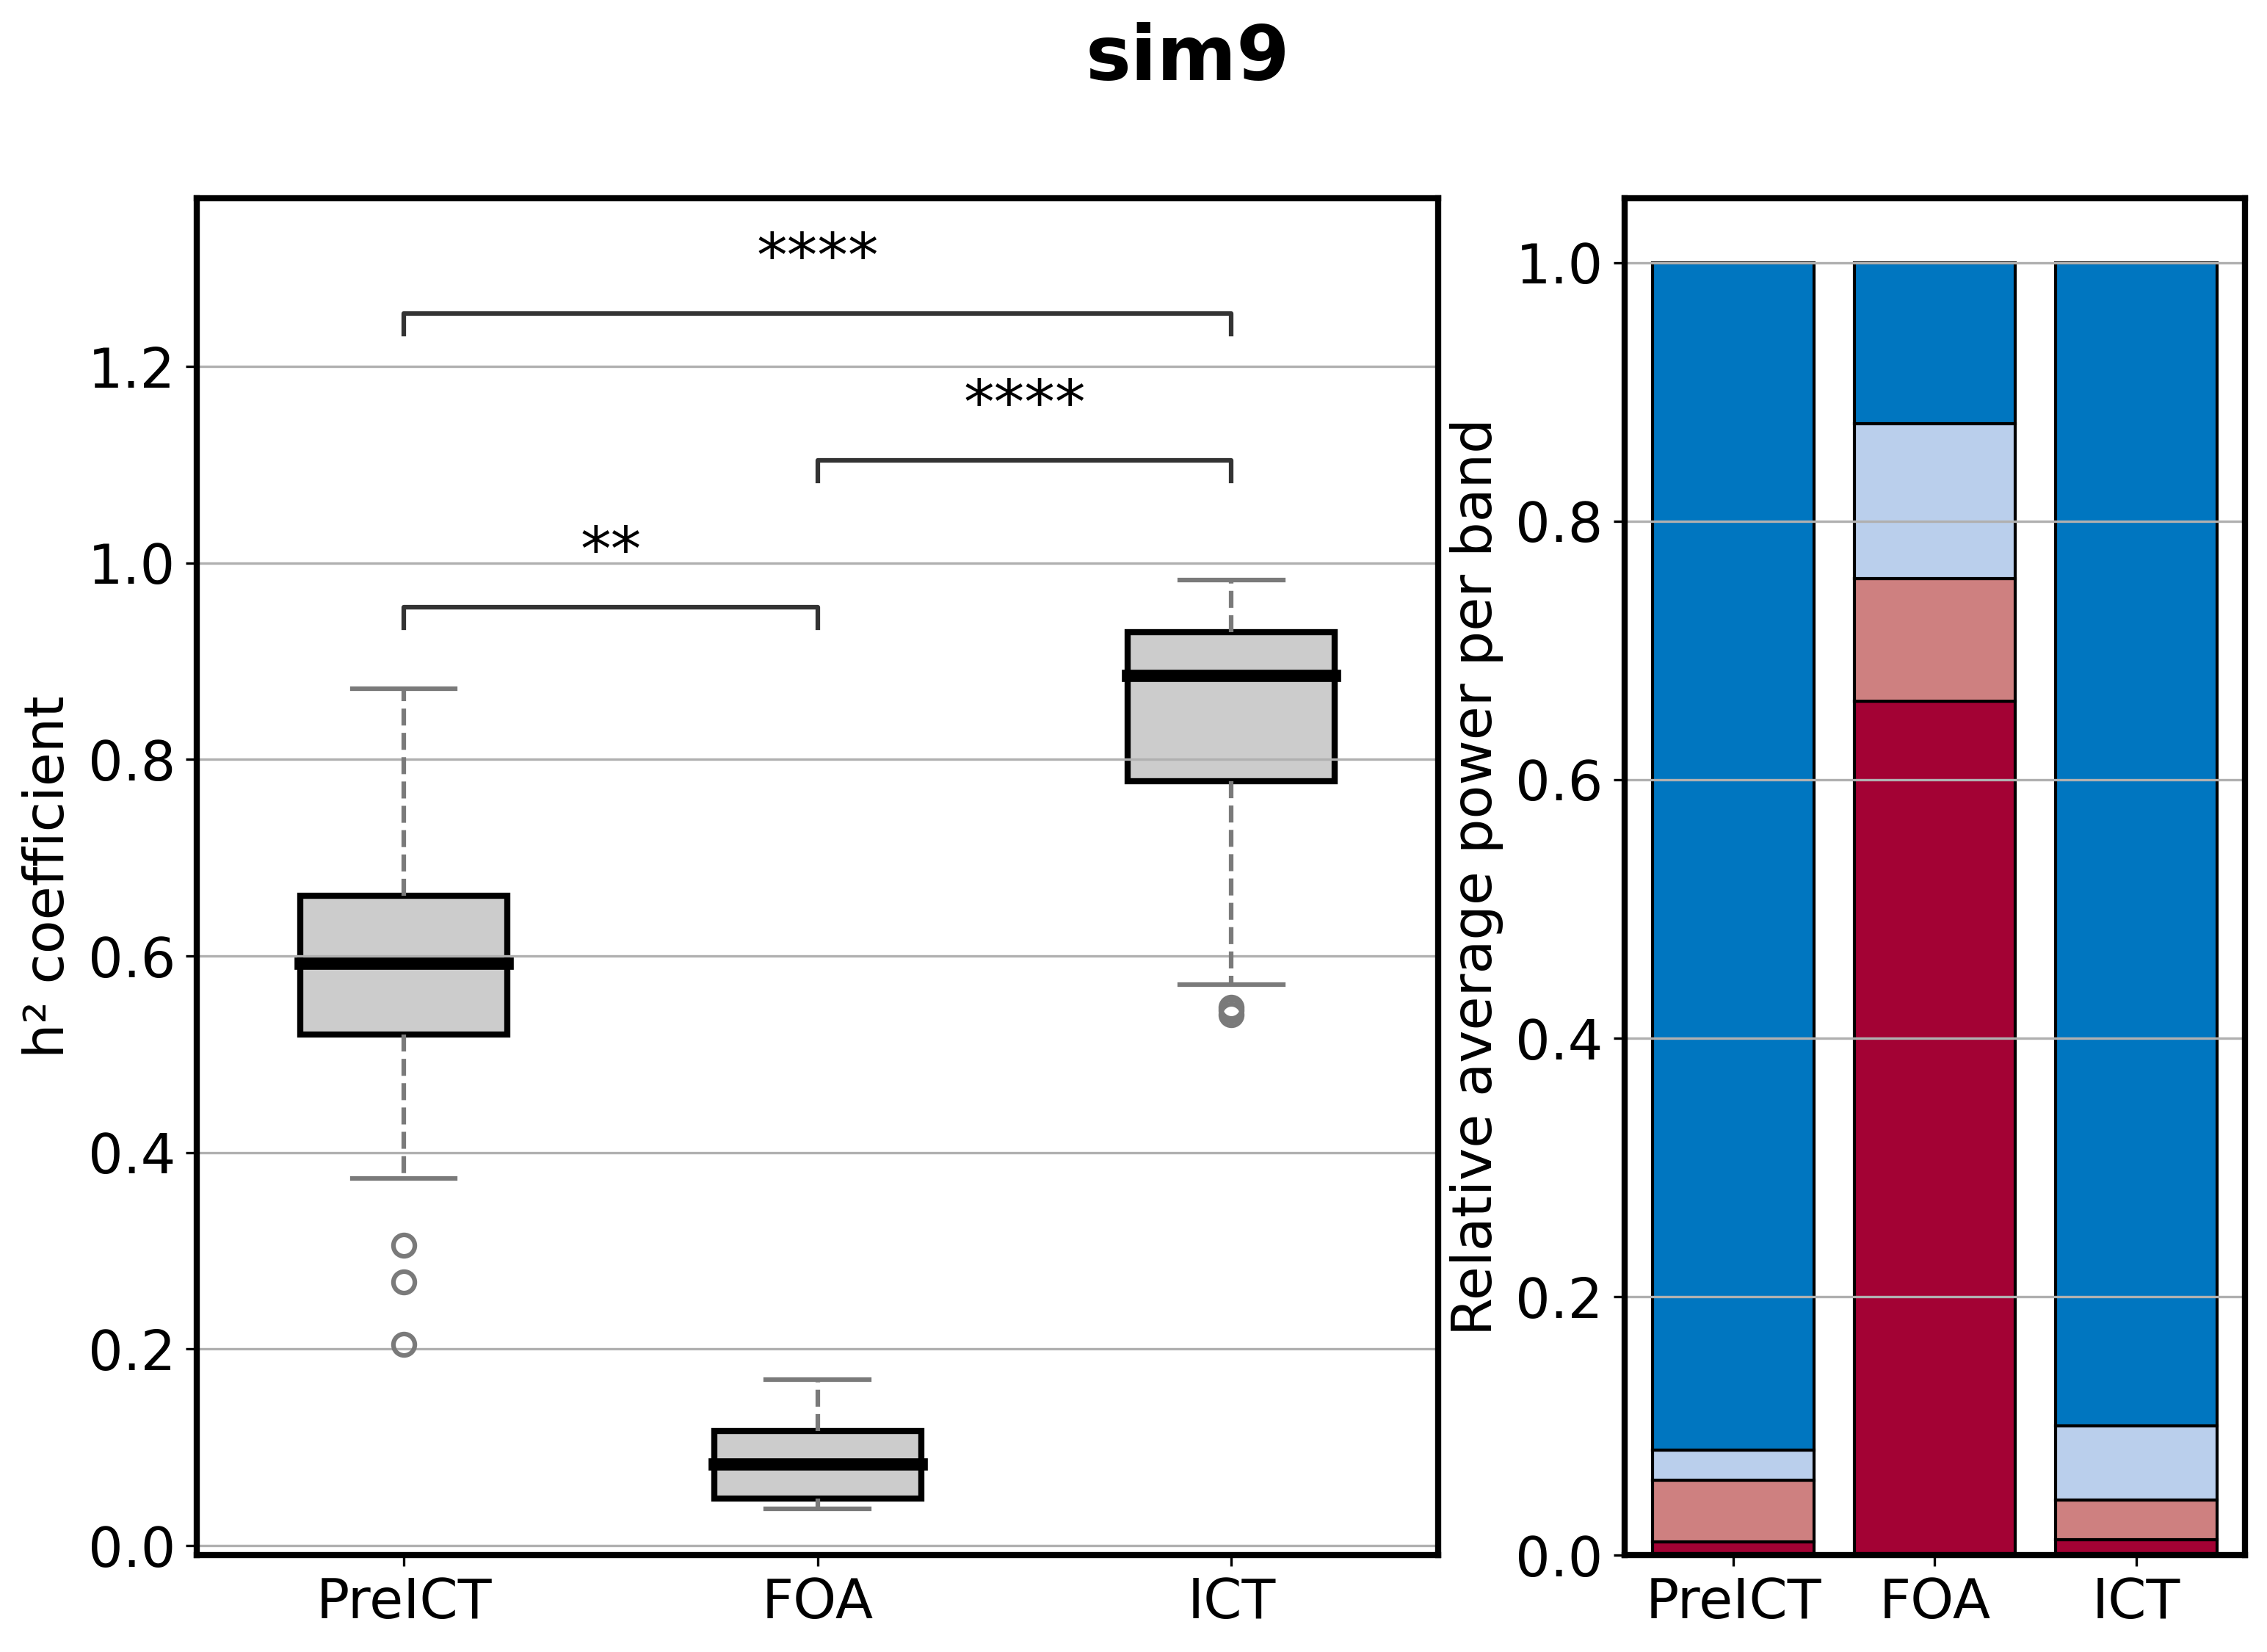

In [31]:
########### SIMULATION DATA ###############
####################h² values calculated with window = 1 sec; step = 0.25 sec#############################################

####################STEP  1 A: ANOVA1 Kruskal-wallis + Ad-hoc Dunn's test ; Bonferroni adjustment; boxplots + significance levels########
####################STEP 1 B: plot relative power density histogram along the boxplots#############################################

#load a random simu file to get timestamps 
#filelist:

file_list = glob.glob(os.path.join(
    'simulations/h2_simus/',
    '*.txt'))

file_name = file_list[0]

data = np.loadtxt(file_name, delimiter = ';')
time = data[0] #time column
data = data[1:4] #data columns
#indexes:
indexes = []
indexes.append(np.where(time == 15)[0][0]) #preict
indexes.append(np.where(time == 30)[0][0]) #
indexes.append(np.where(time == 30)[0][0]) #FOA
indexes.append(np.where(time == 36)[0][0]) #
indexes.append(np.where(time == 36)[0][0]) #ICT
indexes.append(np.where(time == 73)[0][0]) #



# Load CSV file for relative power:
df_power = pd.read_csv(
    'simulations/power_simu_data.csv',
    delimiter = ';')

all_pict =[]
all_lvf = []
all_ict = []

all_pict_powers = np.zeros(4) #4 power ranges: theta, alpha, beta, gamma
all_lvf_powers = np.zeros(4)
all_ict_powers = np.zeros(4)



for file_name in file_list[:]: #importing data for each patient and processing:
    data = np.loadtxt(file_name, delimiter = ';')
    time = data[0] #time column
    data = data[1:4] #data columns
    
    #special to simulated files: we'll take the average of h²xy and h²yx (for patient files, the average is already taken while it h² is calculated with Amadeus software)
    column_means = np.mean(data, axis=0)

    # Reshape the result to have a single column
    data = column_means.reshape(-1, 1)



    #now creating separate subsets for each phase (preict,lvf,ict):
    preict_values = data[indexes[0]:indexes[1]]
    lvf_values = data[indexes[2]:indexes[3]]
    ict_values = data[indexes[4]:indexes[5]]

    print(preict_values.size)
    print(lvf_values.size)
    print(ict_values.size)
    
    #taking unique values for each subsets:
    preict_values = [list(np.unique(preict_values[:, i])) for i in range(preict_values.shape[1])]
    lvf_values = [list(np.unique(lvf_values[:, i])) for i in range(lvf_values.shape[1])]
    ict_values = [list(np.unique(ict_values[:, i])) for i in range(ict_values.shape[1])]


    #storing the unique and flattened lists of h² values for later use in applying tests on combined data:
    all_pict.extend([item for sublist in preict_values for item in sublist])
    all_lvf.extend([item for sublist in lvf_values for item in sublist])
    all_ict.extend([item for sublist in ict_values for item in sublist])




    #kruskal-wallis:
    H, p_value = kruskal(preict_values[0], lvf_values[0], ict_values[0])

    #post-hoc dunn's test:
    pairs = [("PreIct", "Lvf"), ("Lvf", "Ict"), ("PreIct", "Ict")]
    data_to_test = [preict_values[0], lvf_values[0], ict_values[0]]

    posthoc_results = sp.posthoc_dunn(data_to_test, p_adjust='bonferroni', sort = False) #
    p_pict_lvf = min(posthoc_results[2][1], 1) 
    p_lvf_ict = min(posthoc_results[3][2], 1) 
    p_pict_ict = min(posthoc_results[1][3], 1)
    dunn_p_values = [p_pict_lvf, p_lvf_ict, p_pict_ict]
    #print(f" ---------- \n results for channel pair {i}: \n\n Kruskal: H = {H}, p_val = {p_value} \n post-hoc p-values: {dunn_p_values} ")

    #creating a pandas dataframe for use in annotations: 
    # Concatenate the datasets
    values = np.concatenate([preict_values[0], lvf_values[0], ict_values[0]])

    # Create a Pandas Series from the concatenated array
    values_series = pd.Series(values, name='h²')

    # Create a second Pandas Series with the corresponding class names
    class_series = pd.Series(['PreICT']*len(preict_values[0]) + ['FOA']*len(lvf_values[0]) + ['ICT']*len(ict_values[0]), name='class')

    # Concatenate the two Pandas Series along the column axis
    df = pd.concat([values_series, class_series], axis=1)

    x = "class"
    y = "h²"

    pairs = [("PreICT", "FOA"), ("FOA", "ICT"), ("PreICT", "ICT")]

    test_short_name = 'Dunn'

    fig, ax = plt.subplots(ncols=2, figsize=(12, 8), dpi = 300, gridspec_kw={'width_ratios': [2, 1]})

    # Plot the boxplot on the first axis:

    sns.boxplot(data=df,
            x = x,
            y = y,
            ax = ax[0],
            palette=['0.8', '0.8', '0.8'],
            medianprops={'color':'k', 'linewidth':4},
            boxprops={'edgecolor':'k', 'linewidth':2., 'fill':True},
            whiskerprops={'linestyle':'--', 'linewidth':1.5},
            flierprops={'marker': 'o', 'markerfacecolor': 'none', 'markersize': 7, 'markeredgewidth': 1.5},
            width=0.5)


        #setting annotations:
    order = ['PreICT', 'FOA', 'ICT']

    annot = Annotator(ax[0], pairs, data=df, x=x, y=y, order=order) #declaring the annotator class

    annot.new_plot(ax=ax[0], pairs=pairs,
                   data=df, x=x, y=y)
    annot.configure(verbose=2 
                    ,loc='inside'
                    , pvalue_thresholds = [(0.0001, '****'), (0.001, '***'), (0.01, '**'), (0.1, '*'), (1, 'ns')]
                    ,comparisons_correction = None # Correction already applied.
                    , line_height=0.02
                    , text_offset=8
                    , fontsize = 20)
    (annot
     .configure(test=None, test_short_name=test_short_name)
     .set_pvalues(pvalues=dunn_p_values)
     .annotate())


    ax[0].tick_params(axis='x', labelsize=18)
    ax[0].tick_params(axis='y', labelsize=18)

    ax[0].set_ylabel('h² coefficient', fontsize=18)
    ax[0].set_xlabel('', fontsize=10)



    # Get the column names that start with "preict"
    preict_columns = df_power.filter(like='preict').columns

    # Select these columns and their corresponding rows
    pict_powers = df_power.loc[df_power['patient'] == 'sim'+file_name[-5:-4], preict_columns].values
    pict_powers = np.mean(pict_powers, axis = 1, keepdims = True)


    all_pict_powers += np.squeeze(pict_powers)

    pict_powers /= np.sum(pict_powers) #ratio between 0 and 1


    # Get the column names that start with "preict"
    lvf_columns = df_power.filter(like='lvf').columns

    # Select these columns and their corresponding rows
    lvf_powers = df_power.loc[df_power['patient'] == 'sim'+file_name[-5:-4], lvf_columns].values
    lvf_powers = np.mean(lvf_powers, axis = 1, keepdims = True)


    all_lvf_powers += np.squeeze(lvf_powers)

    lvf_powers /= np.sum(lvf_powers)


            # Get the column names that start with "preict"
    ict_columns = df_power.filter(like='Ict').columns

    # Select these columns and their corresponding rows
    ict_powers = df_power.loc[df_power['patient'] == 'sim'+file_name[-5:-4], ict_columns].values
    ict_powers = np.mean(ict_powers, axis = 1, keepdims = True)


    all_ict_powers += np.squeeze(ict_powers)

    ict_powers /= np.sum(ict_powers)

    power_data = np.array((pict_powers, lvf_powers, ict_powers)).T
    power_data = np.transpose(power_data, axes = (1,0,2)).reshape(4,3)

    # Define the group labels and colors
    groups = ['PreICT', 'FOA', 'ICT']

    sns_palette = sns.color_palette("coolwarm", 20)
    #sns_palette = sns.color_palette("rocket", 20)
    #sns_palette = sns.color_palette("Greys", 80)

    colors = ['#a30234', '#ce8080', '#bacfec', '#0076c0']

    #colors = [sns_palette[19], sns_palette[15], sns_palette[8], sns_palette[1]]

    labels = ['Gamma','Beta','Alpha','Theta']

    # Create the stacked bar chart
    bottom = np.zeros(len(groups))
    for j, row in enumerate(power_data):
        ax[1].bar(groups, row, bottom=bottom, color=colors[j], edgecolor='black')
        bottom += row

    # Add legend and labels, adjust font sizes:
    #ax[1].legend(labels, fontsize = 14)
    ax[1].set_ylabel('Relative average power per band', fontsize=18)
    ax[1].tick_params(axis='x', labelsize=18)
    ax[1].tick_params(axis='y', labelsize=18)
    # Set titles for the subplots
    #ax[0].set_title("F: {:.1f}, p-value: {:.1e}".format(H, p_value), fontsize = 18)
    #ax[1].set_title('Relative power', fontsize = 18)


    #turn the grid on:

    ax[0].grid(True, which='major', axis='y')
    ax[1].grid(True, which='major', axis='y')

    #make the borders of figure thicker:

    for spine in ax[0].spines.values():
        spine.set_linewidth(2)

    for spine in ax[1].spines.values():
        spine.set_linewidth(2)

    # add a general title to the entire figure
    fig.suptitle('sim'+file_name[-5:-4], fontsize=25, fontweight='bold')


    plt.show()
    #fig.savefig('sim'+file_name[-5:-4]+'.tiff', dpi=300, transparent=True) #don't forget to change it to .tiff for paper submission.


### FIGURE 6: SIMULATED DATA

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 5.00e-03 < p <= 5.00e-02
      **: 1.00e-03 < p <= 5.00e-03
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

preICT vs. FOA: Custom statistical test, P_val:3.089e-154
FOA vs. ICT: Custom statistical test, P_val:3.407e-126
preICT vs. ICT: Custom statistical test, P_val:1.227e-11


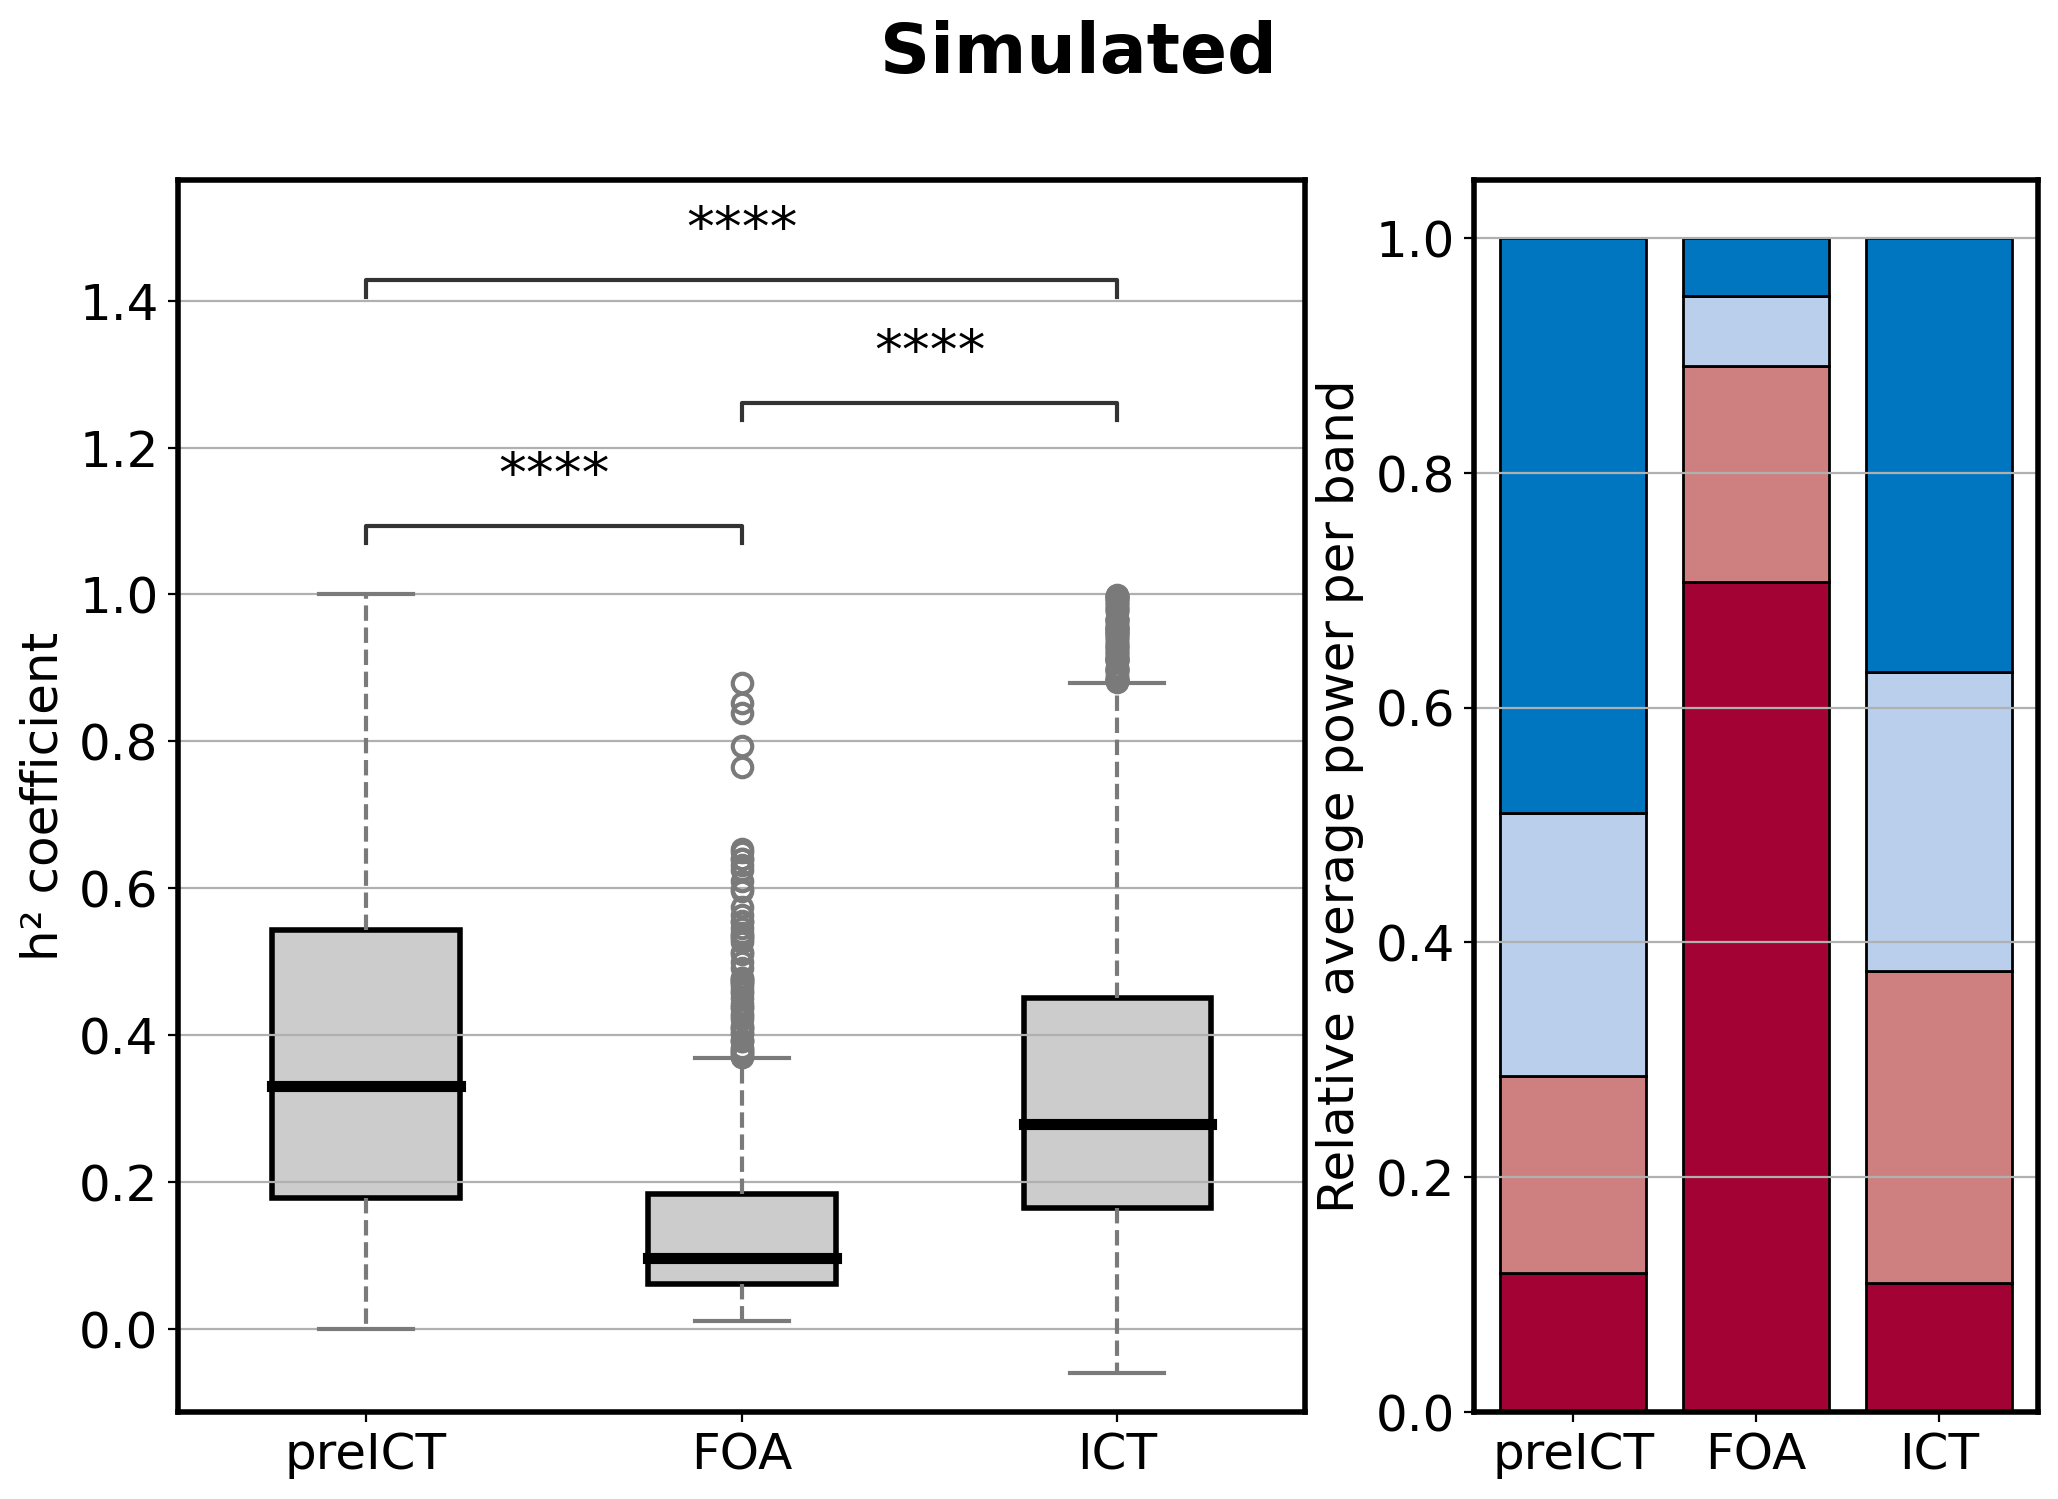

In [38]:
#performing tests on the combined data:


#kruskal-wallis:
H, p_value = kruskal(all_pict, all_lvf, all_ict)

#post-hoc dunn's test:
pairs = [("Preict", "Lvf"), ("Lvf", "Ict"), ("Preict", "Ict")]
data_to_test = [all_pict, all_lvf, all_ict]

posthoc_results = sp.posthoc_dunn(data_to_test, p_adjust = 'bonferroni', sort = False)
p_pict_lvf = min(posthoc_results[2][1], 1) 
p_lvf_ict = min(posthoc_results[3][2], 1) 
p_pict_ict = min(posthoc_results[1][3], 1)
dunn_p_values = [p_pict_lvf, p_lvf_ict, p_pict_ict]
#print(f" ---------- \n results for channel pair {i}: \n\n Kruskal: H = {H}, p_val = {p_value} \n post-hoc p-values: {dunn_p_values} ")

#creating a pandas dataframe for use in annotations: 
# Concatenate the datasets
values = np.concatenate([all_pict, all_lvf, all_ict])

# Create a Pandas Series from the concatenated array
values_series = pd.Series(values, name='h²')

# Create a second Pandas Series with the corresponding class names
class_series = pd.Series(['preICT']*len(all_pict) + ['FOA']*len(all_lvf) + ['ICT']*len(all_ict), name='class')

# Concatenate the two Pandas Series along the column axis
df = pd.concat([values_series, class_series], axis=1)

x = "class"
y = "h²"

pairs = [("preICT", "FOA"), ("FOA", "ICT"), ("preICT", "ICT")]

test_short_name = 'Dunn'

fig, ax = plt.subplots(ncols=2, figsize=(12, 8), dpi = 200, gridspec_kw={'width_ratios': [2, 1]})

# Plot the boxplot on the first axis:

sns.boxplot(data=df,
        x = x,
        y = y,
        ax = ax[0],
        palette=['0.8', '0.8', '0.8'],
        medianprops={'color':'k', 'linewidth':4},
        boxprops={'edgecolor':'k', 'linewidth':2., 'fill':True},
        whiskerprops={'linestyle':'--', 'linewidth':1.5},
        flierprops={'marker': 'o', 'markerfacecolor': 'none', 'markersize': 7, 'markeredgewidth': 1.5},
        width=0.5)


    #setting annotations:
order = ['preICT', 'FOA', 'ICT']

annot = Annotator(ax[0], pairs, data=df, x=x, y=y, order=order) #declaring the annotator class

annot.new_plot(ax=ax[0], pairs=pairs,
               data=df, x=x, y=y)
annot.configure(verbose=2 
                ,loc='inside'
                , pvalue_thresholds = [(0.0001, '****'), (0.001, '***'), (0.005, '**'), (0.05, '*'), (1, 'ns')]
                ,comparisons_correction=None #correction already applied.
                , line_height=0.02
                , text_offset=8
                , fontsize = 20)
(annot
 .configure(test=None, test_short_name=test_short_name)
 .set_pvalues(pvalues=dunn_p_values)
 .annotate())


ax[0].tick_params(axis='x', labelsize=18)
ax[0].tick_params(axis='y', labelsize=18)

ax[0].set_ylabel('h² coefficient', fontsize=18)
ax[0].set_xlabel('', fontsize=10)


# Plot the power histogram on the second axis:
all_pict_powers /= np.sum(all_pict_powers)

all_lvf_powers /= np.sum(all_lvf_powers)

all_ict_powers /= np.sum(all_ict_powers)

power_data = np.array((all_pict_powers, all_lvf_powers, all_ict_powers)).T


# Define the group labels and colors
groups = ['preICT', 'FOA', 'ICT']

sns_palette = sns.color_palette("coolwarm", 20)
#sns_palette = sns.color_palette("rocket", 20)
#sns_palette = sns.color_palette("Greys", 80)

colors = ['#a30234', '#ce8080', '#bacfec', '#0076c0']

#colors = [sns_palette[19], sns_palette[15], sns_palette[8], sns_palette[1]]

labels = ['Gamma','Beta','Alpha','Theta']

# Create the stacked bar chart
bottom = np.zeros(len(groups))
for j, row in enumerate(power_data):
    ax[1].bar(groups, row, bottom=bottom, color=colors[j], edgecolor='black')
    bottom += row

# Add legend and labels, adjust font sizes:
#ax[1].legend(labels, fontsize = 14)
ax[1].set_ylabel('Relative average power per band', fontsize=18)
ax[1].tick_params(axis='x', labelsize=18)
ax[1].tick_params(axis='y', labelsize=18)
# Set titles for the subplots
#ax[0].set_title("F: {:.1f}, p-value: {:.1e}".format(H, p_value), fontsize = 18)
#ax[1].set_title('Relative power', fontsize = 18)


#turn the grid on:

ax[0].grid(True, which='major', axis='y')
ax[1].grid(True, which='major', axis='y')

#make the borders of figure thicker:

for spine in ax[0].spines.values():
    spine.set_linewidth(2)

for spine in ax[1].spines.values():
    spine.set_linewidth(2)

# add a general title to the entire figure
fig.suptitle(f'Simulated', fontsize=25, fontweight='bold')

#fig.savefig(f'all_simus.tiff', dpi=600, transparent=True) 
plt.show()


### LEGEND

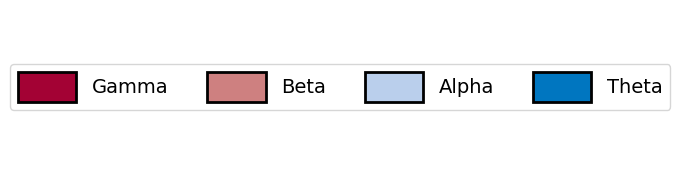

In [33]:
import matplotlib.patches as mpatches

# Create figure for the legend
fig, ax = plt.subplots(figsize=(8, 2))
ax.axis('off')  # No axes

# Define the colors and names again
colors = ['#a30234', '#ce8080', '#bacfec', '#0076c0']
names = ['Gamma', 'Beta', 'Alpha', 'Theta']

# Create custom patches with borders
handles = [mpatches.Rectangle((0, 0), 1, 1, facecolor=color, edgecolor='black', linewidth=2, label=name) for color, name in zip(colors, names)]

# Create the legend and set it at the center with horizontal alignment
legend = ax.legend(handles=handles, loc='center', fontsize=14, title="", ncol=4, handleheight=2, handlelength=3)
#plt.savefig('legend.tiff')
plt.show()


### FIGURE 5: FIRING RATE

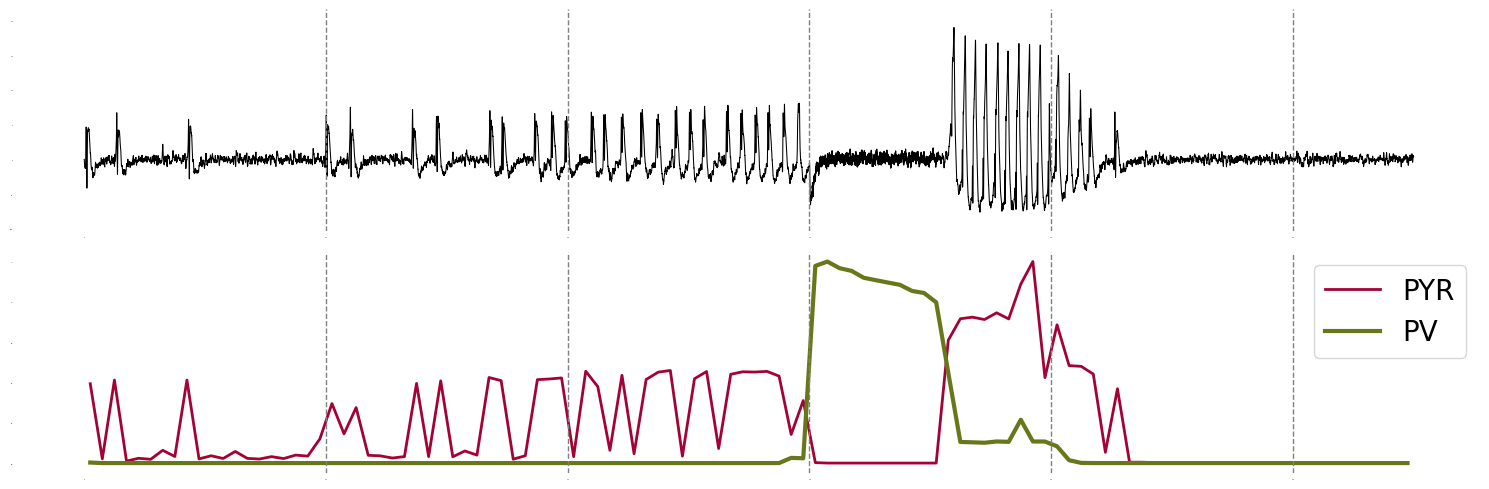

In [34]:
#firing rates:
PYR = np.loadtxt('simulations/PSPout_EXC.txt')
PV = np.loadtxt('simulations/PSPout_I1.txt')

#timeseries:
pop = np.loadtxt('simulations/phase_value.dat')

pop1 = pop[:,0]
pop2 = pop[:,1]
pop_time = pop[:,2]


def firing_rate(timeseries, window_size_sec, sampling_rate):
    
    # Convert window size to number of samples
    window_size_samples = int(window_size_sec * sampling_rate)

    # Calculate the number of windows
    num_windows = len(timeseries[0]) // window_size_samples

    # Initialize lists to store firing rates and corresponding times
    firing_rates = []
    times = []

    # Iterate over each window
    for i in range(num_windows):
        # Calculate start and end indices of the window
        start_idx = i * window_size_samples
        end_idx = (i + 1) * window_size_samples

        # Extract data within the window
        window_data = timeseries[0, start_idx:end_idx]

        # Calculate firing rate for this window
        firing_rate = np.sum(window_data) / window_size_samples

        # Calculate corresponding time for this firing rate (middle of the window)
        time = (start_idx + end_idx) / 2 / sampling_rate

        # Append firing rate and time to the lists
        firing_rates.append(firing_rate)
        times.append(time)

    # Convert lists to numpy arrays for plotting
    firing_rates = np.array(firing_rates)
    times = np.array(times)
    

    # Normalize the time series between 0 and 1
    firing_rates = (firing_rates - np.min(firing_rates)) / (np.max(firing_rates) - np.min(firing_rates))


    return firing_rates, times


#main:

# Define window size (in seconds) and sampling rate
window_size_sec = 0.5
sampling_rate = 2048

firing_rate_PYR, times = firing_rate(PYR, window_size_sec,sampling_rate)
firing_rate_PV, times = firing_rate(PV, window_size_sec,sampling_rate)




# Create figure and axes
fig, axs = plt.subplots(2, 1, figsize=(15, 5))  # Adjust the figsize as needed

# Plot timeseries
x = np.linspace(0,55,len(pop1))
# Compute y-axis limits with some padding
y_min = np.min(pop1)
y_max = np.max(pop1)
padding = 0.1 * (y_max - y_min)  # Adjust the padding factor as needed
y_min -= padding
y_max += padding

gain = 1


axs[0].plot(pop_time,pop1 * gain, color='k', linewidth = 0.75)
#axs[0].set_title('simulated SEEG')
#axs[0].set_ylabel('simulated SEEG')
axs[0].set_ylim(y_min, y_max)
#axs[0].set_ylabel('Average Firing Rate')
axs[0].spines['top'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)
axs[0].spines['left'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].tick_params(axis='both', which='both', length=0,  labelsize=0)  # Hide ticks




# Plot firing rates
data = (pop1 - np.min(pop1)) / (np.max(pop1) - np.min(pop1))



axs[1].plot(times, firing_rate_PYR, color='#a30234', linewidth = 2)
axs[1].plot(times, firing_rate_PV, color = '#677719', linewidth = 3)
#axs[1].set_title('Firing Rate')
#axs[1].set_xlabel('Time (sec)')
#axs[1].set_ylabel('Average Firing Rate')
axs[1].spines['top'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].spines['left'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].plot(x, data, color='k', linewidth=2, alpha=0)  # This is for adjusting purposes
axs[1].tick_params(axis='both', which='both', length=0,  labelsize=0)  # Hide ticks




axs[1].plot(pop_time,data, color='k', linewidth = 2, alpha = 0) #this is for adjusting purposes

# Add vertical lines every 10 seconds
for i in range(1, 6):
    axs[0].axvline(x=i * 10, color='gray', linestyle='--', linewidth=1)
    axs[1].axvline(x=i * 10, color='gray', linestyle='--', linewidth=1)


# Adjust layout
plt.tight_layout()


#plt.legend(['PYR', 'PV'], loc='upper right', fontsize=50)
plt.legend(['PYR', 'PV'], loc='upper right', fontsize=20)

#fig.savefig(f'different_kinetics.tiff', dpi=600, transparent=True) 
plt.show()

